In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
import shap
from sklearn.inspection import permutation_importance

# Preprocessing

In [ ]:
# twoalphas
twoalphas = pd.read_csv('twoalphas.csv')
twoalphas

sex    hb        pcv       rbc        mcv        mch       mchc  \
0    female  10.8  35.200000  5.120000  68.700000  21.200000  30.800000   
1      male  10.8  26.600000  4.280000  62.100000  25.300000  40.800000   
2    female  10.8  35.200000  5.120000  68.700000  21.200000  30.800000   
3      male  14.5  43.500000  5.170000  84.000000  28.000000  33.400000   
4      male  11.5  34.400000  5.020000  68.700000  22.900000  33.400000   
5    female  13.9  43.700000  5.580000  78.300000  24.900000  31.800000   
6    female   8.8  30.500000  4.890000  62.400000  17.900000  28.800000   
7      male  14.1  44.600000  5.140000  86.700000  27.600000  31.900000   
8    female  12.1  38.600000  4.870000  79.300000  24.800000  31.300000   
9      male  10.0  28.600000  5.850000  48.900000  11.100000  31.100000   
10     male  11.2  34.600000  4.460000  78.300000  25.100000  32.100000   
11   female  13.6  41.200000  5.220000  78.900000  26.100000  33.000000   
12   female  10.1  30.900000  5.100000  65.200000  21.200000  32.600000   
13     male  12.5  38.000000  4.550000  83.400000  27.400000  32.900000   
14   female  12.4  37.900000  4.770000  79.400000  26.000000  32.800000   
15     male   9.9  32.400000  4.710000  68.700000  21.000000  30.600000   
16   female  12.0  37.500000  4.830000  77.700000  24.800000  31.900000   
17     male  13.7  42.700000  4.750000  89.800000  28.900000  32.200000   
18   female  10.2  32.100000  4.050000  79.300000  25.100000  31.700000   
19   female  10.5  32.400000  5.000000  64.800000  21.000000  32.400000   
20     male   7.6  22.100000  2.410000  91.700000  31.500000  34.400000   
21     male  11.1  34.200000  5.090000  67.300000  21.800000  32.400000   
22   female   9.6  33.200000  5.540000  59.900000  17.300000  28.900000   
23     male  14.0  39.100000  4.980000  78.600000  28.100000  35.800000   
24   female  12.3  37.200000  5.720000  65.000000  21.500000  33.100000   
25   female  11.7  36.000000  4.380000  82.200000  26.700000  32.500000   
26   female   9.1  29.200000  4.380000  61.900000  19.300000  31.100000   
27   female  11.8  35.400000  4.620000  76.700000  25.600000  33.400000   
28     male  11.0  32.800000  4.570000  71.800000  24.100000  33.600000   
29   female  13.0  35.876404  4.920000  84.100000  26.400000  31.400000   
30     male  13.1  35.876404  4.970000  76.500000  26.400000  34.500000   
31   female   9.7  33.400000  4.650000  71.800000  20.900000  29.100000   
32     male  10.5  30.800000  4.890000  63.000000  21.500000  34.100000   
33   female   8.8  29.200000  5.110000  57.900000  17.200000  29.700000   
34     male  11.8  36.000000  5.270000  68.300000  22.400000  32.500000   
35     male  10.9  33.000000  5.290000  69.900000  20.700000  29.600000   
36   female  11.9  36.600000  5.590000  65.500000  20.600000  31.500000   
37   female  10.2  31.100000  4.210000  73.800000  24.100000  32.700000   
38     male  12.3  37.900000  5.400000  67.200000  21.800000  32.500000   
39   female  12.7  35.876404  4.820000  84.200000  26.400000  31.400000   
40     male  15.0  35.876404  5.590000  86.300000  26.800000  31.100000   
41     male  11.1  34.700000  5.210000  67.500000  21.300000  32.000000   
42   female  10.9  33.500000  5.030000  66.600000  21.700000  32.500000   
43   female  12.3  38.600000  4.660000  82.900000  26.400000  31.800000   
44     male  11.6  37.600000  5.400000  69.600000  21.400000  30.800000   
45     male  10.9  35.000000  5.600000  62.600000  19.400000  31.100000   
46   female  11.9  38.600000  5.400000  71.100000  21.900000  30.800000   
47     male  13.2  37.900000  4.300000  88.100000  30.700000  34.800000   
48     male  12.5  37.000000  5.470000  67.800000  22.800000  33.700000   
49   female  11.5  36.900000  4.660000  79.200000  24.600000  31.100000   
50   female  11.1  36.100000  5.190000  69.700000  21.300000  30.700000   
51   female  12.2  35.500000  4.860000  73.100000  25.200000  34.500000   
52     male  12.5  42.400000  5.1

In [ ]:
twoalphas['sex'] = twoalphas['sex'].map({'male': 0, 'female': 1}).astype(float)
# twoalphas = twoalphas.dropna()
twoalphas.isnull().sum()

sex          0
hb           0
pcv          0
rbc          0
mcv          0
mch          1
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64

In [ ]:
means = twoalphas.mean(numeric_only=True)
twoalphas = twoalphas.fillna(means)

In [ ]:
twoalphas.describe()

sex          hb        pcv         rbc         mcv         mch  \
count  147.000000  147.000000  147.00000  147.000000  147.000000  147.000000   
mean     0.489796   11.543537   35.08886    5.099016   70.752564   22.861220   
std      0.501605    1.569315    4.07620    0.618955    8.065548    3.285768   
min      0.000000    7.600000   22.10000    2.410000   47.700000   11.100000   
25%      0.000000   10.550000   33.05000    4.710000   65.400000   20.900000   
50%      0.000000   11.500000   35.20000    5.090000   69.300000   22.400000   
75%      1.000000   12.300000   36.95000    5.435000   77.150000   25.100000   
max      1.000000   15.800000   48.40000    6.770000   91.700000   35.600000   

            mchc         rdw         wbc        neut       lymph         plt  \
count  147.00000  147.000000  147.000000  147.000000  147.000000  147.000000   
mean    32.06579   15.346166    9.313314   45.551551   44.387285  341.641154   
std      1.97060    2.430926    2.701163   12.505040   13.135881  102.964868   
min     21.10000   11.500000    2.300000    6.200000   10.300000  138.000000   
25%     31.15000   13.850000    7.560000   41.800000   37.000000  263.500000   
50%     32.20000   15.000000    9.390000   45.000000   44.900000  332.279570   
75%     33.00000   16.300000   10.985000   52.150000   47.700000  402.500000   
max     40.80000   28.800000   20.400000   77.500000   87.000000  689.000000   

              hba        hba2         hbf  
count  147.000000  147.000000  147.000000  
mean    86.754188    2.555944    0.709710  
std      2.514777    0.339204    0.735023  
min     68.000000    0.300000    0.000000  
25%     86.100000    2.487143    0.300000  
50%     86.523291    2.588608    0.560909  
75%     87.400000    2.700000    0.769231  
max     98.400000    3.300000    4.800000

<ipython-input-108-34e360c5bc28>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


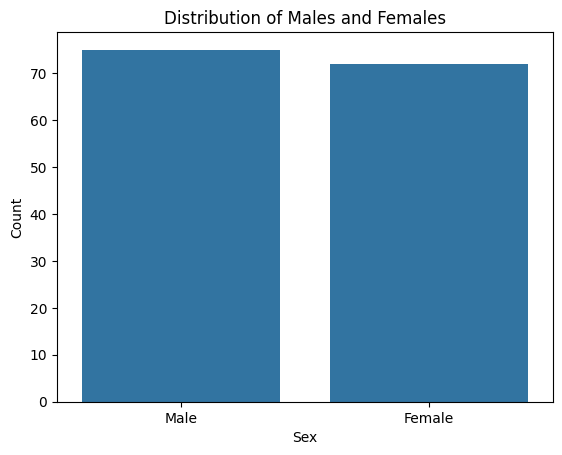

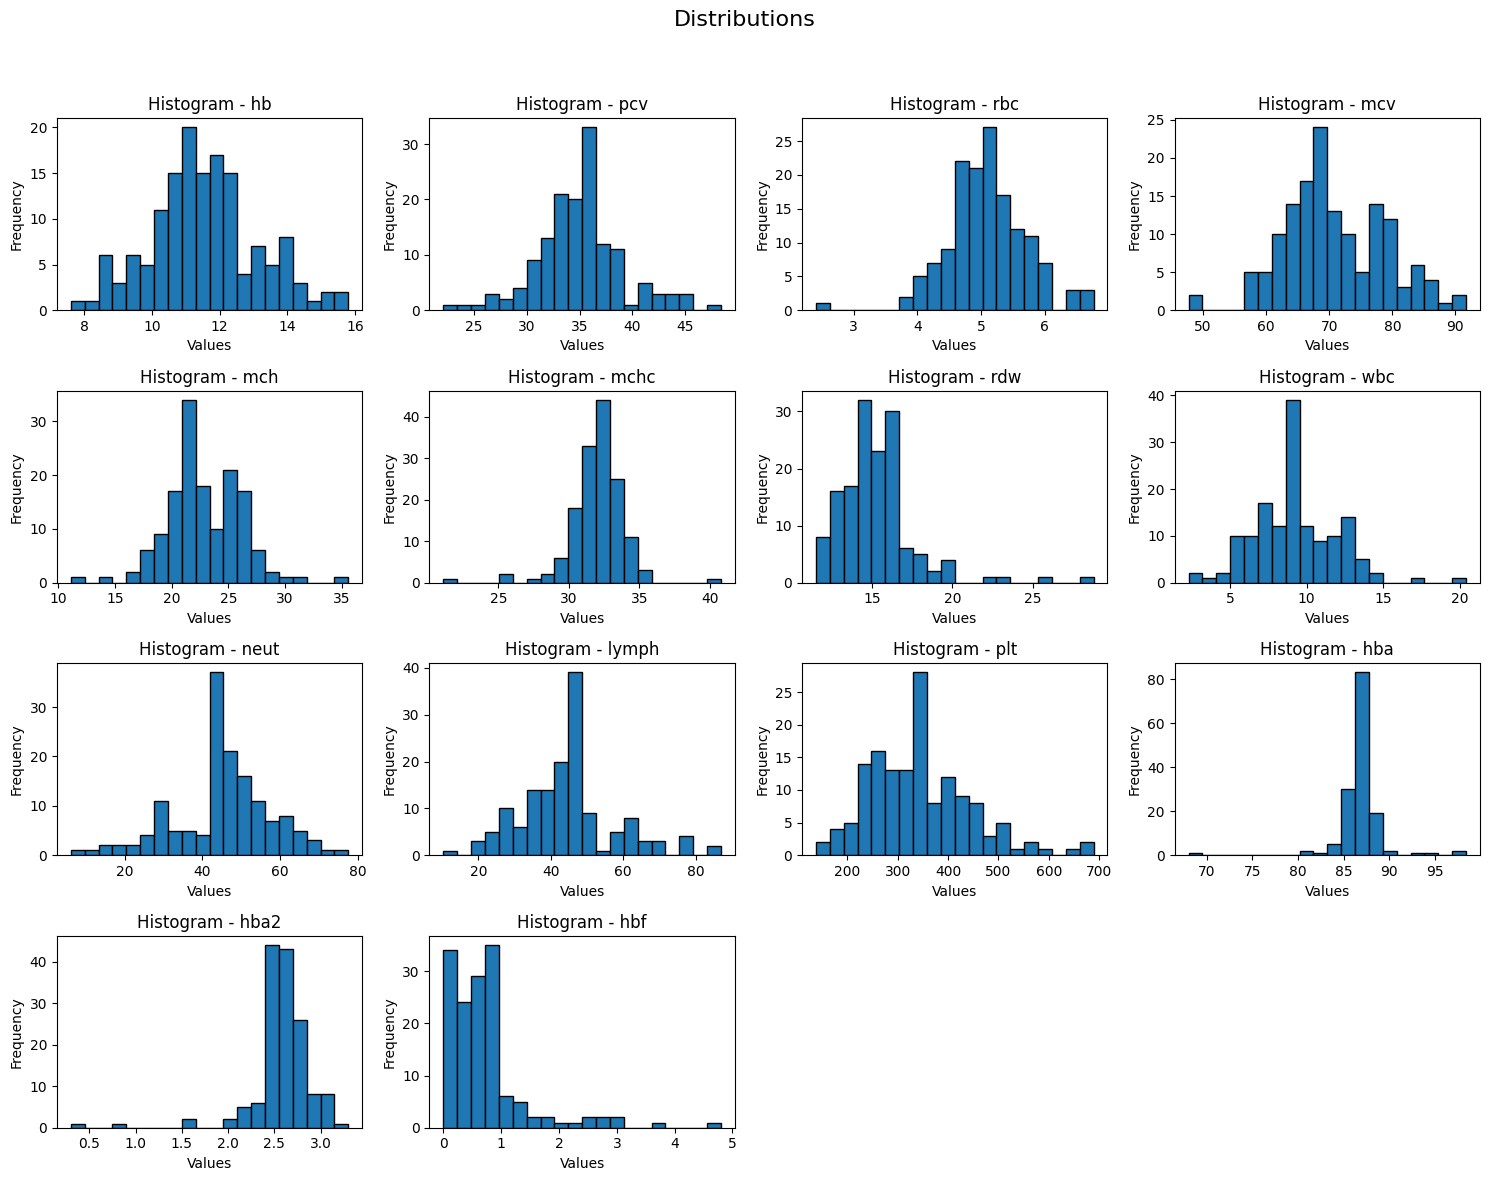

In [ ]:
ax = sns.countplot(x='sex', data=twoalphas, order=[0.0, 1.0])
ax.set_xticklabels(['Male', 'Female'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Males and Females")
plt.show()

features = twoalphas.columns[1:15]

fig, axes = plt.subplots(4, 4, figsize=(15, 12))
fig.suptitle("Distributions", fontsize=16)

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]

    ax.hist(twoalphas[feature], bins=20, edgecolor='black')
    ax.set_title(f"Histogram - {feature}")
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")

for idx in range(len(features), 16):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# create DataFrames for features and labels
# le = LabelEncoder()

X = twoalphas.iloc[:, :-1]
y = twoalphas.iloc[:, -1].map({'silent carrier': 0, 'alpha trait': 1})
# y = le.fit_transform(twoalphas.iloc[:, -1])

<Figure size 800x600 with 0 Axes>

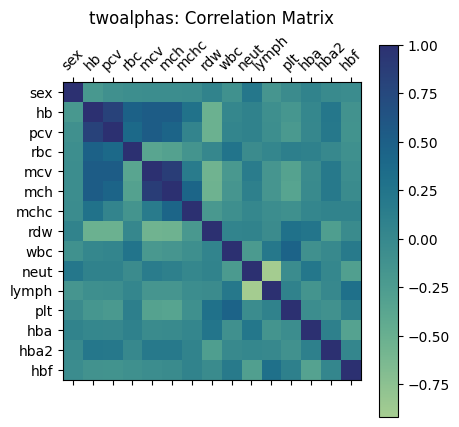

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, cmap='crest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('twoalphas: Correlation Matrix')
plt.show()

In [ ]:
# dimensionality reduction
# pca = PCA(n_components=10)
# data_pca = pca.fit_transform(X)

# explained_variance = pca.explained_variance_ratio_

# # Create a DataFrame for ranking components
# pca_importance_df = pd.DataFrame({
#     'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
#     'Explained Variance Ratio': explained_variance
# })

# # align labels
# X1 = pd.DataFrame(data_pca)

# # visualize components
# first_two_components = data_pca[[0, 1]]
# sns.scatterplot(data=X1, x=0, y=1, hue=y['phenotype'])
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()

# pca = PCA(n_components=0.95)
# X_pca = pca.fit_transform(X)

# # explained variance
# print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
# print(f"# components: {pca.n_components_}")

# # feature importance from 1st principal component
# importance = pca.components_[0]
# feature_names = X.columns

# # feature names & importance
# feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
# feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
# feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# print(feature_importance)

In [ ]:
# tsne = TSNE(n_components=3)
# data_tsne = tsne.fit_transform(X)
# new_data = pd.DataFrame(data_tsne)

# first_two_components = data_tsne[[0, 1]]
# sns.scatterplot(data=X1, x=0, y=1, hue=y['phenotype'])
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()

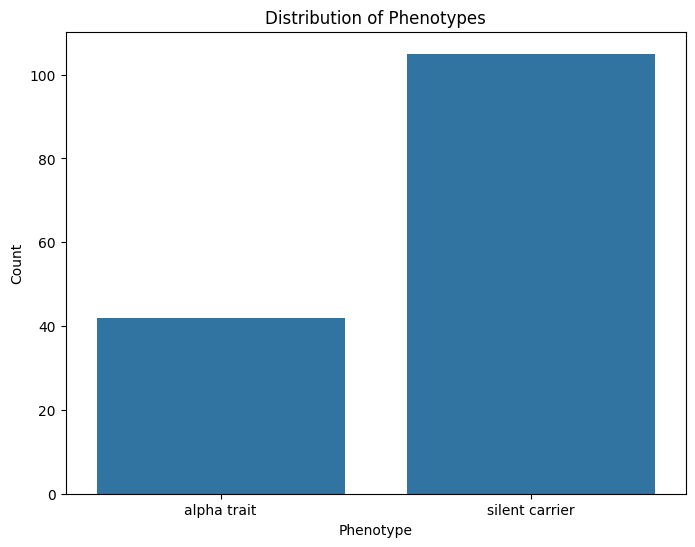

In [ ]:
# imbalance

plt.figure(figsize=(8,6))
sns.countplot(x='phenotype', data=twoalphas)
plt.title("Distribution of Phenotypes")
plt.xlabel("Phenotype")
plt.ylabel("Count")
plt.show()

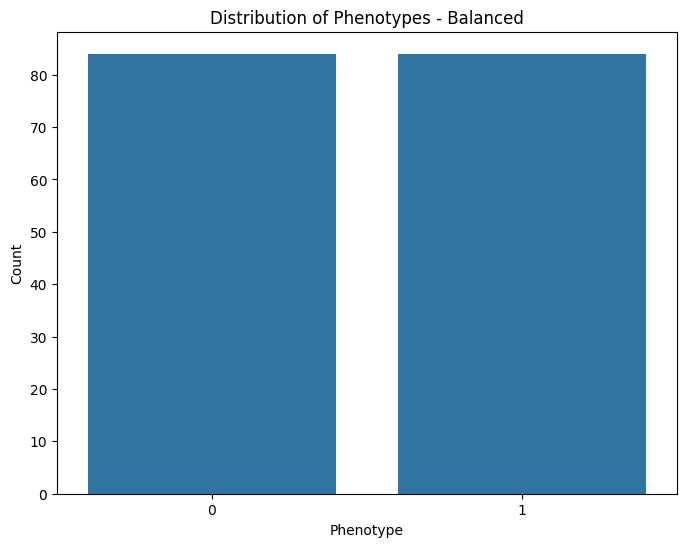

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fix imbalance via oversampling

# undersampler = RandomUnderSampler(sampling_strategy='majority')
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# X, y = undersampler.fit_resample(X, y)

# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_df = pd.DataFrame(y_train)

plt.figure(figsize=(8,6))
sns.countplot(x=y_df['phenotype'], data=y_df)
plt.title("Distribution of Phenotypes - Balanced")
plt.xlabel("Phenotype")
plt.ylabel("Count")
plt.show()

# Model Training

In [ ]:
# evaluation

metrics = {
    'model': [],
    'test_accuracy': [],
    'train_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auroc': []
}

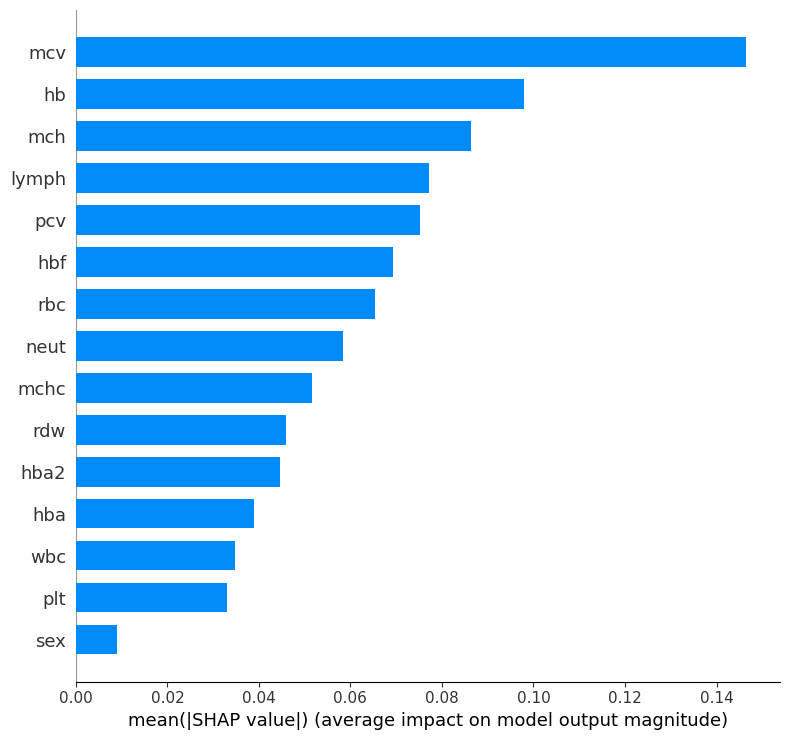

Best parameter: {'C': 0.01}
AUROC: 0.7513227513227514
Train Accuracy: 0.8095238095238095
Test Accuracy: 0.6666666666666666
Precision: 0.46153846153846156
Recall: 0.6666666666666666
f1: 0.5454545454545454


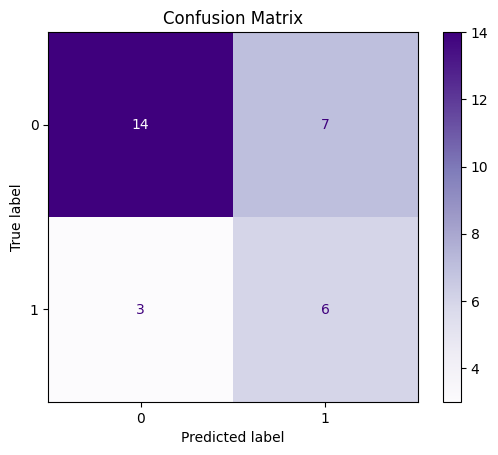

In [ ]:
# logistic regression
model = LogisticRegression(penalty='l2', max_iter=1000)

# define hyperparameters
parameters = {'C': [0.001,0.01,0.1,1,10]}

# grid search
grid_search = GridSearchCV(model, param_grid=parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# feature importance on best model
feature_names = twoalphas.columns.tolist()[:-1]
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

# make predictions
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# evaluation
auroc = roc_auc_score(y_test, y_test_probs)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Best parameter:", grid_search.best_params_)
print("AUROC:", auroc)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)
ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()
metrics['model'].append('Logistic Regression')
metrics['test_accuracy'].append(test_accuracy)
metrics['train_accuracy'].append(train_accuracy)
metrics['precision'].append(precision)
metrics['recall'].append(recall)
metrics['f1'].append(f1)
metrics['auroc'].append(auroc)

Best parameter: {'C': 100, 'degree': 4, 'kernel': 'poly'}
AUROC: 0.5185185185185186
Train Accuracy: 0.9821428571428571
Test Accuracy: 0.4666666666666667
Precision: 0.26666666666666666
Recall: 0.4444444444444444
f1: 0.3333333333333333


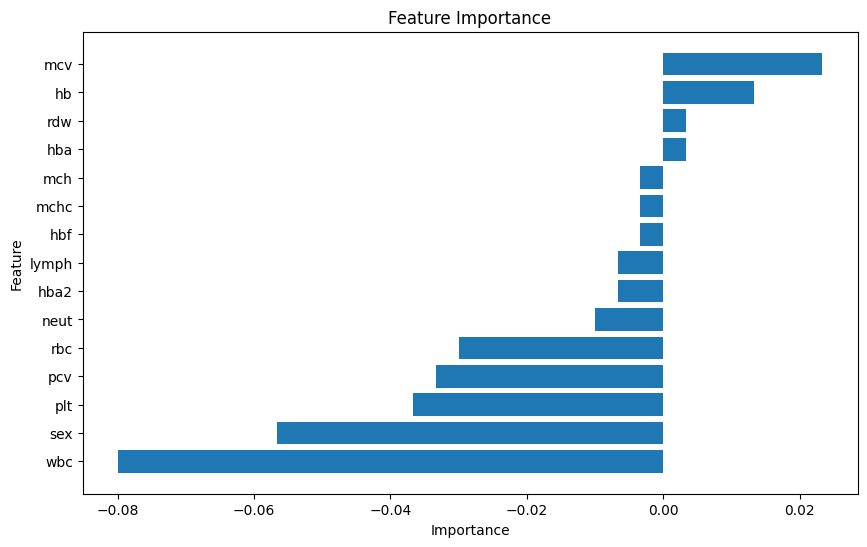

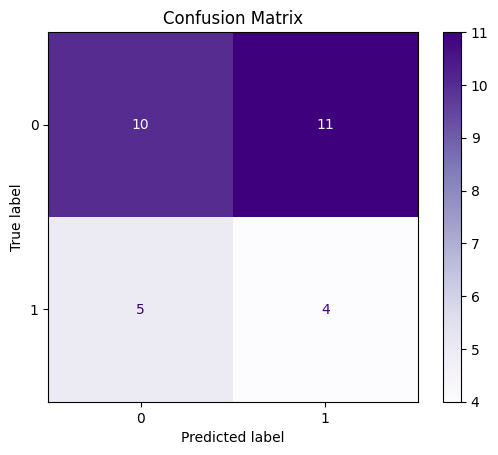

In [ ]:
#svc

model = SVC(probability=True)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    # 'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'degree': [1, 2, 3, 4]
}

# grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# feature importance on best model
perm_importance = permutation_importance(best_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()

# make predictions
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# evaluation
auroc = roc_auc_score(y_test, y_test_probs)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Best parameter:", grid_search.best_params_)
print("AUROC:", auroc)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)
ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()
metrics['model'].append('SVC')
metrics['test_accuracy'].append(test_accuracy)
metrics['train_accuracy'].append(train_accuracy)
metrics['precision'].append(precision)
metrics['recall'].append(recall)
metrics['f1'].append(f1)
metrics['auroc'].append(auroc)

Best parameter: {'max_depth': 10, 'n_estimators': 200}
AUROC: 0.7566137566137566
Train Accuracy: 1.0
Test Accuracy: 0.6333333333333333
Precision: 0.4166666666666667
Recall: 0.5555555555555556
f1: 0.47619047619047616


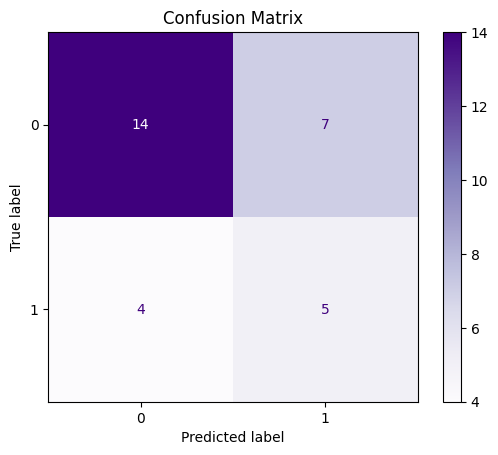

In [ ]:
# random forest

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
}

# grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# feature importance on best model
# importances = best_model.feature_importances_
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.title("Feature Importance")
# plt.gca().invert_yaxis()
# plt.show()

# make predictions
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# evaluation
auroc = roc_auc_score(y_test, y_test_probs)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Best parameter:", grid_search.best_params_)
print("AUROC:", auroc)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)
ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()
metrics['model'].append('Random Forest')
metrics['test_accuracy'].append(test_accuracy)
metrics['train_accuracy'].append(train_accuracy)
metrics['precision'].append(precision)
metrics['recall'].append(recall)
metrics['f1'].append(f1)
metrics['auroc'].append(auroc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best parameter: {'learning_rate': 0.1, 'n_estimators': 250}
AUROC: 0.8306878306878307
Train Accuracy: 0.9940476190476191
Test Accuracy: 0.7
Precision: 0.5
Recall: 0.6666666666666666
f1: 0.5714285714285714


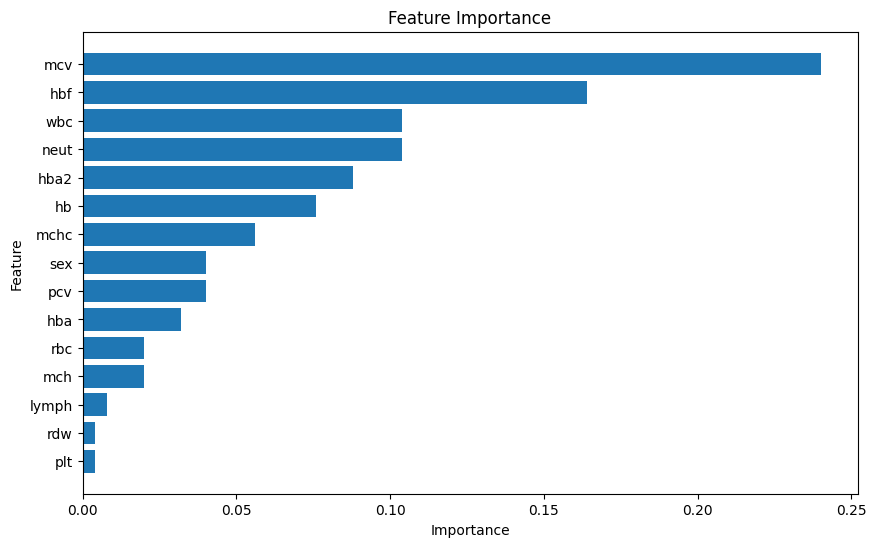

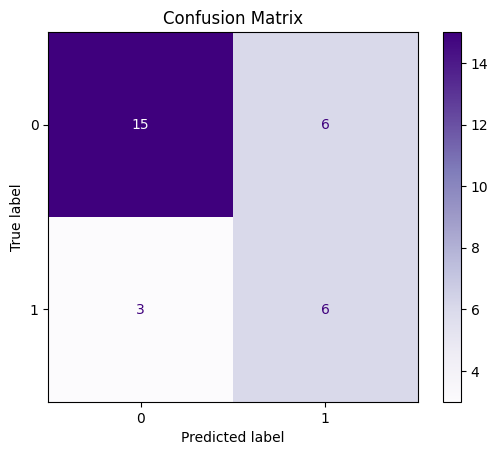

In [ ]:
# adaboost

model = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0]
}

# grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# feature importance
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()

# make predictions
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# evaluation
auroc = roc_auc_score(y_test, y_test_probs)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Best parameter:", grid_search.best_params_)
print("AUROC:", auroc)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)
ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()
metrics['model'].append('AdaBoost')
metrics['test_accuracy'].append(test_accuracy)
metrics['train_accuracy'].append(train_accuracy)
metrics['precision'].append(precision)
metrics['recall'].append(recall)
metrics['f1'].append(f1)
metrics['auroc'].append(auroc)

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_360 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_360 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_361 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_361 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5881 - loss: 0.7760 - val_accuracy: 0.6667 - val_loss: 0.6642
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5738 - loss: 0.7887 - val_accuracy: 0.6667 - val_loss: 0.6487
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5998 - loss: 0.7255 - val_accuracy: 0.6667 - val_loss: 0.6321
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - loss: 0.6911 - val_accuracy: 0.7333 - val_loss: 0.6190
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5740 - loss: 0.7170 - val_accuracy: 0.7667 - val_loss: 0.6071
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6153 - loss: 0.6976 - val_accuracy: 0.7667 - val_loss: 0.5999
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.6300 - val_accuracy: 0.8000 - val_loss: 0.5939
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6389 - loss: 0.6949 - val_accuracy: 0.8000 - val_loss

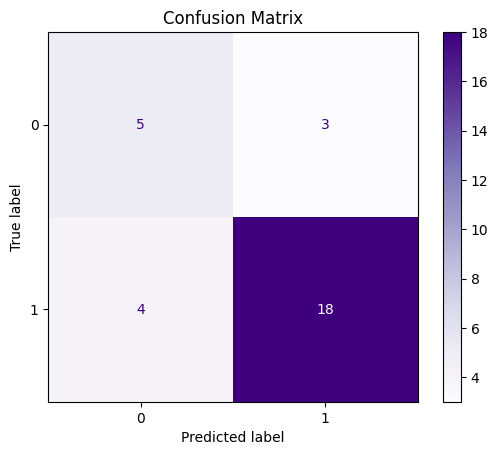

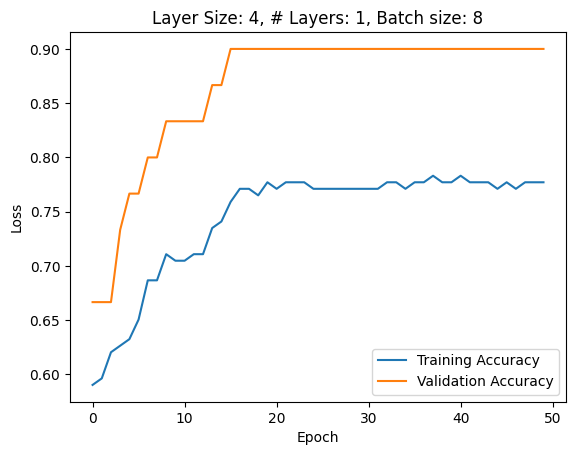

Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_362 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_362 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_363 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_364 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_364 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.4113 - loss: 0.7327 - val_accuracy: 0.5667 - val_loss: 0.6712
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4411 - loss: 0.6839 - val_accuracy: 0.6333 - val_loss: 0.6631
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4613 - loss: 0.6961 - val_accuracy: 0.6333 - val_loss: 0.6563
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4625 - loss: 0.6883 - val_accuracy: 0.6333 - val_loss: 0.6489
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5458 - loss: 0.6817 - val_accuracy: 0.6667 - val_loss: 0.6434
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5329 - loss: 0.6837 - val_accuracy: 0.6667 - val_loss: 0.6368
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 0.6662 - val_accuracy: 0.6333 - val_loss: 0.6298
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5872 - loss: 0.6576 - val_accuracy: 0.6667 - val_los

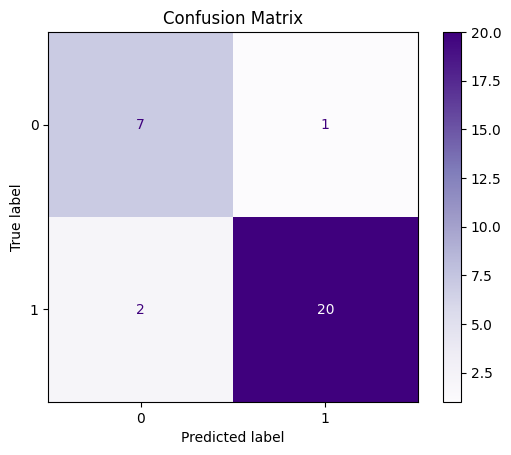

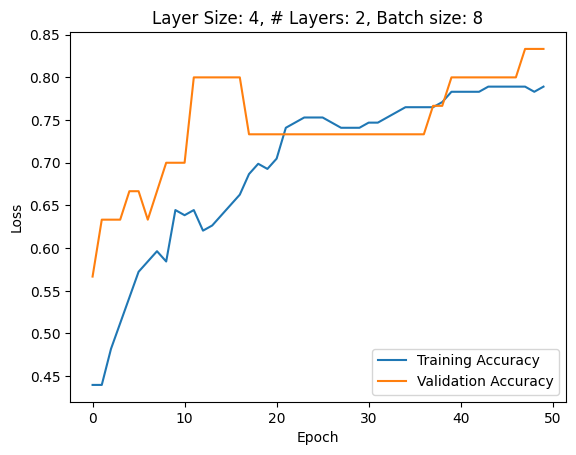

Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_365 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_365 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_366 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_366 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_367 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_367 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_368 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_368 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3998 - loss: 0.7271 - val_accuracy: 0.4000 - val_loss: 0.7412
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4237 - loss: 0.7036 - val_accuracy: 0.2667 - val_loss: 0.7264
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4793 - loss: 0.6839 - val_accuracy: 0.3000 - val_loss: 0.7123
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5589 - loss: 0.6730 - val_accuracy: 0.3000 - val_loss: 0.7030
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4984 - loss: 0.6918 - val_accuracy: 0.3000 - val_loss: 0.6938
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5265 - loss: 0.6820 - val_accuracy: 0.3000 - val_loss: 0.6872
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5728 - loss: 0.6465 - val_accuracy: 0.5333 - val_loss: 0.6799
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5469 - loss: 0.6427 - val_accuracy: 0.6667 - val_loss

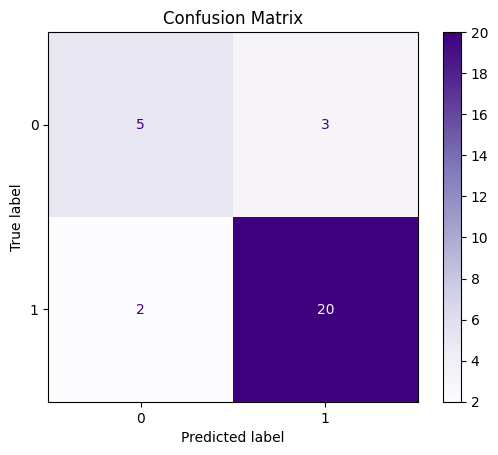

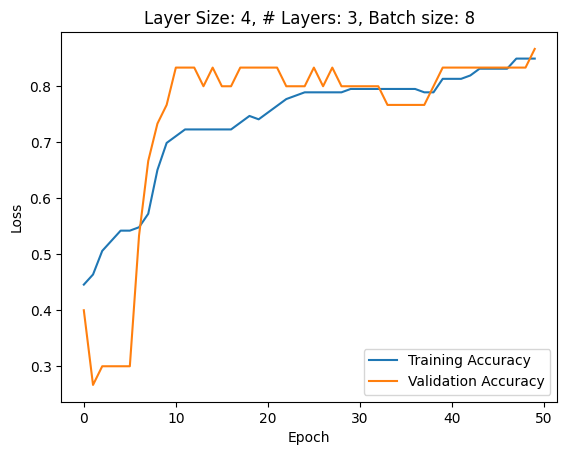

Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_369 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_369 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_370 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_370 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_371 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_371 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_372 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_372 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_373 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_373 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5134 - loss: 0.6929 - val_accuracy: 0.7333 - val_loss: 0.6873
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4661 - loss: 0.6905 - val_accuracy: 0.7333 - val_loss: 0.6798
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5538 - loss: 0.6858 - val_accuracy: 0.7333 - val_loss: 0.6694
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5113 - loss: 0.6850 - val_accuracy: 0.7000 - val_loss: 0.6619
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4948 - loss: 0.6861 - val_accuracy: 0.7000 - val_loss: 0.6526
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6053 - loss: 0.6714 - val_accuracy: 0.7000 - val_loss: 0.6369
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5144 - loss: 0.6722 - val_accuracy: 0.6333 - val_loss: 0.6244
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6135 - loss: 0.6558 - val_accuracy: 0.6333 - val_loss

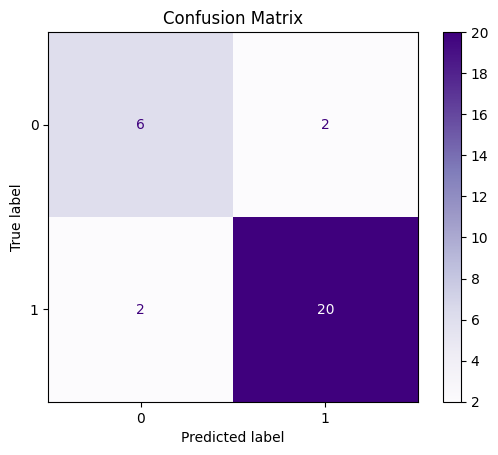

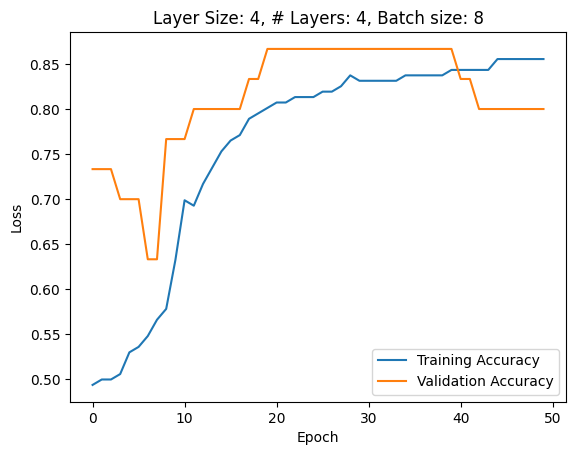

Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_374 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_374 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_375 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_375 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_376 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_376 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_377 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_377 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_378 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_378 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_379 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_379 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4966 - loss: 0.6935 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5979 - loss: 0.6920 - val_accuracy: 0.5333 - val_loss: 0.6926
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6845 - loss: 0.6922 - val_accuracy: 0.7333 - val_loss: 0.6914
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7363 - loss: 0.6912 - val_accuracy: 0.7333 - val_loss: 0.6893
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6958 - loss: 0.6902 - val_accuracy: 0.7333 - val_loss: 0.6850
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6744 - loss: 0.6883 - val_accuracy: 0.7667 - val_loss: 0.6784
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6180 - loss: 0.6837 - val_accuracy: 0.7667 - val_loss: 0.6691
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6557 - loss: 0.6755 - val_accuracy: 0.7667 - val_loss

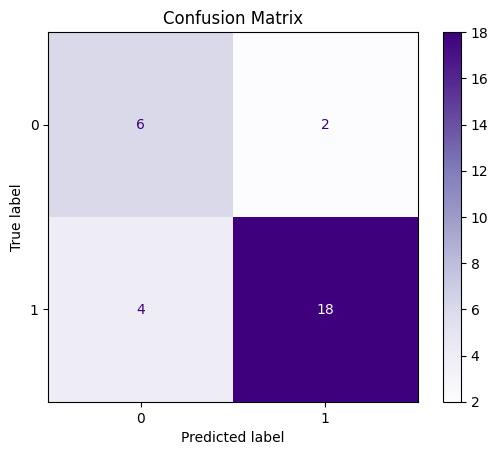

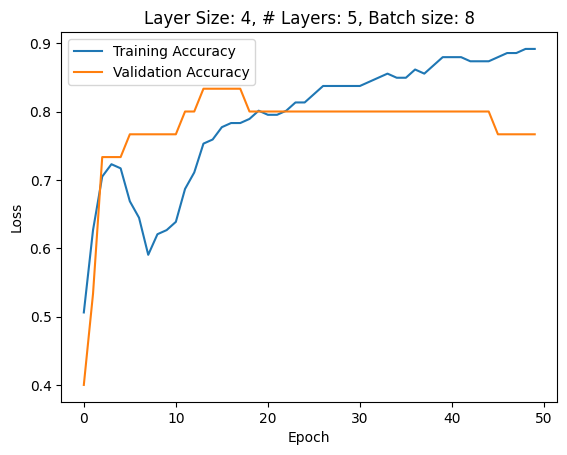

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_380 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_380 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_381 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_381 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.4611 - loss: 0.8690 - val_accuracy: 0.4333 - val_loss: 0.8837
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4696 - loss: 0.8766 - val_accuracy: 0.4333 - val_loss: 0.8584
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4179 - loss: 0.9031 - val_accuracy: 0.4333 - val_loss: 0.8330
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4724 - loss: 0.8544 - val_accuracy: 0.5000 - val_loss: 0.8117
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4936 - loss: 0.8282 - val_accuracy: 0.5000 - val_loss: 0.7935
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 0.7050 - val_accuracy: 0.5000 - val_loss: 0.7776
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4574 - loss: 0.7965 - val_accuracy: 0.5667 - val_loss: 0.7599
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5234 - loss: 0.7442 - val_accuracy: 0.6333 - val_los

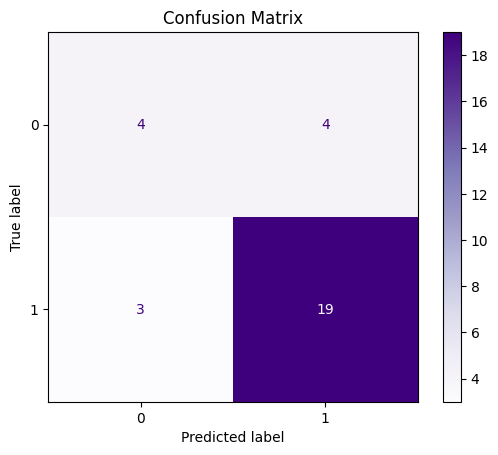

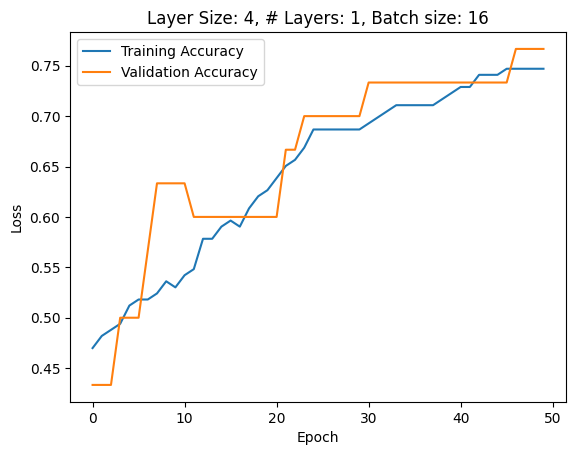

Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_382 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_382 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_383 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_383 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_384 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_384 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.5896 - loss: 0.6777 - val_accuracy: 0.6333 - val_loss: 0.6357
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5730 - loss: 0.6768 - val_accuracy: 0.6333 - val_loss: 0.6299
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 0.6659 - val_accuracy: 0.6333 - val_loss: 0.6232
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6682 - loss: 0.6611 - val_accuracy: 0.7000 - val_loss: 0.6154
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6828 - loss: 0.6624 - val_accuracy: 0.7333 - val_loss: 0.6082
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7081 - loss: 0.6502 - val_accuracy: 0.7667 - val_loss: 0.6014
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6779 - loss: 0.6491 - val_accuracy: 0.7667 - val_loss: 0.5948
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.6382 - val_accuracy: 0.7667 - val_los

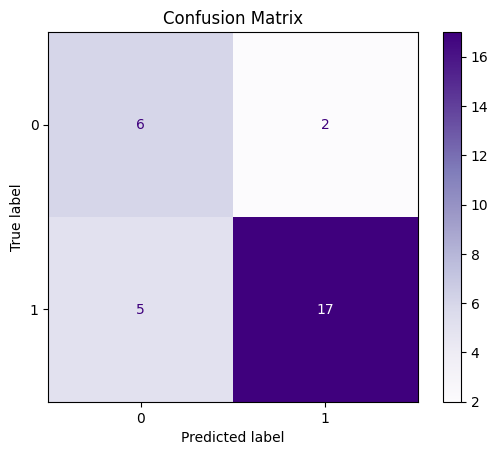

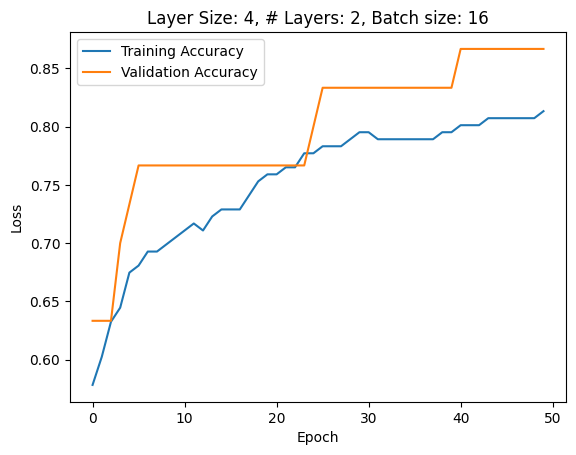

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_385 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_385 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_386 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_386 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_387 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_387 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_388 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_388 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5112 - loss: 0.7051 - val_accuracy: 0.4000 - val_loss: 0.6930
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5810 - loss: 0.6893 - val_accuracy: 0.4333 - val_loss: 0.6895
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 0.6845 - val_accuracy: 0.4667 - val_loss: 0.6868
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5681 - loss: 0.6894 - val_accuracy: 0.4667 - val_loss: 0.6837
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.6579 - val_accuracy: 0.4667 - val_loss: 0.6799
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6249 - loss: 0.6760 - val_accuracy: 0.5000 - val_loss: 0.6748
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6922 - loss: 0.6636 - val_accuracy: 0.5333 - val_loss: 0.6692
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7310 - loss: 0.6571 - val_accuracy: 0.5000 - val_loss

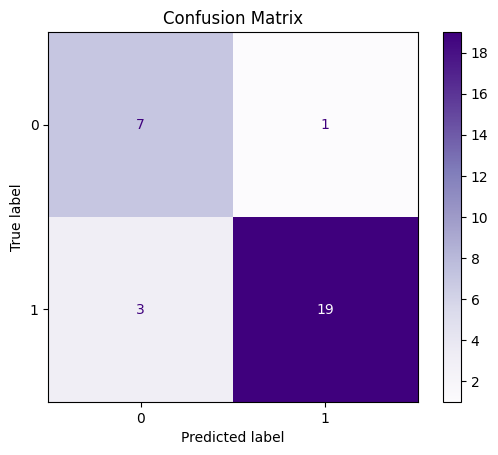

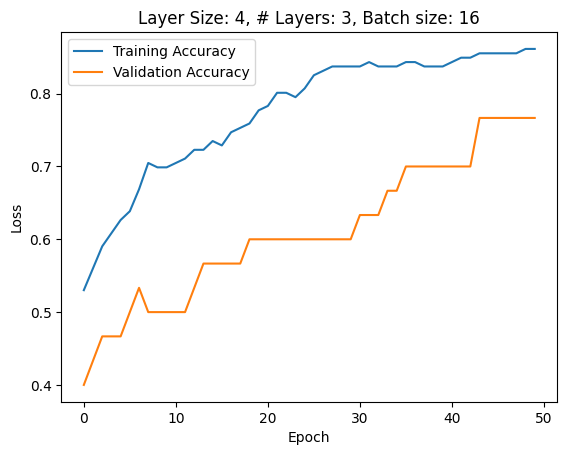

Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_389 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_389 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_390 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_390 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_391 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_391 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_392 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_392 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_393 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_393 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4564 - loss: 0.7131 - val_accuracy: 0.7333 - val_loss: 0.6585
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5021 - loss: 0.6907 - val_accuracy: 0.7333 - val_loss: 0.6565
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5908 - loss: 0.6711 - val_accuracy: 0.7333 - val_loss: 0.6523
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5357 - loss: 0.6904 - val_accuracy: 0.8000 - val_loss: 0.6514
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5961 - loss: 0.6741 - val_accuracy: 0.7667 - val_loss: 0.6485
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6062 - loss: 0.6661 - val_accuracy: 0.7667 - val_loss: 0.6456
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.6599 - val_accuracy: 0.7667 - val_loss: 0.6412
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6554 - loss: 0.6542 - val_accuracy: 0.7667 - val_los

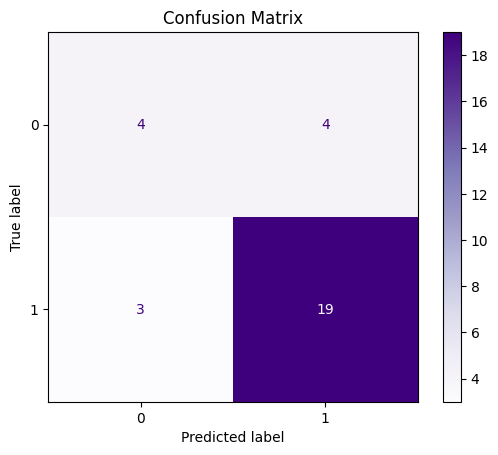

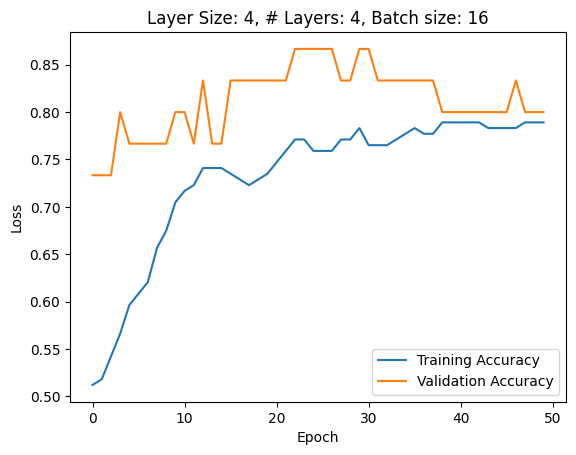

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_394 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_394 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_395 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_395 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_396 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_396 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_397 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_397 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_398 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_398 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_399 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_399 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.4552 - loss: 0.6933 - val_accuracy: 0.3000 - val_loss: 0.6935
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5053 - loss: 0.6931 - val_accuracy: 0.7333 - val_loss: 0.6927
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5028 - loss: 0.6931 - val_accuracy: 0.3667 - val_loss: 0.6932
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5436 - loss: 0.6930 - val_accuracy: 0.3667 - val_loss: 0.6936
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5647 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5840 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6705 - loss: 0.6929 - val_accuracy: 0.4667 - val_loss: 0.6933
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5985 - loss: 0.6929 - val_accuracy: 0.3000 - val_los

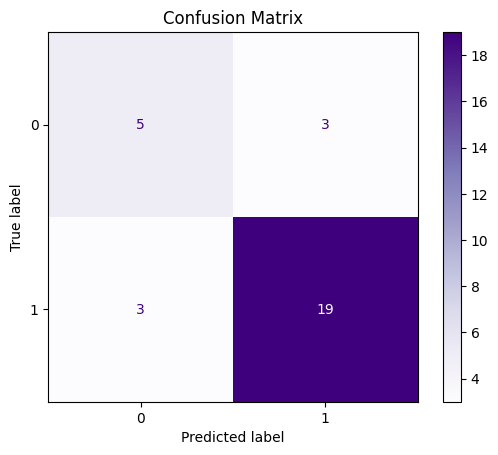

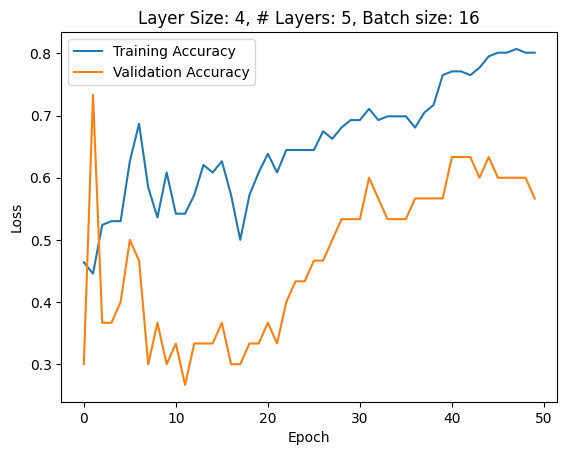

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_400 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_400 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_401 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_401 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.4647 - loss: 0.9475 - val_accuracy: 0.3333 - val_loss: 1.2445
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4104 - loss: 0.8787 - val_accuracy: 0.3333 - val_loss: 1.2180
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4039 - loss: 0.9232 - val_accuracy: 0.3333 - val_loss: 1.1934
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4427 - loss: 0.8874 - val_accuracy: 0.3333 - val_loss: 1.1711
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4394 - loss: 0.8914 - val_accuracy: 0.3333 - val_loss: 1.1478
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4505 - loss: 0.8614 - val_accuracy: 0.3000 - val_loss: 1.1255
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3976 - loss: 0.8961 - val_accuracy: 0.3000 - val_loss: 1.1028
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4544 - loss: 0.8431 - val_accuracy: 0.3000 - val_loss: 1.0825
Epoc

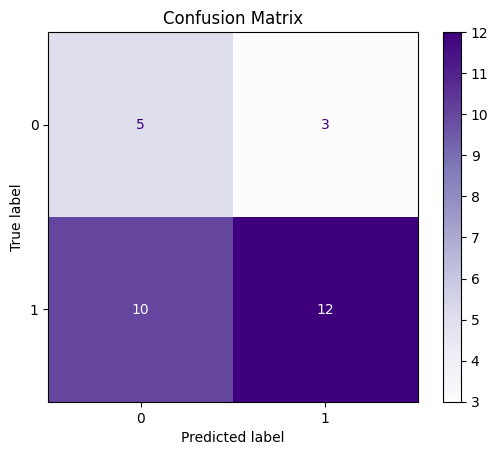

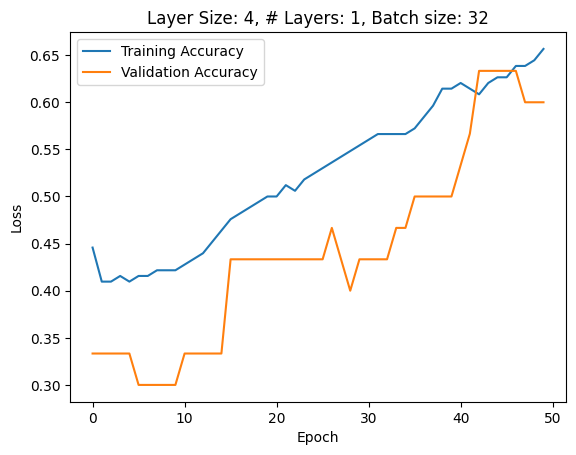

Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_402 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_402 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_403 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_403 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_404 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_404 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.4938 - loss: 0.6888 - val_accuracy: 0.3333 - val_loss: 0.7503
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5163 - loss: 0.6762 - val_accuracy: 0.3667 - val_loss: 0.7458
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5180 - loss: 0.6798 - val_accuracy: 0.3667 - val_loss: 0.7422
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4991 - loss: 0.7029 - val_accuracy: 0.3667 - val_loss: 0.7385
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4876 - loss: 0.6851 - val_accuracy: 0.3667 - val_loss: 0.7356
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5423 - loss: 0.6869 - val_accuracy: 0.4333 - val_loss: 0.7328
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5362 - loss: 0.6534 - val_accuracy: 0.4333 - val_loss: 0.7306
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5845 - loss: 0.6450 - val_accuracy: 0.5000 - val_loss: 0.7287
Epoch

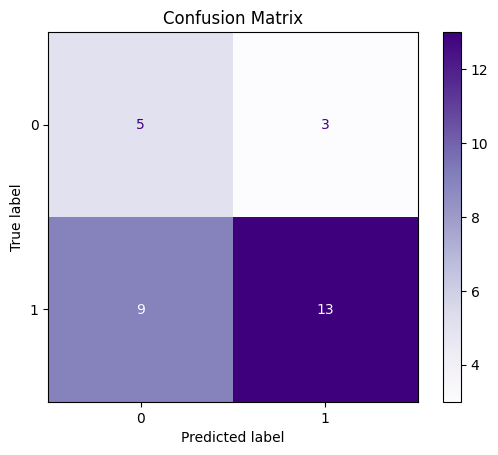

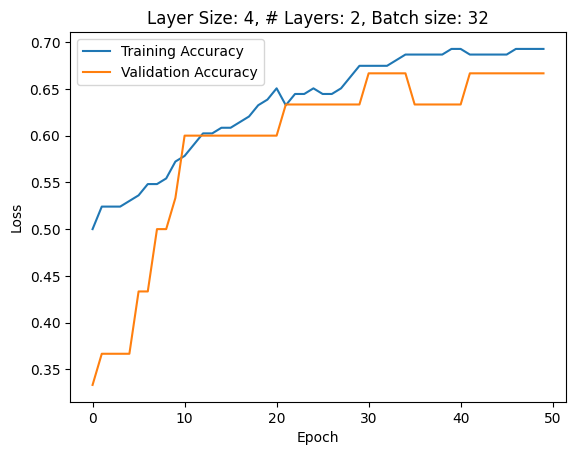

Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_405 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_405 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_406 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_406 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_407 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_407 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_408 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_408 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.5905 - loss: 0.6949 - val_accuracy: 0.9000 - val_loss: 0.7009
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6729 - loss: 0.6826 - val_accuracy: 0.9000 - val_loss: 0.7005
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6313 - loss: 0.6890 - val_accuracy: 0.9000 - val_loss: 0.6998
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6678 - loss: 0.6925 - val_accuracy: 0.8667 - val_loss: 0.6984
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6598 - loss: 0.6924 - val_accuracy: 0.8333 - val_loss: 0.6975
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7084 - loss: 0.6884 - val_accuracy: 0.8333 - val_loss: 0.6965
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7091 - loss: 0.6669 - val_accuracy: 0.8333 - val_loss: 0.6962
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7296 - loss: 0.6748 - val_accuracy: 0.8333 - val_loss: 0.6958
Epoch 

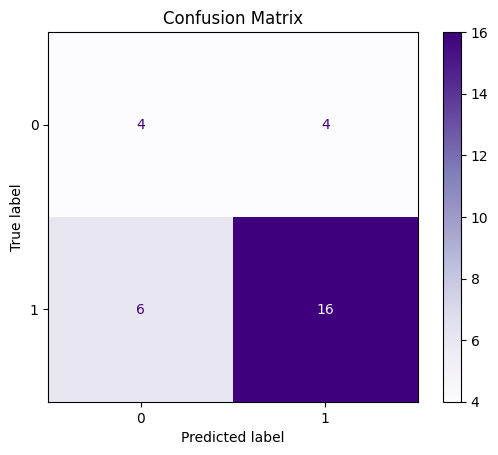

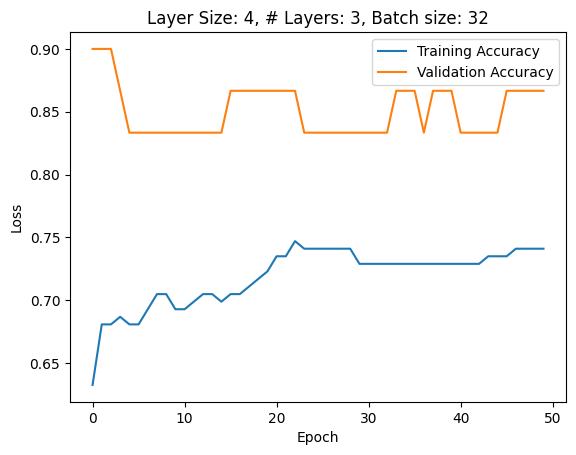

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_409 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_409 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_410 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_410 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_411 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_412 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_412 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_413 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_413 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.3967 - loss: 0.6926 - val_accuracy: 0.5333 - val_loss: 0.6885
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4356 - loss: 0.6889 - val_accuracy: 0.6333 - val_loss: 0.6862
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4724 - loss: 0.6870 - val_accuracy: 0.6667 - val_loss: 0.6839
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5126 - loss: 0.6853 - val_accuracy: 0.7000 - val_loss: 0.6818
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5147 - loss: 0.6829 - val_accuracy: 0.6667 - val_loss: 0.6799
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5269 - loss: 0.6804 - val_accuracy: 0.7000 - val_loss: 0.6783
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5802 - loss: 0.6757 - val_accuracy: 0.7000 - val_loss: 0.6764
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5837 - loss: 0.6773 - val_accuracy: 0.7333 - val_loss: 0.6738


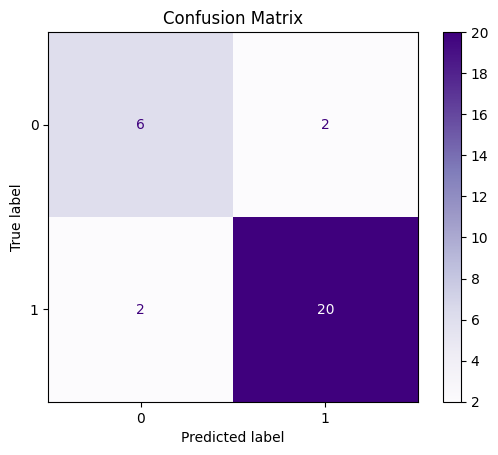

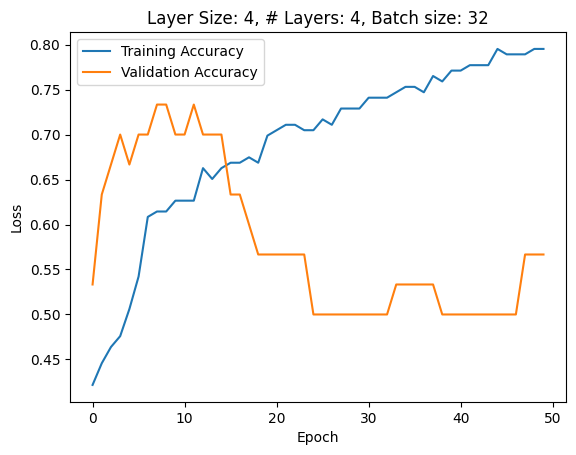

Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_414 (Dense)                    │ (None, 4)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_414 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_415 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_415 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_416 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_416 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_417 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_417 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_418 (Dense)                    │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_418 (Activation)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_419 (Dense)                    │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_419 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.5933 - loss: 0.6513 - val_accuracy: 0.7000 - val_loss: 0.5685
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6735 - loss: 0.6447 - val_accuracy: 0.7000 - val_loss: 0.5674
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6955 - loss: 0.6491 - val_accuracy: 0.7000 - val_loss: 0.5634
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6999 - loss: 0.6546 - val_accuracy: 0.7333 - val_loss: 0.5601
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6919 - loss: 0.6350 - val_accuracy: 0.7000 - val_loss: 0.5543
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6514 - loss: 0.6412 - val_accuracy: 0.7333 - val_loss: 0.5473
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6393 - loss: 0.6460 - val_accuracy: 0.7333 - val_loss: 0.5395
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7066 - loss: 0.6444 - val_accuracy: 0.7333 - val_loss: 0.5318
Epoch 

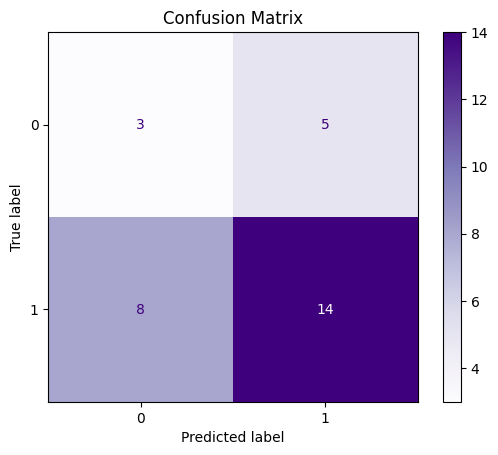

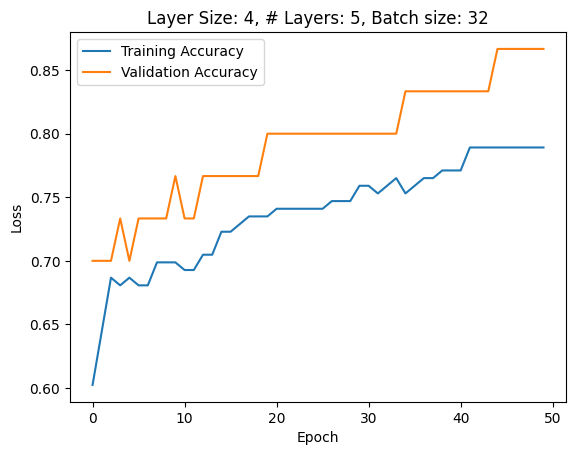

Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_420 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_420 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_421 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_421 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5363 - loss: 0.7703 - val_accuracy: 0.8000 - val_loss: 0.4860
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 0.8266 - val_accuracy: 0.8000 - val_loss: 0.4701
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6184 - loss: 0.6764 - val_accuracy: 0.8333 - val_loss: 0.4584
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.6538 - val_accuracy: 0.8333 - val_loss: 0.4542
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6260 - loss: 0.6877 - val_accuracy: 0.8000 - val_loss: 0.4490
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6272 - loss: 0.6655 - val_accuracy: 0.7667 - val_loss: 0.4485
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6377 - loss: 0.5899 - val_accuracy: 0.7667 - val_loss: 0.4478
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6212 - loss: 0.6173 - val_accuracy: 0.7667 - val_loss

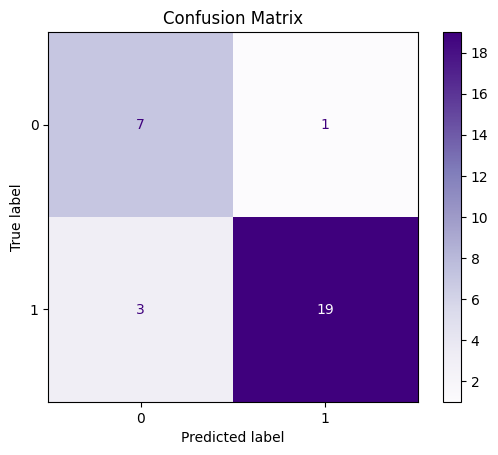

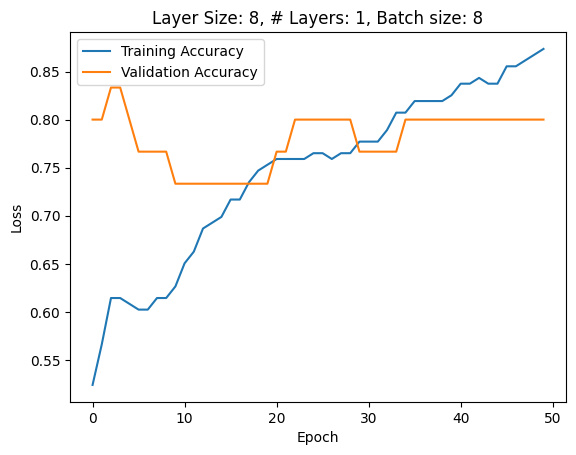

Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_422 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_422 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_423 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_423 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_424 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_424 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5132 - loss: 0.7476 - val_accuracy: 0.4333 - val_loss: 0.7272
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5224 - loss: 0.7211 - val_accuracy: 0.4333 - val_loss: 0.7014
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6294 - loss: 0.6913 - val_accuracy: 0.4667 - val_loss: 0.6849
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5899 - loss: 0.6873 - val_accuracy: 0.6000 - val_loss: 0.6720
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6384 - loss: 0.6651 - val_accuracy: 0.6333 - val_loss: 0.6597
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6331 - loss: 0.6717 - val_accuracy: 0.6333 - val_loss: 0.6508
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6423 - loss: 0.6517 - val_accuracy: 0.6667 - val_loss: 0.6433
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7045 - loss: 0.6424 - val_accuracy: 0.7000 - val_loss

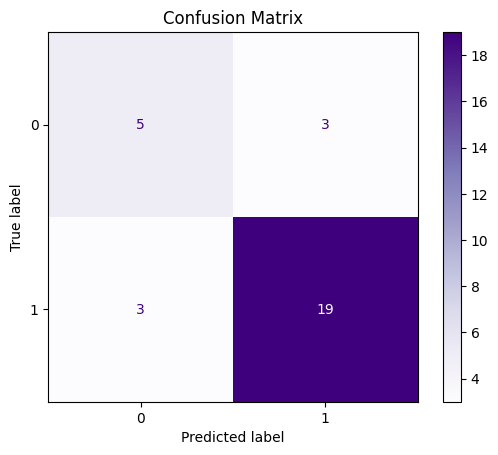

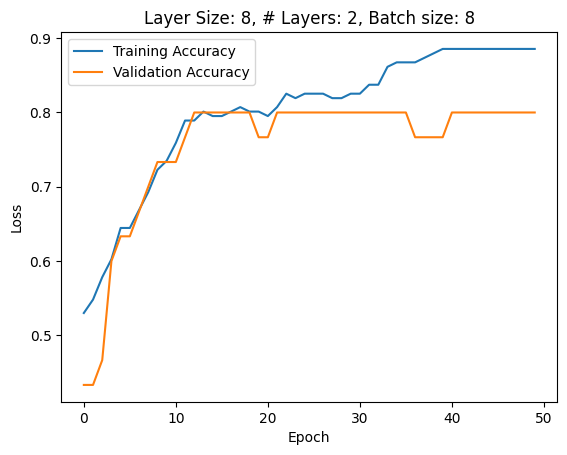

Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_425 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_425 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_426 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_426 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_427 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_427 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_428 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_428 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.3702 - loss: 0.7850 - val_accuracy: 0.4667 - val_loss: 0.7293
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4274 - loss: 0.7335 - val_accuracy: 0.5667 - val_loss: 0.7077
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4111 - loss: 0.7334 - val_accuracy: 0.6333 - val_loss: 0.6940
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5612 - loss: 0.6953 - val_accuracy: 0.6000 - val_loss: 0.6882
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.6773 - val_accuracy: 0.6667 - val_loss: 0.6840
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6213 - loss: 0.6513 - val_accuracy: 0.7333 - val_loss: 0.6802
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5736 - loss: 0.6748 - val_accuracy: 0.7333 - val_loss: 0.6783
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 0.6575 - val_accuracy: 0.7667 - val_loss

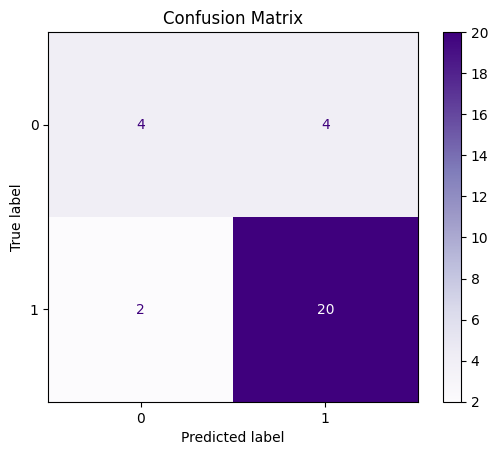

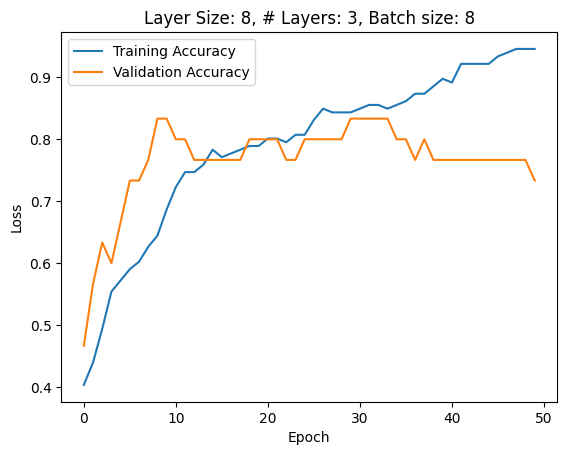

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_429 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_429 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_430 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_430 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_431 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_431 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_432 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_432 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_433 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_433 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5603 - loss: 0.7086 - val_accuracy: 0.4333 - val_loss: 0.7066
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5138 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6050 - loss: 0.6889 - val_accuracy: 0.5333 - val_loss: 0.6948
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5935 - loss: 0.6846 - val_accuracy: 0.5333 - val_loss: 0.6848
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7057 - loss: 0.6623 - val_accuracy: 0.5667 - val_loss: 0.6790
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7144 - loss: 0.6580 - val_accuracy: 0.6000 - val_loss: 0.6731
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.6572 - val_accuracy: 0.6333 - val_loss: 0.6619
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.6295 - val_accuracy: 0.6667 - val_loss

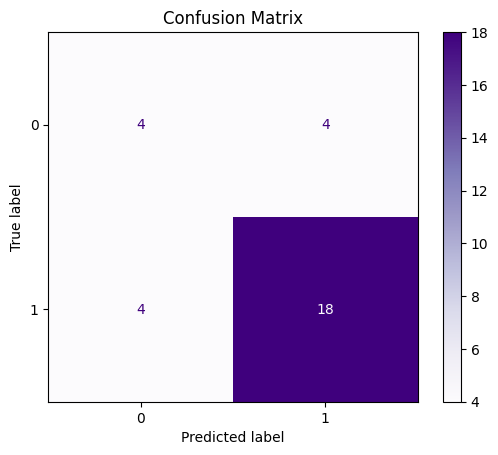

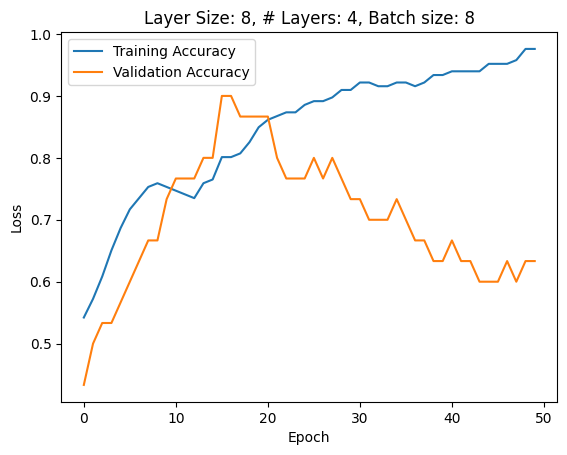

Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_434 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_434 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_435 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_435 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_436 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_436 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_437 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_437 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_438 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_438 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_439 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_439 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5373 - loss: 0.7342 - val_accuracy: 0.5667 - val_loss: 0.6899
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4858 - loss: 0.7205 - val_accuracy: 0.5333 - val_loss: 0.6945
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - loss: 0.6951 - val_accuracy: 0.4000 - val_loss: 0.6967
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5279 - loss: 0.6862 - val_accuracy: 0.4667 - val_loss: 0.6954
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5939 - loss: 0.6800 - val_accuracy: 0.4667 - val_loss: 0.6887
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5388 - loss: 0.6734 - val_accuracy: 0.6000 - val_loss: 0.6782
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.6597 - val_accuracy: 0.7333 - val_loss: 0.6640
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.6529 - val_accuracy: 0.7667 - val_loss

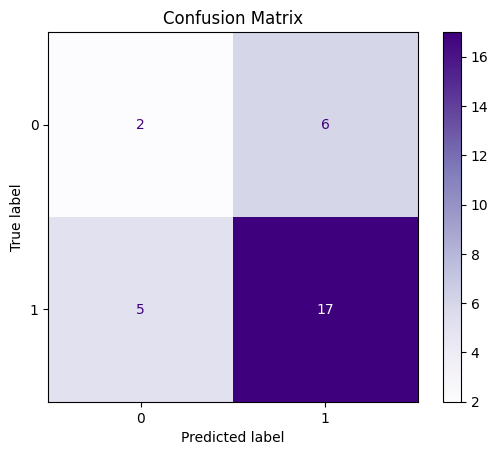

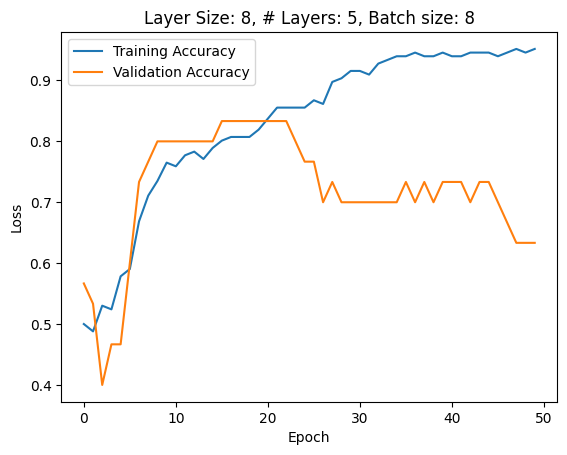

Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_440 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_440 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_441 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_441 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5874 - loss: 0.6963 - val_accuracy: 0.6333 - val_loss: 0.8871
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6290 - loss: 0.7167 - val_accuracy: 0.6333 - val_loss: 0.8499
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6284 - loss: 0.6943 - val_accuracy: 0.6333 - val_loss: 0.8173
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6825 - loss: 0.6315 - val_accuracy: 0.6000 - val_loss: 0.7923
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6639 - loss: 0.6188 - val_accuracy: 0.6000 - val_loss: 0.7655
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6595 - loss: 0.6456 - val_accuracy: 0.6000 - val_loss: 0.7380
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6582 - loss: 0.6392 - val_accuracy: 0.6000 - val_loss: 0.7165
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 0.6356 - val_accuracy: 0.6000 - val_loss

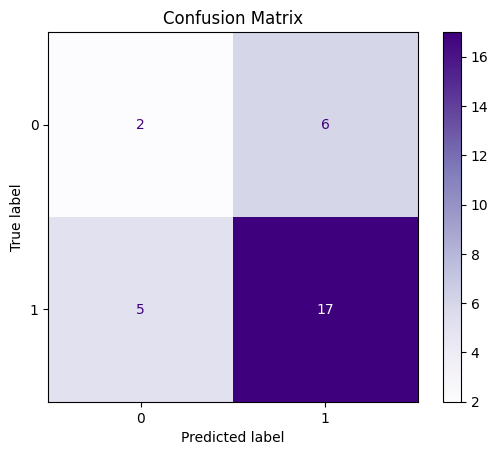

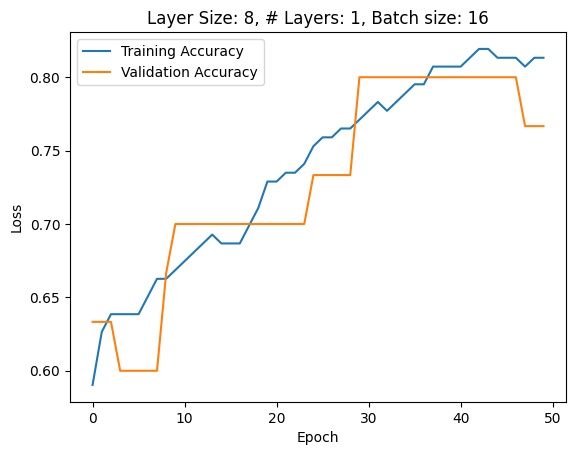

Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_442 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_442 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_443 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_443 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_444 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_444 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7059 - loss: 0.6437 - val_accuracy: 0.8000 - val_loss: 0.6172
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7379 - loss: 0.6584 - val_accuracy: 0.8333 - val_loss: 0.6051
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7243 - loss: 0.6319 - val_accuracy: 0.8000 - val_loss: 0.5940
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7184 - loss: 0.6398 - val_accuracy: 0.8000 - val_loss: 0.5819
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7364 - loss: 0.6154 - val_accuracy: 0.8000 - val_loss: 0.5705
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7956 - loss: 0.5971 - val_accuracy: 0.8333 - val_loss: 0.5560
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7176 - loss: 0.6046 - val_accuracy: 0.8333 - val_loss: 0.5426
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7531 - loss: 0.6139 - val_accuracy: 0.8333 - val_l

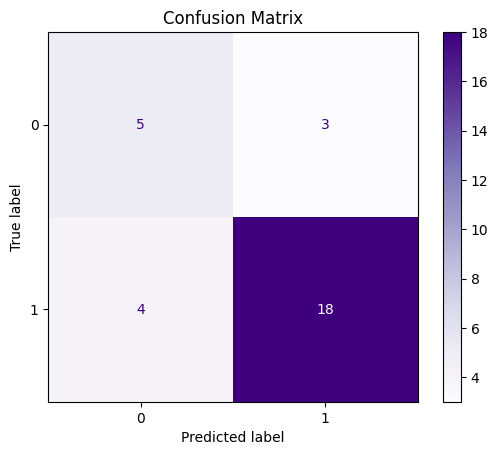

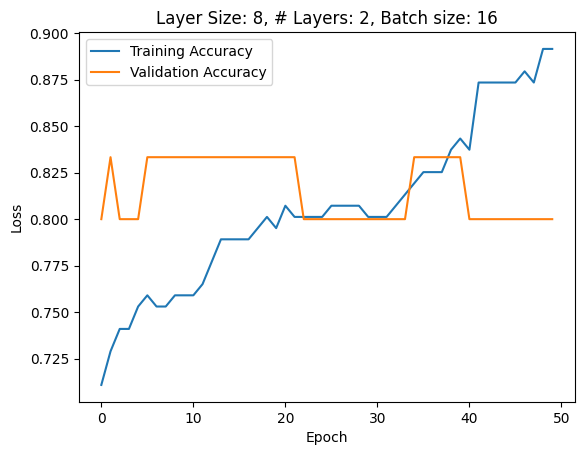

Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_445 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_445 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_446 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_446 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_447 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_447 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_448 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_448 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5198 - loss: 0.7020 - val_accuracy: 0.5000 - val_loss: 0.6876
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5249 - loss: 0.6931 - val_accuracy: 0.6333 - val_loss: 0.6807
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6630 - loss: 0.6823 - val_accuracy: 0.6667 - val_loss: 0.6745
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6913 - loss: 0.6724 - val_accuracy: 0.6667 - val_loss: 0.6695
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7651 - loss: 0.6598 - val_accuracy: 0.6667 - val_loss: 0.6626
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7420 - loss: 0.6592 - val_accuracy: 0.8000 - val_loss: 0.6552
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7494 - loss: 0.6472 - val_accuracy: 0.8000 - val_loss: 0.6476
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7608 - loss: 0.6442 - val_accuracy: 0.8000 - val_loss

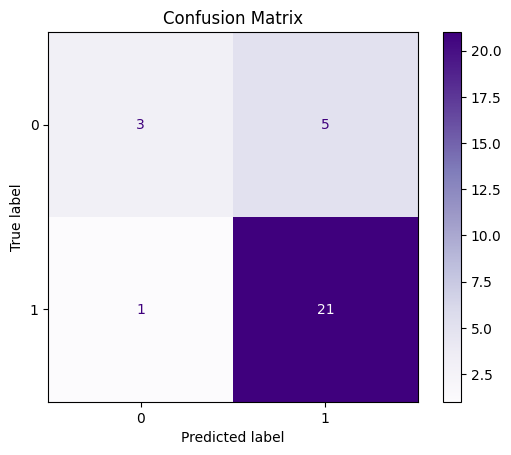

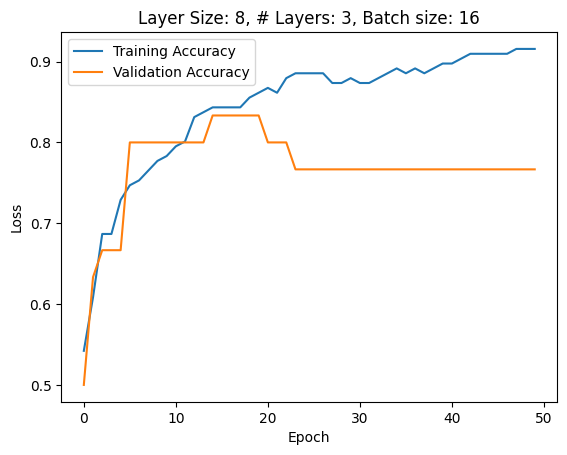

Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_449 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_449 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_450 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_450 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_451 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_451 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_452 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_452 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_453 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_453 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5004 - loss: 0.6908 - val_accuracy: 0.7667 - val_loss: 0.6524
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5426 - loss: 0.6829 - val_accuracy: 0.8667 - val_loss: 0.6457
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6298 - loss: 0.6764 - val_accuracy: 0.8667 - val_loss: 0.6366
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6494 - loss: 0.6702 - val_accuracy: 0.9000 - val_loss: 0.6254
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6715 - loss: 0.6660 - val_accuracy: 0.9000 - val_loss: 0.6109
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6782 - loss: 0.6472 - val_accuracy: 0.9333 - val_loss: 0.5936
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6897 - loss: 0.6481 - val_accuracy: 0.9333 - val_loss: 0.5740
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7101 - loss: 0.6456 - val_accuracy: 0.9333 - val_los

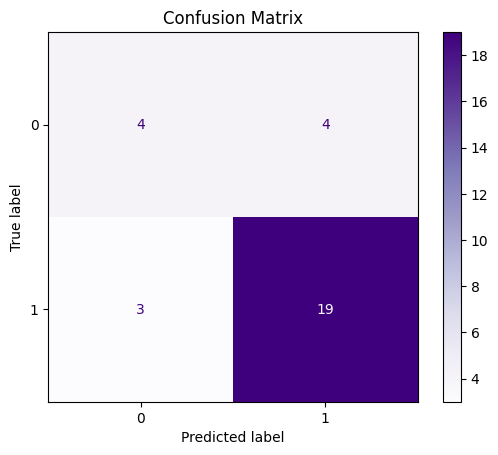

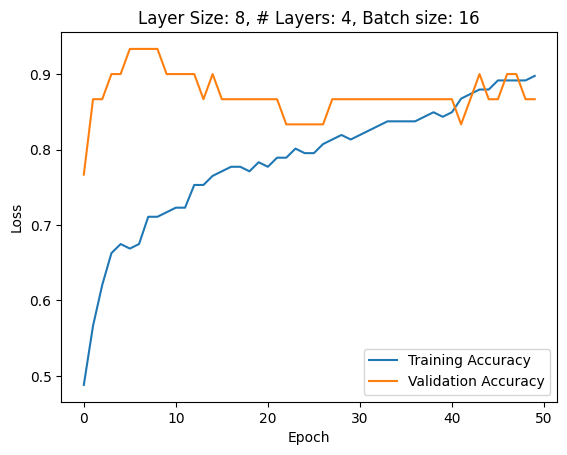

Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_454 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_454 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_455 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_455 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_456 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_456 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_457 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_457 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_458 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_458 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_459 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_459 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.4593 - loss: 0.7137 - val_accuracy: 0.2667 - val_loss: 0.7662
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5137 - loss: 0.7048 - val_accuracy: 0.2667 - val_loss: 0.7488
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4425 - loss: 0.7027 - val_accuracy: 0.2667 - val_loss: 0.7354
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 0.6973 - val_accuracy: 0.2667 - val_loss: 0.7259
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5196 - loss: 0.6885 - val_accuracy: 0.2667 - val_loss: 0.7213
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4937 - loss: 0.6922 - val_accuracy: 0.4000 - val_loss: 0.7163
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5244 - loss: 0.6863 - val_accuracy: 0.4333 - val_loss: 0.7143
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6343 - loss: 0.6798 - val_accuracy: 0.4667 - val_los

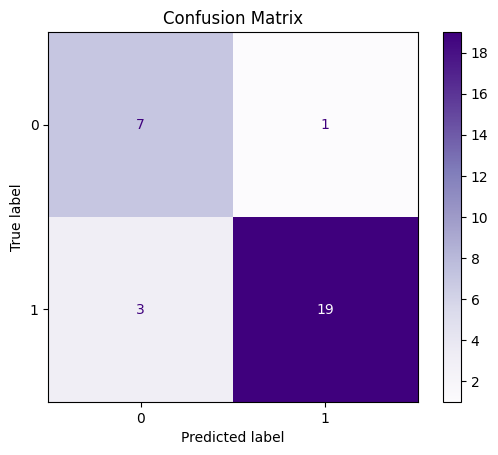

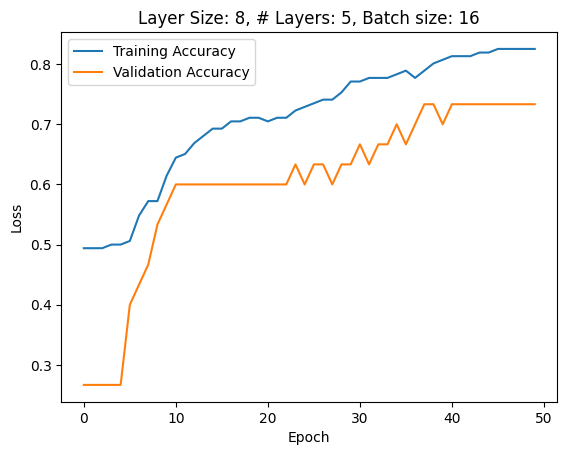

Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_460 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_460 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_461 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_461 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.6617 - loss: 0.6342 - val_accuracy: 0.7000 - val_loss: 0.6737
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6735 - loss: 0.6414 - val_accuracy: 0.7333 - val_loss: 0.6687
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6629 - loss: 0.6211 - val_accuracy: 0.7667 - val_loss: 0.6639
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7005 - loss: 0.6109 - val_accuracy: 0.7667 - val_loss: 0.6591
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6848 - loss: 0.6198 - val_accuracy: 0.7667 - val_loss: 0.6546
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7082 - loss: 0.5903 - val_accuracy: 0.7333 - val_loss: 0.6501
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7249 - loss: 0.5891 - val_accuracy: 0.7333 - val_loss: 0.6462
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7239 - loss: 0.6072 - val_accuracy: 0.7667 - val_loss: 0.6424
Epoch

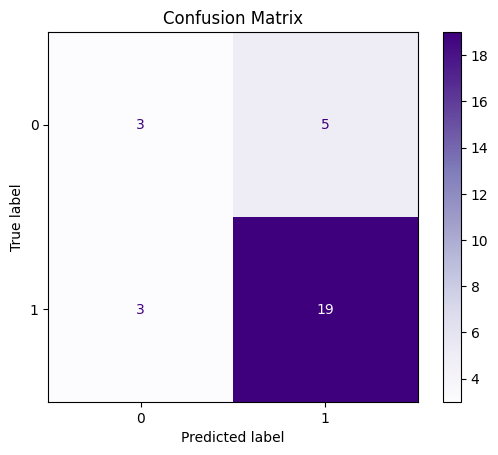

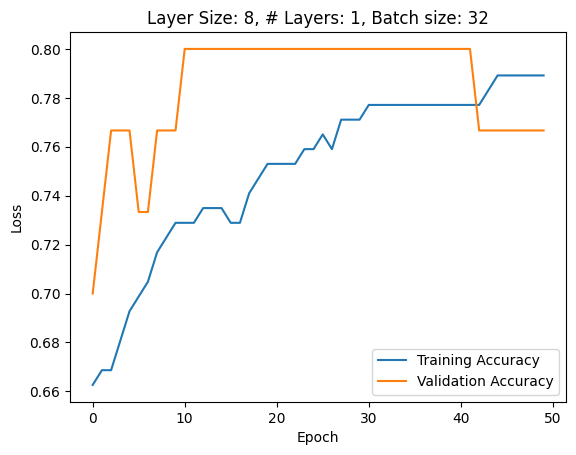

Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_462 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_462 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_463 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_463 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_464 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_464 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.4750 - loss: 0.7224 - val_accuracy: 0.3000 - val_loss: 0.7651
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4596 - loss: 0.7218 - val_accuracy: 0.3000 - val_loss: 0.7570
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4831 - loss: 0.7139 - val_accuracy: 0.3000 - val_loss: 0.7500
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4977 - loss: 0.7005 - val_accuracy: 0.3000 - val_loss: 0.7437
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4826 - loss: 0.7018 - val_accuracy: 0.3667 - val_loss: 0.7364
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5063 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.7296
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5201 - loss: 0.6843 - val_accuracy: 0.4000 - val_loss: 0.7237
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5083 - loss: 0.6847 - val_accuracy: 0.4000 - val_loss: 0.7182
Epoch

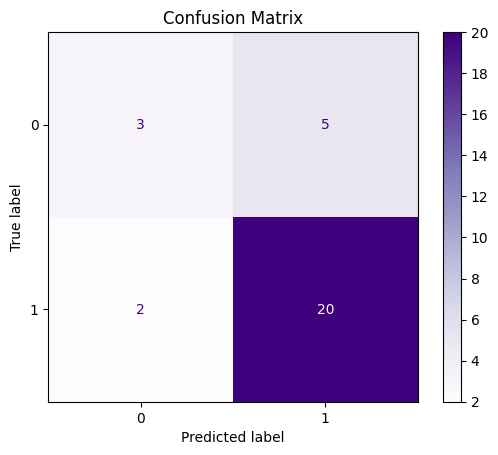

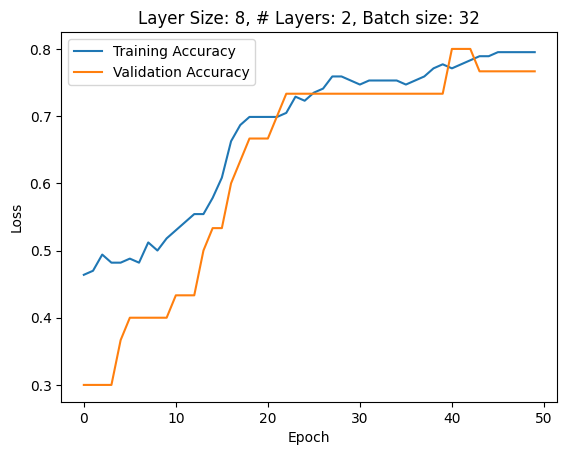

Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_465 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_465 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_466 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_466 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_467 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_467 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_468 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_468 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.4660 - loss: 0.7278 - val_accuracy: 0.7000 - val_loss: 0.6382
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4838 - loss: 0.7242 - val_accuracy: 0.7000 - val_loss: 0.6273
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5333 - loss: 0.6957 - val_accuracy: 0.7000 - val_loss: 0.6145
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5779 - loss: 0.6910 - val_accuracy: 0.7333 - val_loss: 0.6032
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6146 - loss: 0.6735 - val_accuracy: 0.7667 - val_loss: 0.5937
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6282 - loss: 0.6636 - val_accuracy: 0.7667 - val_loss: 0.5833
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6171 - loss: 0.6681 - val_accuracy: 0.7667 - val_loss: 0.5743
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6348 - loss: 0.6612 - val_accuracy: 0.7667 - val_loss: 0.5673

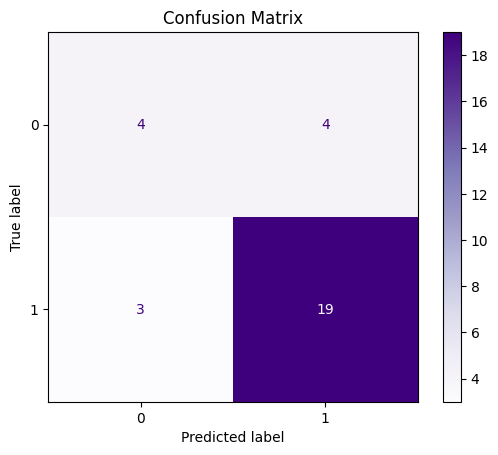

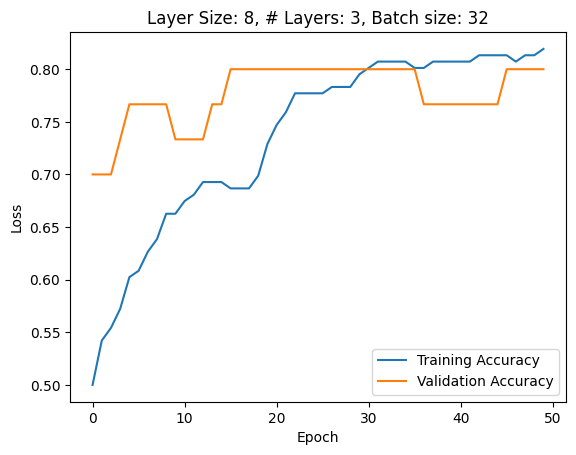

Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_469 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_469 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_470 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_470 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_471 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_471 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_472 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_472 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_473 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_473 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.4726 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.7016
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4721 - loss: 0.6904 - val_accuracy: 0.5333 - val_loss: 0.6985
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5596 - loss: 0.6821 - val_accuracy: 0.4333 - val_loss: 0.6959
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5761 - loss: 0.6732 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5862 - loss: 0.6776 - val_accuracy: 0.5333 - val_loss: 0.6867
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5421 - loss: 0.6795 - val_accuracy: 0.5333 - val_loss: 0.6823
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5613 - loss: 0.6719 - val_accuracy: 0.5333 - val_loss: 0.6779
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5735 - loss: 0.6719 - val_accuracy: 0.5000 - val_loss: 0.6748
Epoch

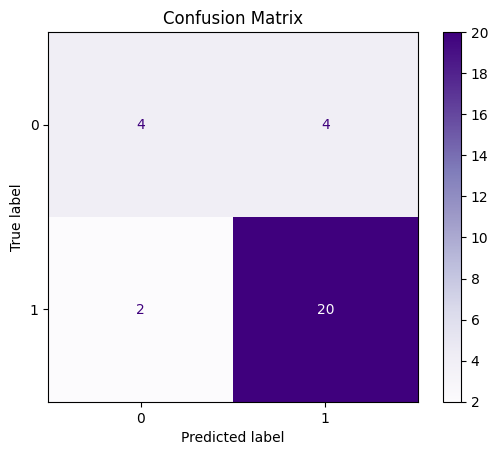

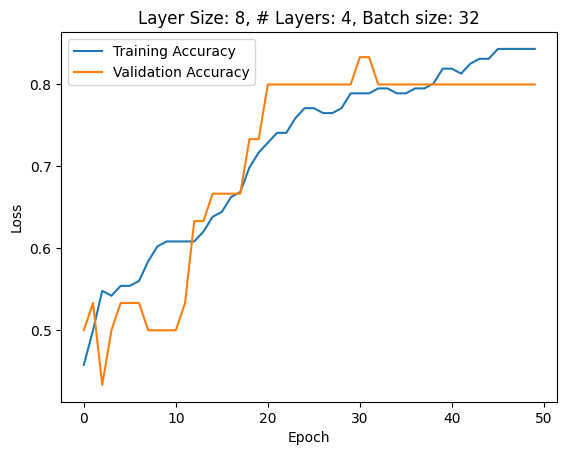

Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_474 (Dense)                    │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_474 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_475 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_475 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_476 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_476 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_477 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_477 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_478 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_478 (Activation)          │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_479 (Dense)                    │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_479 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.5863 - loss: 0.6895 - val_accuracy: 0.7000 - val_loss: 0.6836
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5742 - loss: 0.6897 - val_accuracy: 0.7000 - val_loss: 0.6824
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6626 - loss: 0.6848 - val_accuracy: 0.7333 - val_loss: 0.6813
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6598 - loss: 0.6864 - val_accuracy: 0.7000 - val_loss: 0.6792
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6520 - loss: 0.6830 - val_accuracy: 0.7000 - val_loss: 0.6768
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6520 - loss: 0.6820 - val_accuracy: 0.7333 - val_loss: 0.6741
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6322 - loss: 0.6832 - val_accuracy: 0.7333 - val_loss: 0.6717
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6816 - loss: 0.6786 - val_accuracy: 0.7333 - val_loss: 0.6687
Epoc

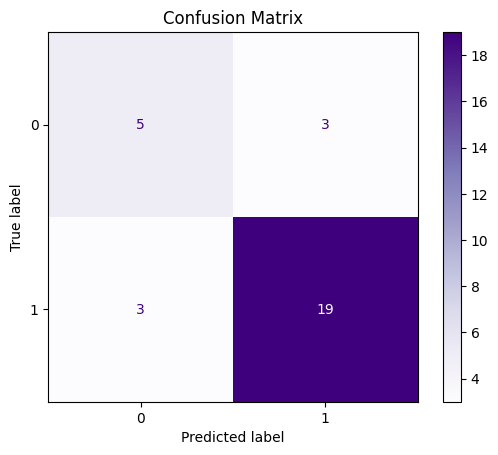

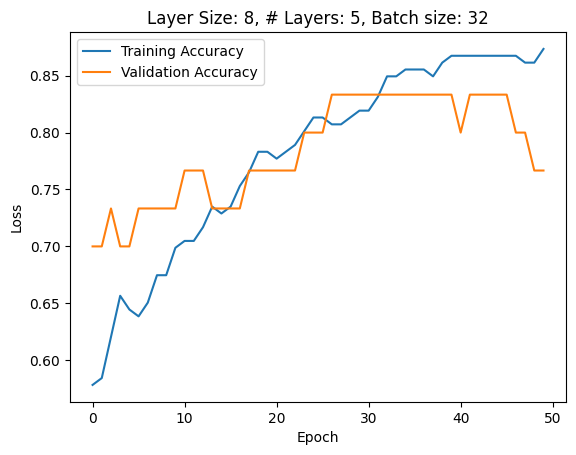

Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_480 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_480 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_481 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_481 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6696 - loss: 0.5962 - val_accuracy: 0.7000 - val_loss: 0.5315
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6717 - loss: 0.5897 - val_accuracy: 0.7333 - val_loss: 0.5147
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5882 - val_accuracy: 0.7667 - val_loss: 0.5035
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7515 - loss: 0.5558 - val_accuracy: 0.8000 - val_loss: 0.4898
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7337 - loss: 0.5728 - val_accuracy: 0.8000 - val_loss: 0.4806
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7637 - loss: 0.5439 - val_accuracy: 0.7667 - val_loss: 0.4639
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7797 - loss: 0.5393 - val_accuracy: 0.7667 - val_loss: 0.4553
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8309 - loss: 0.5094 - val_accuracy: 0.7667 - val_loss

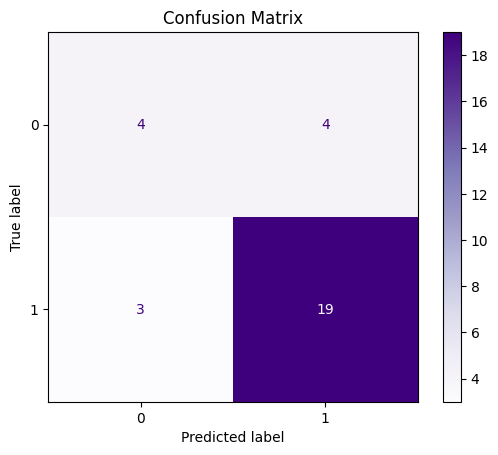

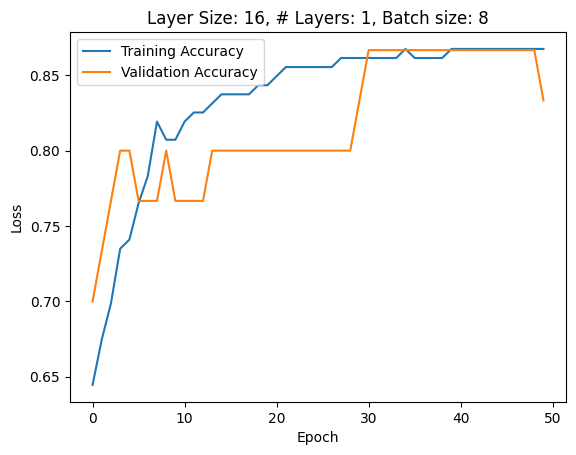

Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_482 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_482 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_483 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_483 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_484 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_484 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5322 - loss: 0.7158 - val_accuracy: 0.7000 - val_loss: 0.7050
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6156 - loss: 0.6430 - val_accuracy: 0.7000 - val_loss: 0.6631
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7323 - loss: 0.5961 - val_accuracy: 0.6667 - val_loss: 0.6314
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7156 - loss: 0.5965 - val_accuracy: 0.7000 - val_loss: 0.5981
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7747 - loss: 0.5752 - val_accuracy: 0.7333 - val_loss: 0.5702
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7344 - loss: 0.5776 - val_accuracy: 0.7000 - val_loss: 0.5446
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7811 - loss: 0.5345 - val_accuracy: 0.7333 - val_loss: 0.5239
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8498 - loss: 0.4946 - val_accuracy: 0.7000 - val_los

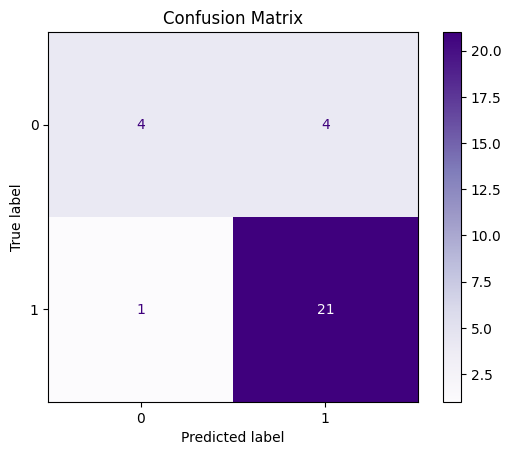

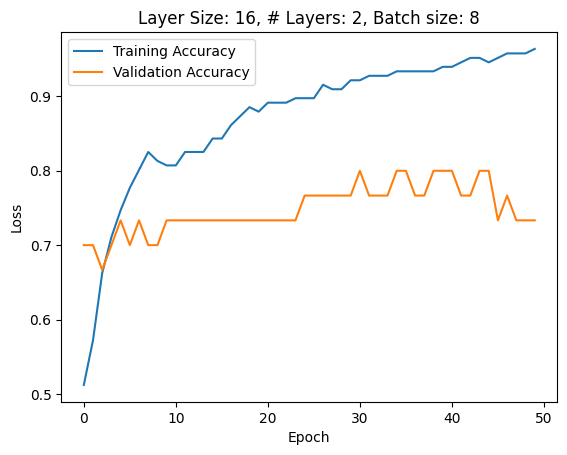

Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_485 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_485 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_486 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_486 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_487 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_487 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_488 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_488 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 817 (3.19 KB)

 Trainable params: 817 (3.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5336 - loss: 0.7243 - val_accuracy: 0.4667 - val_loss: 0.7719
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6381 - loss: 0.6684 - val_accuracy: 0.5667 - val_loss: 0.7040
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6675 - loss: 0.6669 - val_accuracy: 0.7000 - val_loss: 0.6394
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6827 - loss: 0.6406 - val_accuracy: 0.7667 - val_loss: 0.5882
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7342 - loss: 0.6204 - val_accuracy: 0.8333 - val_loss: 0.5603
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7517 - loss: 0.5968 - val_accuracy: 0.8667 - val_loss: 0.5359
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7457 - loss: 0.5778 - val_accuracy: 0.8667 - val_loss: 0.5040
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8242 - loss: 0.5365 - val_accuracy: 0.8000 - val_loss

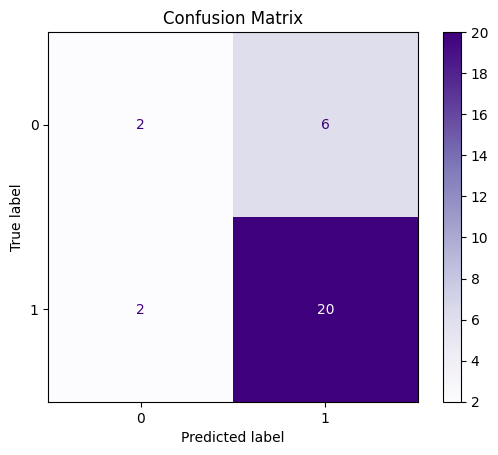

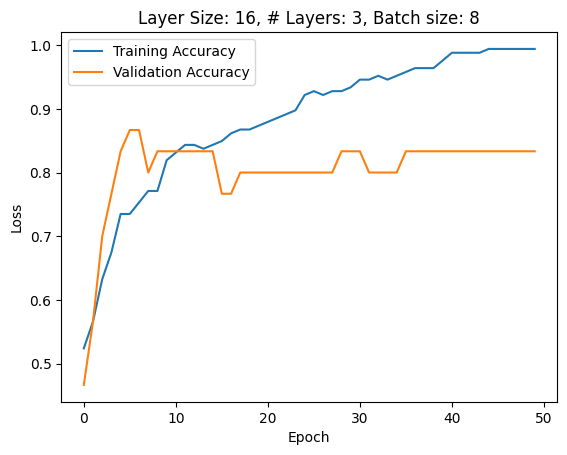

Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_489 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_489 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_490 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_490 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_491 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_491 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_492 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_492 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_493 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_493 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6265 - loss: 0.6715 - val_accuracy: 0.6000 - val_loss: 0.6693
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5835 - loss: 0.6599 - val_accuracy: 0.6667 - val_loss: 0.6454
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6381 - loss: 0.6405 - val_accuracy: 0.7000 - val_loss: 0.5997
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7086 - loss: 0.5638 - val_accuracy: 0.7667 - val_loss: 0.5476
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.5221 - val_accuracy: 0.7667 - val_loss: 0.4937
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7753 - loss: 0.5062 - val_accuracy: 0.7667 - val_loss: 0.4372
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7611 - loss: 0.4801 - val_accuracy: 0.8333 - val_loss: 0.3947
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8285 - loss: 0.4209 - val_accuracy: 0.8333 - val_loss

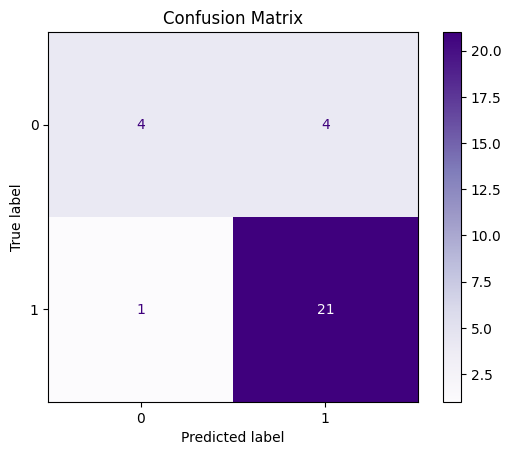

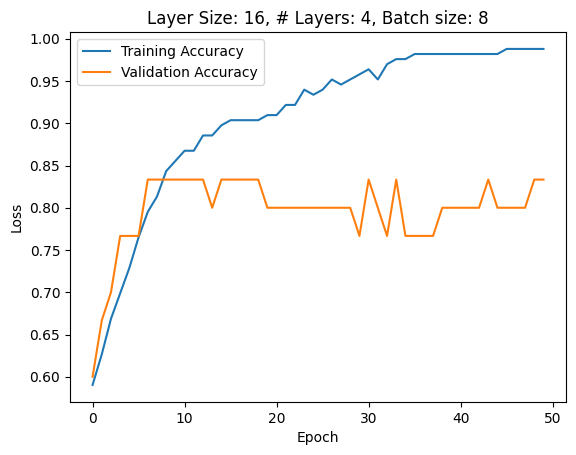

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_494 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_494 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_495 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_495 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_496 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_496 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_497 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_497 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_498 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_498 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_499 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_499 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4880 - loss: 0.7038 - val_accuracy: 0.7000 - val_loss: 0.6661
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6315 - loss: 0.6829 - val_accuracy: 0.7333 - val_loss: 0.6478
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6503 - loss: 0.6706 - val_accuracy: 0.7333 - val_loss: 0.6217
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7244 - loss: 0.6421 - val_accuracy: 0.7333 - val_loss: 0.5720
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7915 - loss: 0.6028 - val_accuracy: 0.7333 - val_loss: 0.4817
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8016 - loss: 0.5299 - val_accuracy: 0.7667 - val_loss: 0.3934
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8395 - loss: 0.4670 - val_accuracy: 0.7667 - val_loss: 0.3435
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4632 - val_accuracy: 0.7667 - val_loss

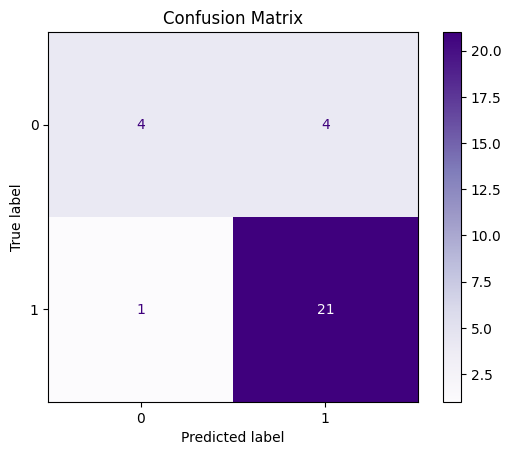

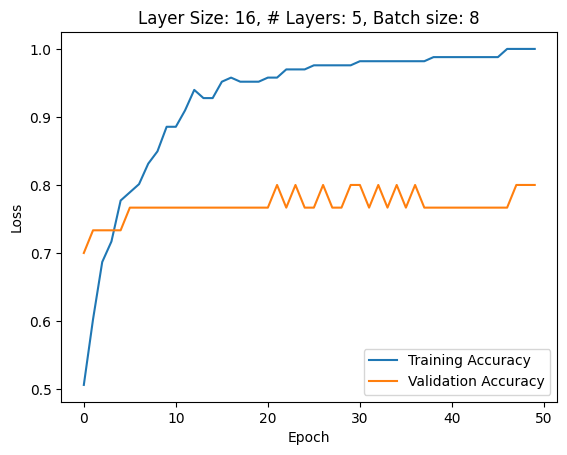

Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_500 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_500 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_501 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_501 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5870 - loss: 0.6589 - val_accuracy: 0.5667 - val_loss: 0.6197
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5318 - loss: 0.6611 - val_accuracy: 0.5667 - val_loss: 0.5990
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6161 - loss: 0.6106 - val_accuracy: 0.5667 - val_loss: 0.5832
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6565 - loss: 0.5473 - val_accuracy: 0.6333 - val_loss: 0.5676
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6196 - loss: 0.5962 - val_accuracy: 0.6667 - val_loss: 0.5548
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7163 - loss: 0.5460 - val_accuracy: 0.6333 - val_loss: 0.5428
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7838 - loss: 0.5098 - val_accuracy: 0.6333 - val_loss: 0.5338
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7444 - loss: 0.5330 - val_accuracy: 0.6333 - val_loss

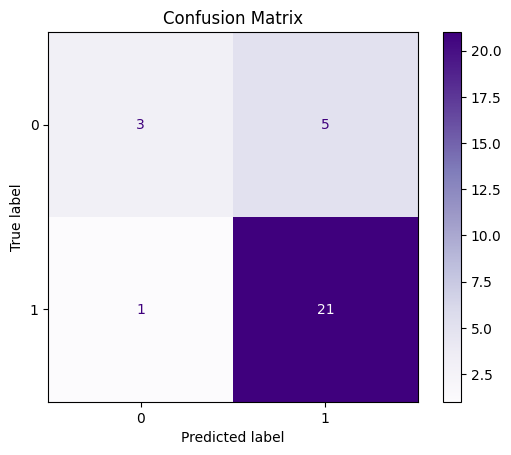

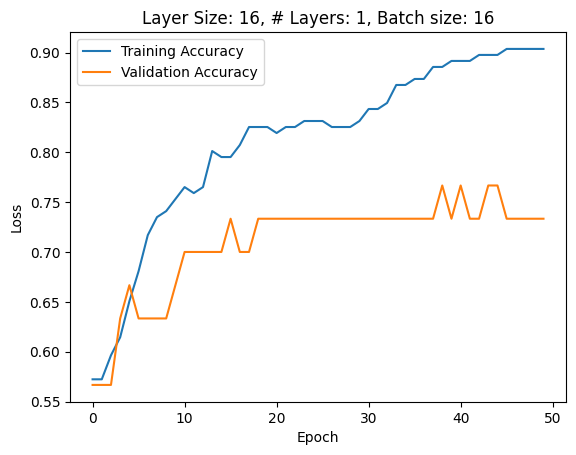

Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_502 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_502 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_503 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_503 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_504 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_504 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.4959 - loss: 0.7701 - val_accuracy: 0.7333 - val_loss: 0.6128
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5837 - loss: 0.7136 - val_accuracy: 0.7667 - val_loss: 0.5861
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6366 - loss: 0.6583 - val_accuracy: 0.8000 - val_loss: 0.5543
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6112 - loss: 0.6359 - val_accuracy: 0.8333 - val_loss: 0.5332
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6834 - loss: 0.6029 - val_accuracy: 0.8333 - val_loss: 0.5119
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7176 - loss: 0.5877 - val_accuracy: 0.8667 - val_loss: 0.4901
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7059 - loss: 0.6024 - val_accuracy: 0.8667 - val_loss: 0.4693
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7859 - loss: 0.5479 - val_accuracy: 0.9000 - val_loss

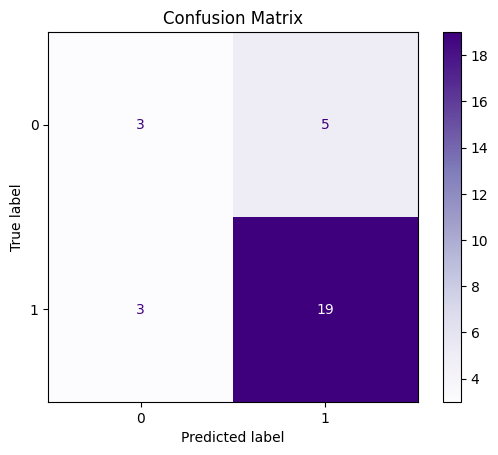

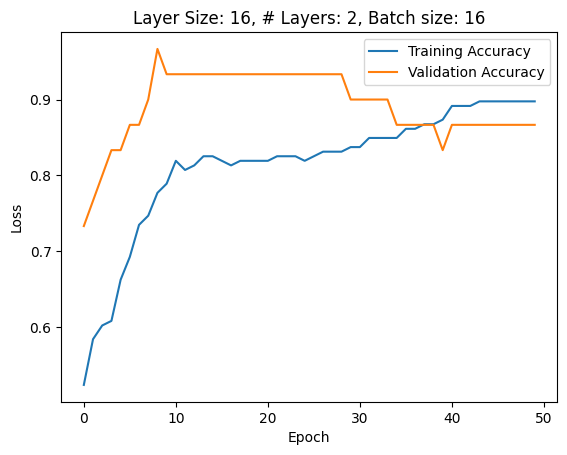

Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_505 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_505 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_506 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_506 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_507 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_507 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_508 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_508 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 817 (3.19 KB)

 Trainable params: 817 (3.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.5392 - loss: 0.6959 - val_accuracy: 0.7333 - val_loss: 0.6443
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6372 - loss: 0.6671 - val_accuracy: 0.7667 - val_loss: 0.6241
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6927 - loss: 0.6549 - val_accuracy: 0.7667 - val_loss: 0.6016
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6372 - loss: 0.6424 - val_accuracy: 0.7667 - val_loss: 0.5741
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6347 - loss: 0.6390 - val_accuracy: 0.7667 - val_loss: 0.5516
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7162 - loss: 0.5926 - val_accuracy: 0.7667 - val_loss: 0.5380
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7390 - loss: 0.5924 - val_accuracy: 0.7000 - val_loss: 0.5204
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7669 - loss: 0.5688 - val_accuracy: 0.7667 - val_los

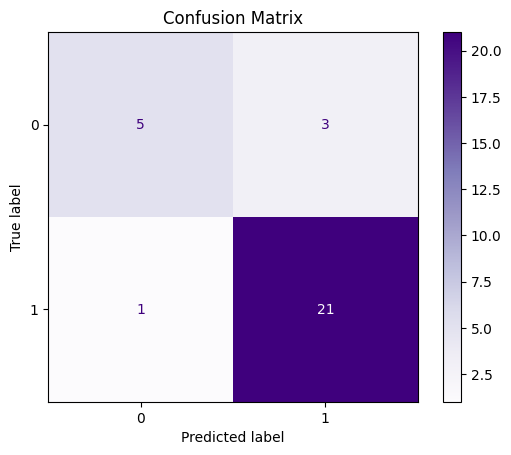

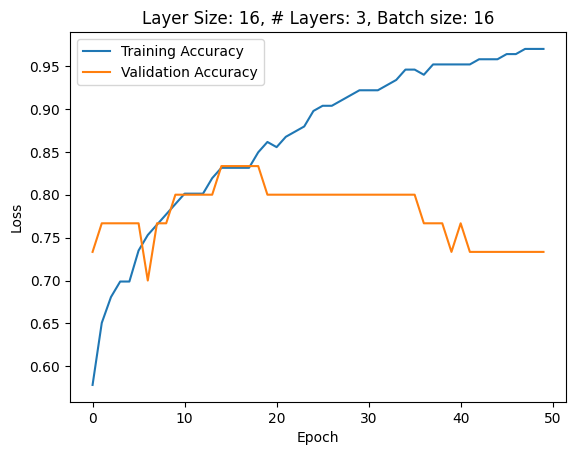

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_509 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_509 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_510 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_510 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_511 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_511 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_512 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_512 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_513 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_513 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5724 - loss: 0.7177 - val_accuracy: 0.5667 - val_loss: 0.6778
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6271 - loss: 0.6754 - val_accuracy: 0.6333 - val_loss: 0.6568
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6595 - loss: 0.6493 - val_accuracy: 0.7000 - val_loss: 0.6458
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7221 - loss: 0.6411 - val_accuracy: 0.7333 - val_loss: 0.6319
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6871 - loss: 0.6307 - val_accuracy: 0.7333 - val_loss: 0.6164
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6991 - loss: 0.6161 - val_accuracy: 0.6667 - val_loss: 0.6035
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7277 - loss: 0.5888 - val_accuracy: 0.7000 - val_loss: 0.5831
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7246 - loss: 0.5732 - val_accuracy: 0.7333 - val

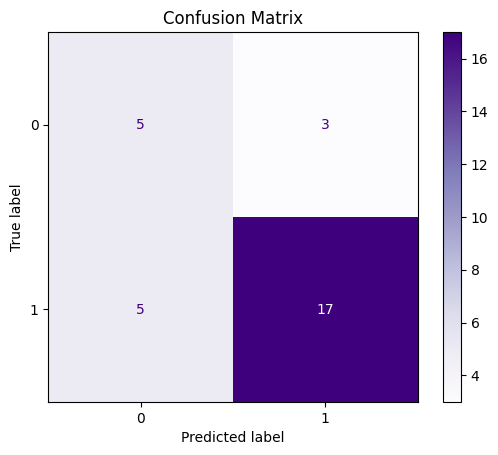

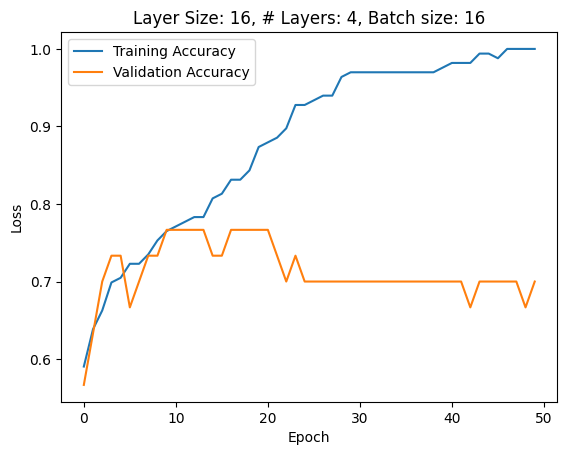

Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_514 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_514 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_515 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_515 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_516 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_516 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_517 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_517 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_518 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_518 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_519 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_519 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5568 - loss: 0.6829 - val_accuracy: 0.5667 - val_loss: 0.6641
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6316 - loss: 0.6768 - val_accuracy: 0.6000 - val_loss: 0.6434
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6820 - loss: 0.6383 - val_accuracy: 0.6667 - val_loss: 0.6086
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7133 - loss: 0.6254 - val_accuracy: 0.6667 - val_loss: 0.5758
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7295 - loss: 0.5996 - val_accuracy: 0.7000 - val_loss: 0.5366
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7277 - loss: 0.5699 - val_accuracy: 0.7333 - val_loss: 0.5005
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7771 - loss: 0.4951 - val_accuracy: 0.7667 - val_loss: 0.4725
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7987 - loss: 0.4539 - val_accuracy: 0.7667 - val_los

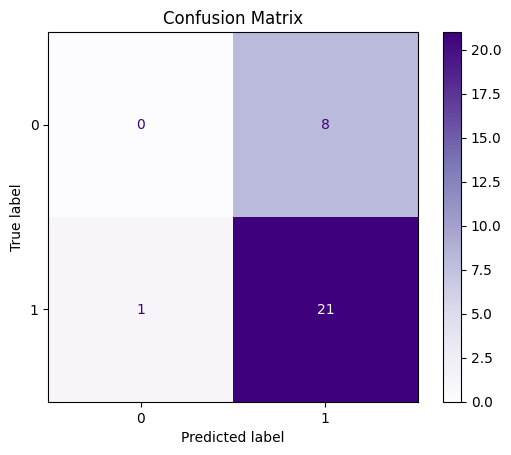

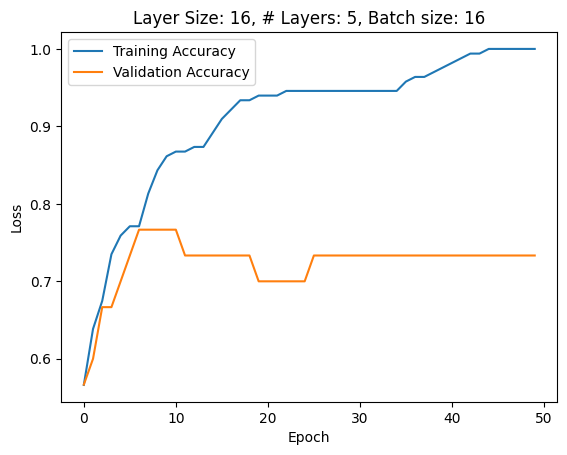

Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_520 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_520 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_521 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_521 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.5651 - loss: 0.7834 - val_accuracy: 0.3333 - val_loss: 0.8841
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5928 - loss: 0.7622 - val_accuracy: 0.3667 - val_loss: 0.8495
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6045 - loss: 0.7020 - val_accuracy: 0.3667 - val_loss: 0.8183
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6033 - loss: 0.7001 - val_accuracy: 0.3667 - val_loss: 0.7887
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6258 - loss: 0.6859 - val_accuracy: 0.4000 - val_loss: 0.7610
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6800 - loss: 0.6664 - val_accuracy: 0.4333 - val_loss: 0.7373
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7122 - loss: 0.6322 - val_accuracy: 0.4667 - val_loss: 0.7163
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6938 - loss: 0.6046 - val_accuracy: 0.4667 - val_loss: 0.6993
Epoc

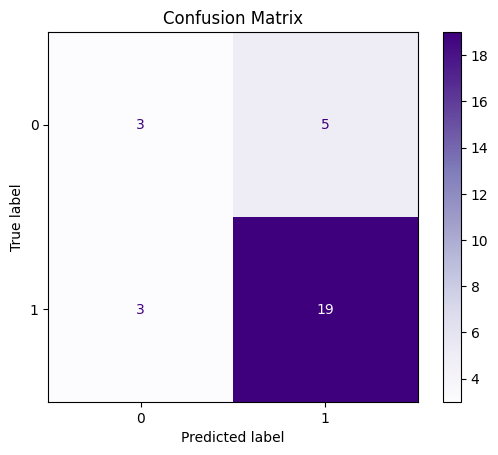

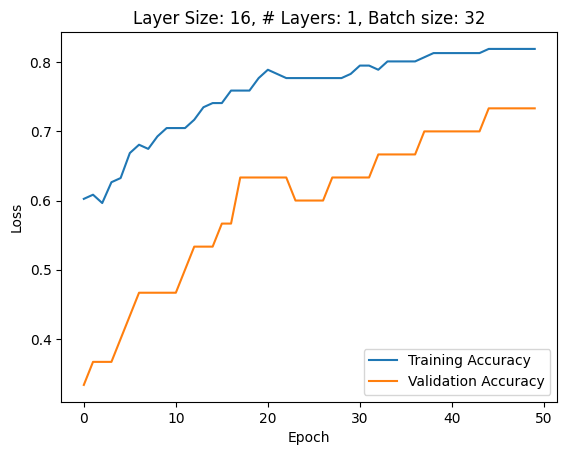

Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_522 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_522 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_523 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_523 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_524 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_524 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.5060 - loss: 0.7427 - val_accuracy: 0.3333 - val_loss: 0.7628
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4944 - loss: 0.7157 - val_accuracy: 0.3667 - val_loss: 0.7449
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5052 - loss: 0.7069 - val_accuracy: 0.4333 - val_loss: 0.7277
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5266 - loss: 0.7050 - val_accuracy: 0.4333 - val_loss: 0.7101
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5570 - loss: 0.6913 - val_accuracy: 0.4667 - val_loss: 0.6928
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6366 - loss: 0.6535 - val_accuracy: 0.4667 - val_loss: 0.6807
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5724 - loss: 0.6726 - val_accuracy: 0.5333 - val_loss: 0.6656
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6519 - loss: 0.6448 - val_accuracy: 0.6333 - val_loss: 0.6537
Epoc

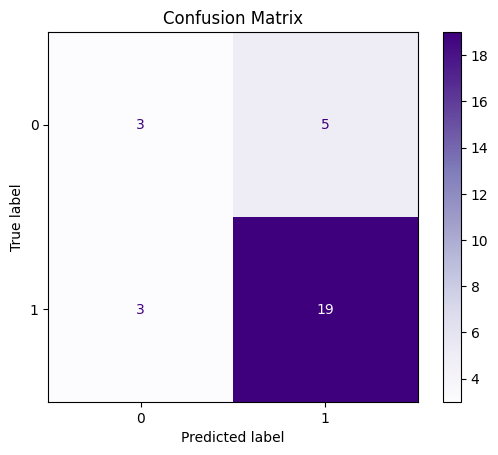

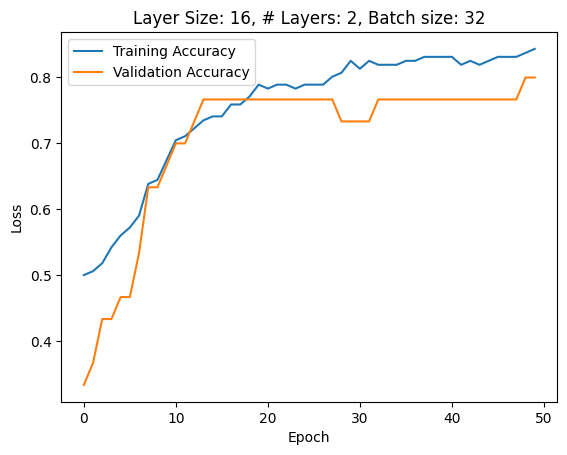

Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_525 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_525 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_526 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_526 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_527 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_527 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_528 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_528 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 817 (3.19 KB)

 Trainable params: 817 (3.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.4661 - loss: 0.6722 - val_accuracy: 0.7333 - val_loss: 0.5730
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5251 - loss: 0.6460 - val_accuracy: 0.7667 - val_loss: 0.5535
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5881 - loss: 0.6095 - val_accuracy: 0.7667 - val_loss: 0.5382
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6385 - loss: 0.5950 - val_accuracy: 0.7333 - val_loss: 0.5234
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6899 - loss: 0.5846 - val_accuracy: 0.7333 - val_loss: 0.5083
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6957 - loss: 0.5622 - val_accuracy: 0.7333 - val_loss: 0.4946
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7298 - loss: 0.5471 - val_accuracy: 0.7333 - val_loss: 0.4816
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7602 - loss: 0.5422 - val_accuracy: 0.7000 - val_loss: 0.4685
Ep

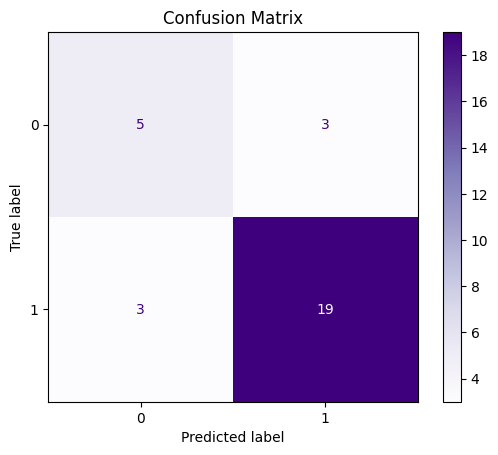

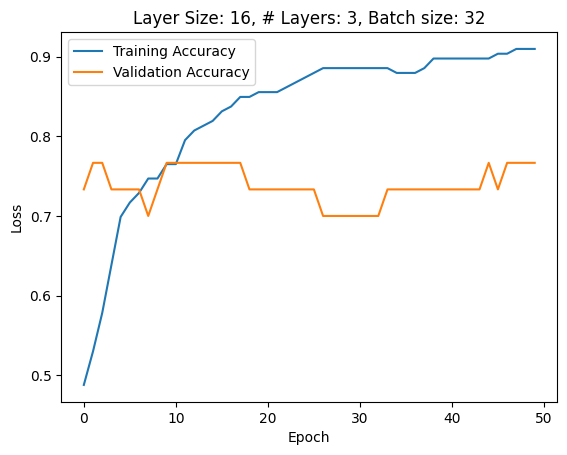

Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_529 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_529 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_530 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_530 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_531 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_531 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_532 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_532 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_533 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_533 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.4556 - loss: 0.7036 - val_accuracy: 0.6667 - val_loss: 0.6789
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4874 - loss: 0.6868 - val_accuracy: 0.6333 - val_loss: 0.6713
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5545 - loss: 0.6736 - val_accuracy: 0.6333 - val_loss: 0.6643
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5487 - loss: 0.6686 - val_accuracy: 0.7000 - val_loss: 0.6586
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5867 - loss: 0.6617 - val_accuracy: 0.7333 - val_loss: 0.6526
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6553 - loss: 0.6535 - val_accuracy: 0.7000 - val_loss: 0.6464
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7102 - loss: 0.6443 - val_accuracy: 0.7333 - val_loss: 0.6413
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7572 - loss: 0.6323 - val_accuracy: 0.7333 - val_loss: 0.6325
Epoc

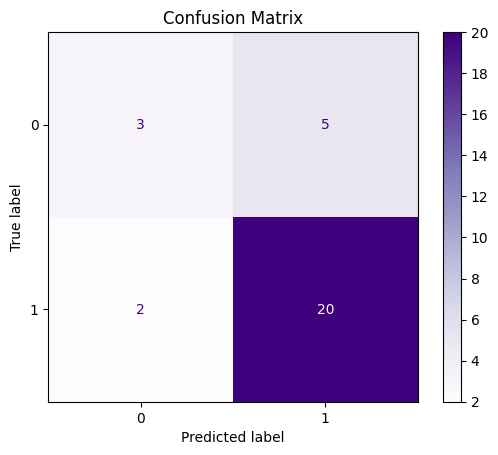

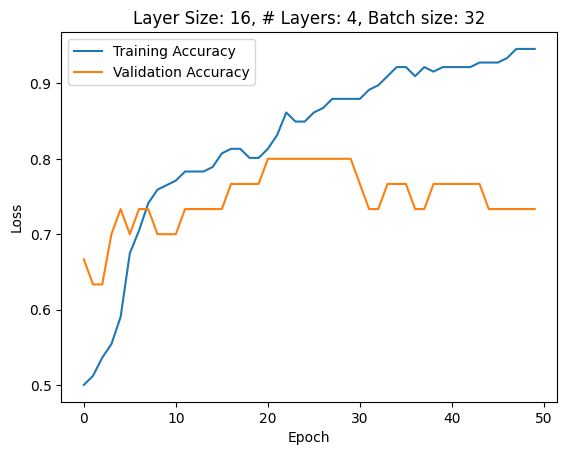

Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_534 (Dense)                    │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_534 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_535 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_535 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_536 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_536 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_537 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_537 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_538 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_538 (Activation)          │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_539 (Dense)                    │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_539 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.5164 - loss: 0.6969 - val_accuracy: 0.7333 - val_loss: 0.6569
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5740 - loss: 0.6801 - val_accuracy: 0.7333 - val_loss: 0.6437
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5995 - loss: 0.6754 - val_accuracy: 0.7333 - val_loss: 0.6263
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6195 - loss: 0.6570 - val_accuracy: 0.7333 - val_loss: 0.6071
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6482 - loss: 0.6499 - val_accuracy: 0.7667 - val_loss: 0.5893
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7207 - loss: 0.6440 - val_accuracy: 0.7667 - val_loss: 0.5678
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7028 - loss: 0.6216 - val_accuracy: 0.7333 - val_loss: 0.5424
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7506 - loss: 0.6063 - val_accuracy: 0.7333 - val_loss: 0.5142
Epoch

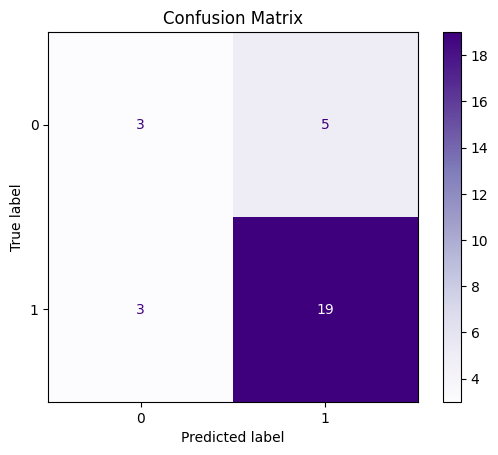

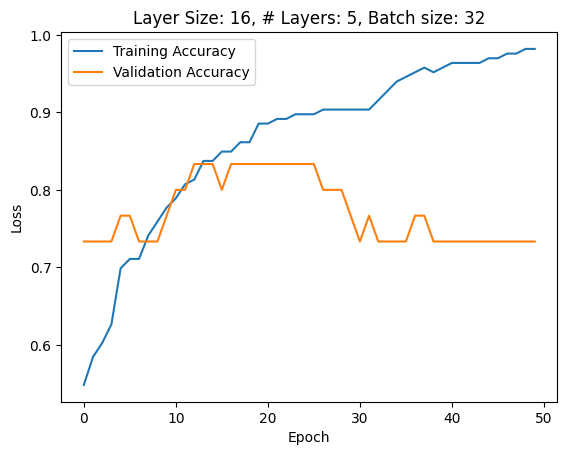

Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_540 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_540 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_541 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_541 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5125 - loss: 0.7254 - val_accuracy: 0.7667 - val_loss: 0.6039
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6806 - loss: 0.6506 - val_accuracy: 0.8333 - val_loss: 0.5543
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7077 - loss: 0.5992 - val_accuracy: 0.8333 - val_loss: 0.5147
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7373 - loss: 0.5734 - val_accuracy: 0.8333 - val_loss: 0.4948
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8040 - loss: 0.5185 - val_accuracy: 0.8000 - val_loss: 0.4767
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8230 - loss: 0.5193 - val_accuracy: 0.8333 - val_loss: 0.4651
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7987 - loss: 0.5247 - val_accuracy: 0.8667 - val_loss: 0.4587
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7883 - loss: 0.5180 - val_accuracy: 0.8667 - val_loss

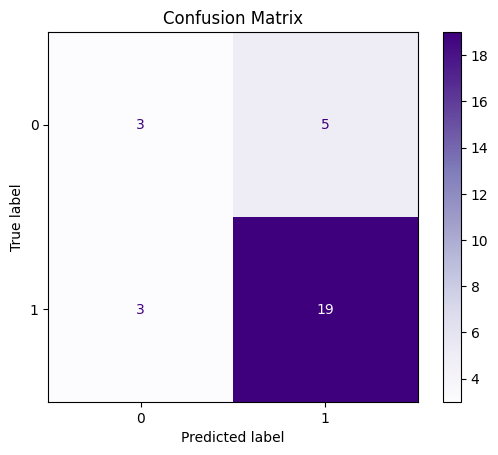

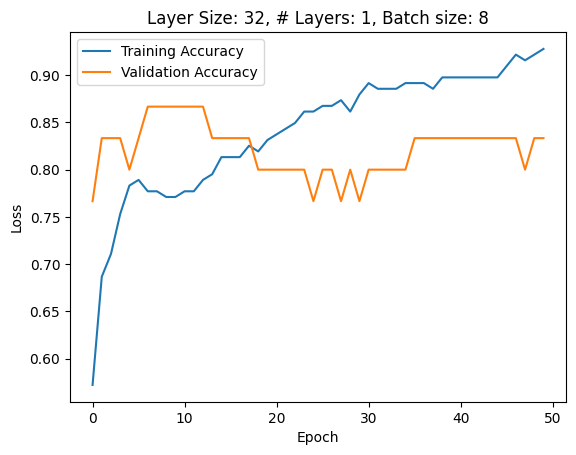

Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_542 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_542 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_543 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_543 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_544 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_544 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4799 - loss: 0.7455 - val_accuracy: 0.7333 - val_loss: 0.5470
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6031 - loss: 0.5873 - val_accuracy: 0.8333 - val_loss: 0.5195
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8530 - loss: 0.5454 - val_accuracy: 0.8667 - val_loss: 0.4805
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8525 - loss: 0.4887 - val_accuracy: 0.8667 - val_loss: 0.4527
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8410 - loss: 0.4739 - val_accuracy: 0.8667 - val_loss: 0.4167
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7915 - loss: 0.4651 - val_accuracy: 0.9000 - val_loss: 0.3965
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8633 - loss: 0.4367 - val_accuracy: 0.9000 - val_loss: 0.3756
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8337 - loss: 0.3994 - val_accuracy: 0.9000 - val_loss

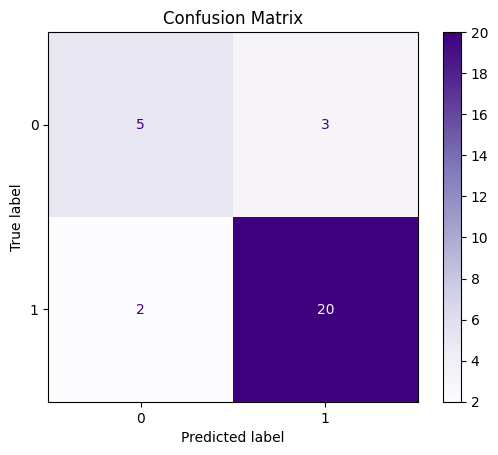

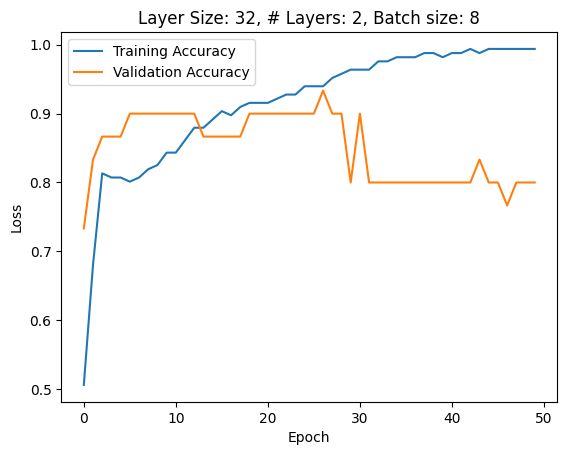

Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_545 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_545 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_546 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_546 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_547 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_547 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_548 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_548 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,657 (10.38 KB)

 Trainable params: 2,657 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6548 - loss: 0.6856 - val_accuracy: 0.8333 - val_loss: 0.5776
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7132 - loss: 0.6435 - val_accuracy: 0.8667 - val_loss: 0.5274
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.5998 - val_accuracy: 0.8667 - val_loss: 0.4815
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8538 - loss: 0.5672 - val_accuracy: 0.9000 - val_loss: 0.4207
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8173 - loss: 0.5128 - val_accuracy: 0.9333 - val_loss: 0.3790
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.4780 - val_accuracy: 0.8667 - val_loss: 0.3506
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.4681 - val_accuracy: 0.9000 - val_loss: 0.3188
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.4006 - val_accuracy: 0.9000 - val_loss

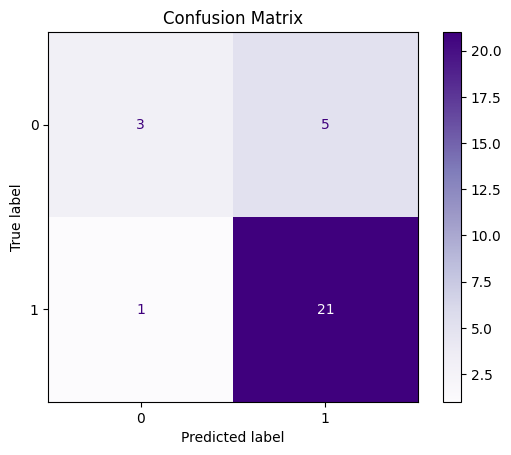

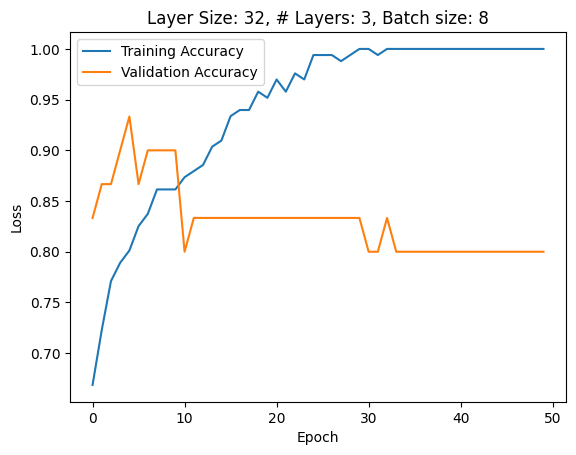

Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_549 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_549 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_550 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_550 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_551 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_551 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_552 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_552 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_553 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_553 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5344 - loss: 0.6943 - val_accuracy: 0.6000 - val_loss: 0.6552
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7707 - loss: 0.6453 - val_accuracy: 0.8000 - val_loss: 0.5912
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7559 - loss: 0.6160 - val_accuracy: 0.8333 - val_loss: 0.5369
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7642 - loss: 0.5857 - val_accuracy: 0.8333 - val_loss: 0.4987
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7877 - loss: 0.5136 - val_accuracy: 0.8333 - val_loss: 0.4579
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8266 - loss: 0.4712 - val_accuracy: 0.8333 - val_loss: 0.4537
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7926 - loss: 0.4847 - val_accuracy: 0.8000 - val_loss: 0.4424
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8480 - loss: 0.3960 - val_accuracy: 0.8000 - val_loss

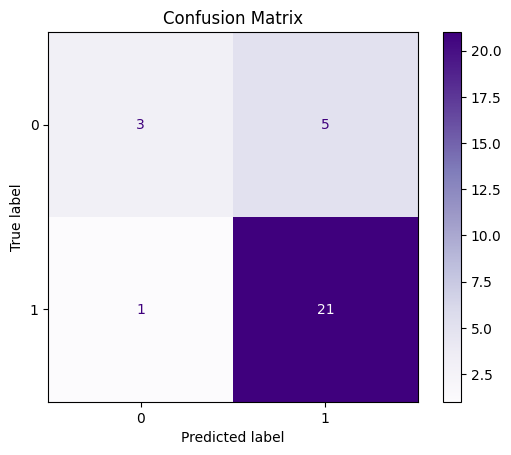

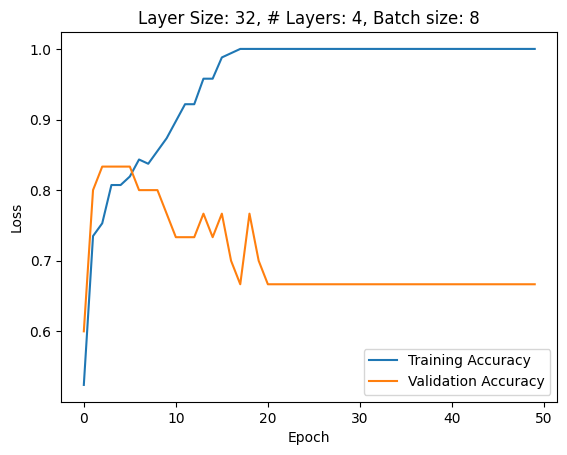

Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_554 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_554 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_555 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_555 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_556 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_556 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_557 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_557 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_558 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_558 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_559 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_559 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,769 (18.63 KB)

 Trainable params: 4,769 (18.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5429 - loss: 0.6874 - val_accuracy: 0.6667 - val_loss: 0.6589
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6929 - loss: 0.6336 - val_accuracy: 0.7000 - val_loss: 0.5780
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7827 - loss: 0.5839 - val_accuracy: 0.7000 - val_loss: 0.4916
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8487 - loss: 0.4801 - val_accuracy: 0.7000 - val_loss: 0.4281
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8240 - loss: 0.4022 - val_accuracy: 0.7667 - val_loss: 0.4371
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8519 - loss: 0.3667 - val_accuracy: 0.7000 - val_loss: 0.4912
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8969 - loss: 0.3006 - val_accuracy: 0.7333 - val_loss: 0.5332
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9286 - loss: 0.2273 - val_accuracy: 0.7000 - val_loss

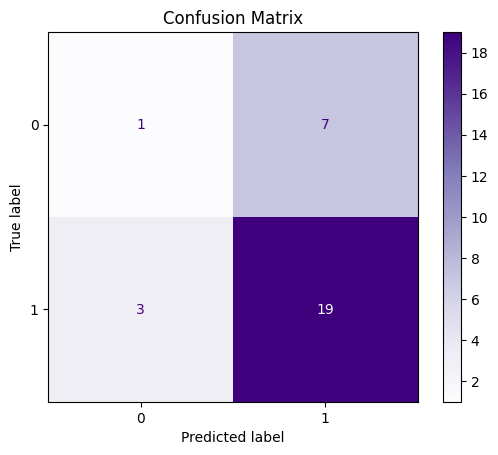

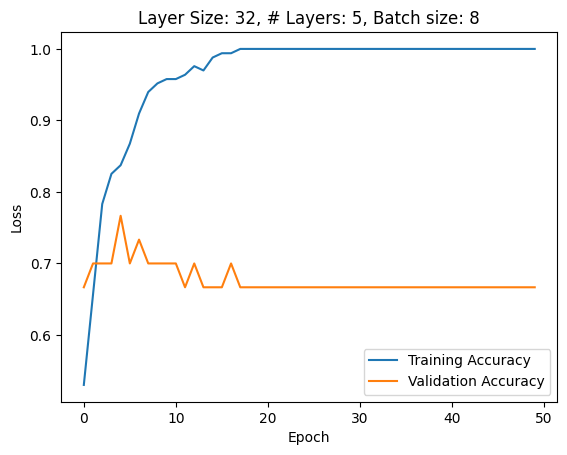

Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_560 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_560 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_561 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_561 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4534 - loss: 0.7478 - val_accuracy: 0.5667 - val_loss: 0.8248
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4874 - loss: 0.6947 - val_accuracy: 0.6000 - val_loss: 0.7729
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5786 - loss: 0.6502 - val_accuracy: 0.6667 - val_loss: 0.7253
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6242 - loss: 0.6321 - val_accuracy: 0.6667 - val_loss: 0.6874
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6791 - loss: 0.6046 - val_accuracy: 0.7333 - val_loss: 0.6596
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7282 - loss: 0.5931 - val_accuracy: 0.7333 - val_loss: 0.6295
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7789 - loss: 0.5478 - val_accuracy: 0.7667 - val_loss: 0.6130
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7543 - loss: 0.5732 - val_accuracy: 0.8000 - val_loss

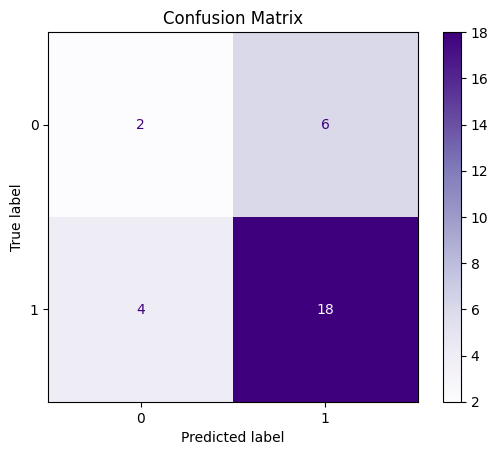

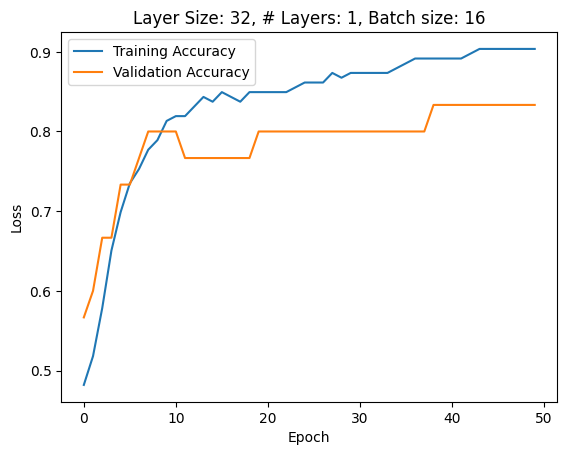

Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_562 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_562 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_563 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_563 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_564 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_564 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.4795 - loss: 0.7232 - val_accuracy: 0.5000 - val_loss: 0.6644
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5651 - loss: 0.6729 - val_accuracy: 0.7333 - val_loss: 0.6150
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7151 - loss: 0.6264 - val_accuracy: 0.8000 - val_loss: 0.5699
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7647 - loss: 0.5856 - val_accuracy: 0.8333 - val_loss: 0.5300
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8146 - loss: 0.5454 - val_accuracy: 0.8333 - val_loss: 0.5019
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8852 - loss: 0.5013 - val_accuracy: 0.8333 - val_loss: 0.4804
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8570 - loss: 0.5061 - val_accuracy: 0.8333 - val_loss: 0.4664
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8130 - loss: 0.5048 - val_accuracy: 0.8333 - val_los

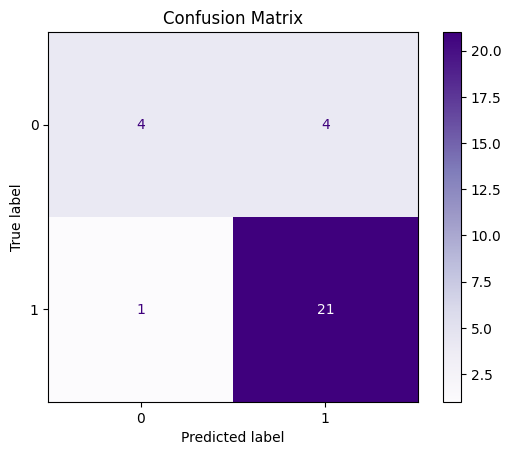

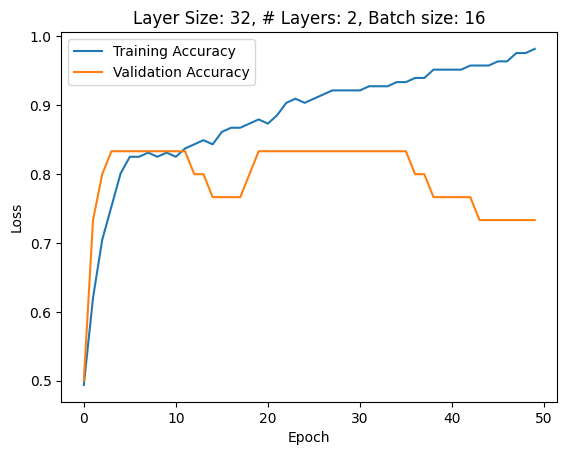

Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_565 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_565 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_566 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_566 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_567 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_567 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_568 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_568 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,657 (10.38 KB)

 Trainable params: 2,657 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.4490 - loss: 0.7053 - val_accuracy: 0.7333 - val_loss: 0.6262
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6051 - loss: 0.6618 - val_accuracy: 0.7667 - val_loss: 0.5896
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7652 - loss: 0.6138 - val_accuracy: 0.7667 - val_loss: 0.5573
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8181 - loss: 0.5869 - val_accuracy: 0.8000 - val_loss: 0.5203
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8086 - loss: 0.5711 - val_accuracy: 0.7667 - val_loss: 0.4842
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7942 - loss: 0.5346 - val_accuracy: 0.7667 - val_loss: 0.4489
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8163 - loss: 0.4950 - val_accuracy: 0.7667 - val_loss: 0.4224
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8528 - loss: 0.4533 - val_accuracy: 0.7667 - val_lo

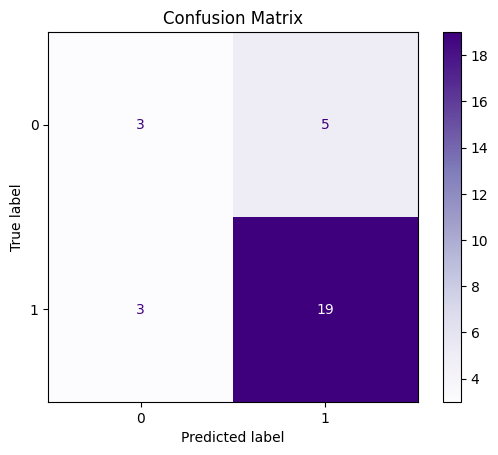

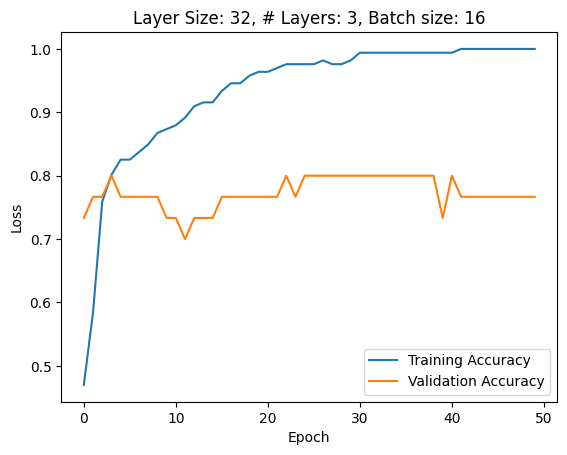

Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_569 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_569 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_570 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_570 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_571 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_571 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_572 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_572 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_573 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_573 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.4104 - loss: 0.6975 - val_accuracy: 0.4000 - val_loss: 0.7003
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5963 - loss: 0.6743 - val_accuracy: 0.5000 - val_loss: 0.6798
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6517 - loss: 0.6497 - val_accuracy: 0.7333 - val_loss: 0.6514
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7168 - loss: 0.6372 - val_accuracy: 0.7333 - val_loss: 0.6183
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.6090 - val_accuracy: 0.7667 - val_loss: 0.5728
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7693 - loss: 0.5834 - val_accuracy: 0.8000 - val_loss: 0.5253
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8197 - loss: 0.5206 - val_accuracy: 0.8000 - val_loss: 0.4821
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8272 - loss: 0.4887 - val_accuracy: 0.8333 - val_los

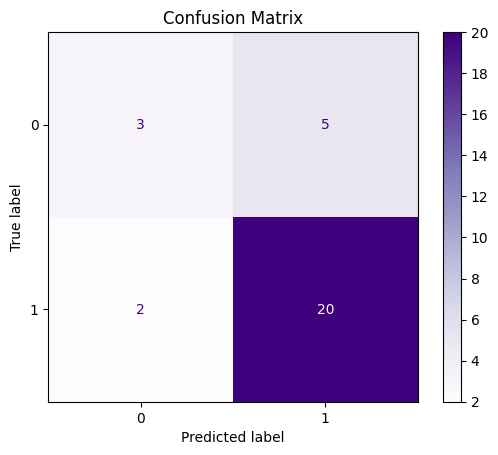

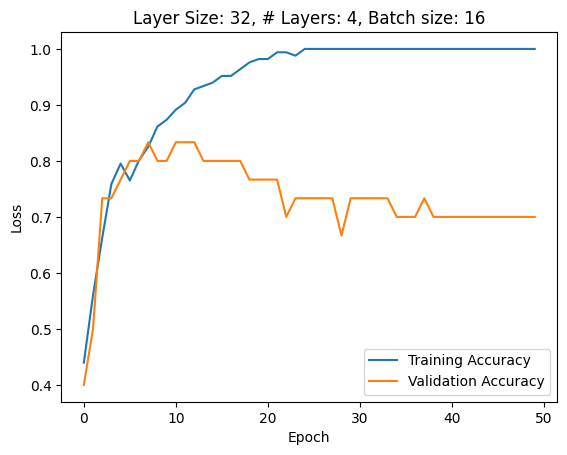

Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_574 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_574 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_575 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_575 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_576 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_576 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_577 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_577 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_578 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_578 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_579 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_579 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,769 (18.63 KB)

 Trainable params: 4,769 (18.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.5148 - loss: 0.6940 - val_accuracy: 0.7333 - val_loss: 0.6493
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6778 - loss: 0.6677 - val_accuracy: 0.8333 - val_loss: 0.6272
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7446 - loss: 0.6312 - val_accuracy: 0.8333 - val_loss: 0.5828
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.6001 - val_accuracy: 0.8667 - val_loss: 0.5198
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7831 - loss: 0.5486 - val_accuracy: 0.8333 - val_loss: 0.4520
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8310 - loss: 0.4735 - val_accuracy: 0.8333 - val_loss: 0.3975
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8154 - loss: 0.4419 - val_accuracy: 0.8333 - val_loss: 0.3822
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8415 - loss: 0.3821 - val_accuracy: 0.8333 - val_lo

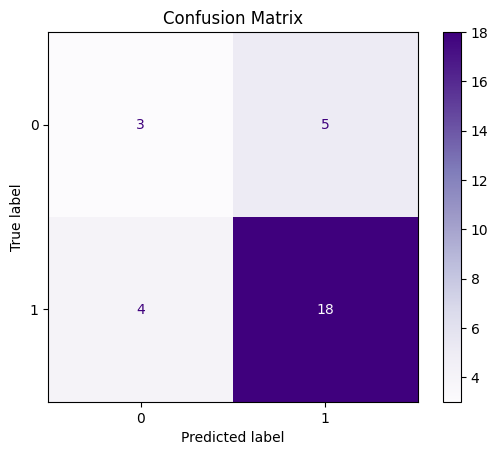

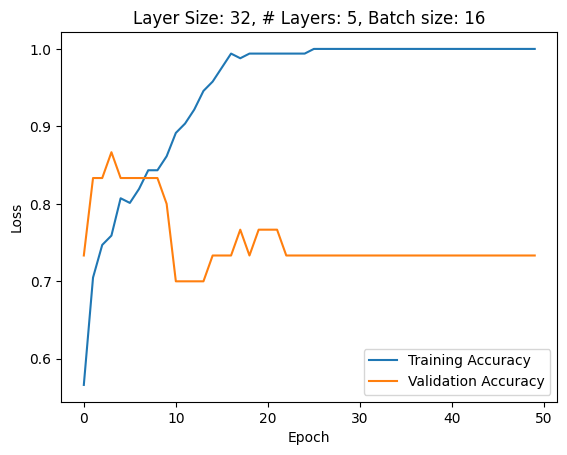

Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_580 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_580 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_581 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_581 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.4628 - loss: 0.8153 - val_accuracy: 0.6333 - val_loss: 0.6139
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5176 - loss: 0.7568 - val_accuracy: 0.7333 - val_loss: 0.5812
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5858 - loss: 0.7010 - val_accuracy: 0.7667 - val_loss: 0.5521
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5777 - loss: 0.6801 - val_accuracy: 0.7667 - val_loss: 0.5285
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5887 - loss: 0.6619 - val_accuracy: 0.8000 - val_loss: 0.5065
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6318 - loss: 0.6636 - val_accuracy: 0.8000 - val_loss: 0.4891
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6273 - loss: 0.6554 - val_accuracy: 0.8333 - val_loss: 0.4734
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6445 - loss: 0.6536 - val_accuracy: 0.8333 - val_loss: 0.4588

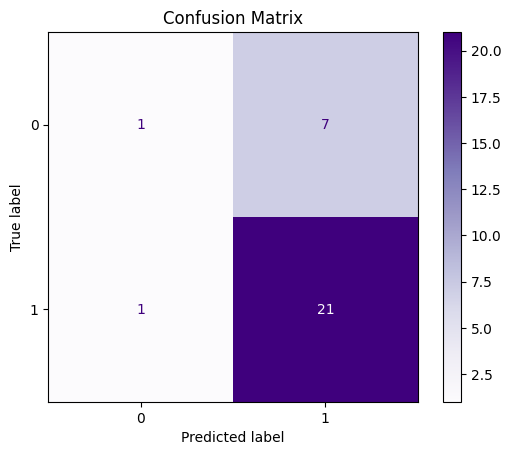

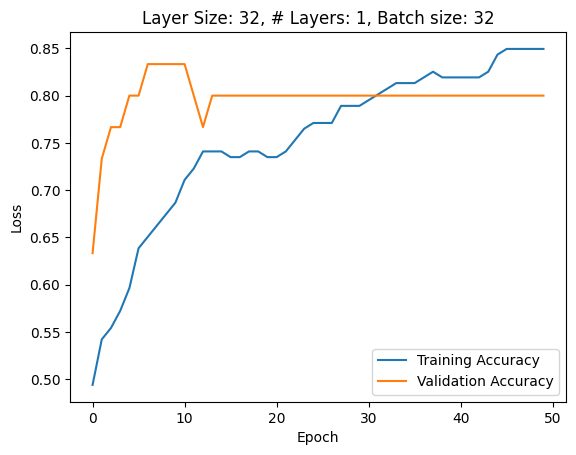

Model: "sequential_146"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_582 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_582 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_583 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_583 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_584 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_584 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.6145 - loss: 0.6569 - val_accuracy: 0.7333 - val_loss: 0.6098
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7030 - loss: 0.6297 - val_accuracy: 0.8000 - val_loss: 0.5908
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7409 - loss: 0.6046 - val_accuracy: 0.8000 - val_loss: 0.5760
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7528 - loss: 0.5914 - val_accuracy: 0.8333 - val_loss: 0.5567
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7387 - loss: 0.5807 - val_accuracy: 0.8333 - val_loss: 0.5366
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7484 - loss: 0.5580 - val_accuracy: 0.8333 - val_loss: 0.5190
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7716 - loss: 0.5313 - val_accuracy: 0.8333 - val_loss: 0.5048
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7408 - loss: 0.5357 - val_accuracy: 0.8333 - val_loss: 0.4931
Epo

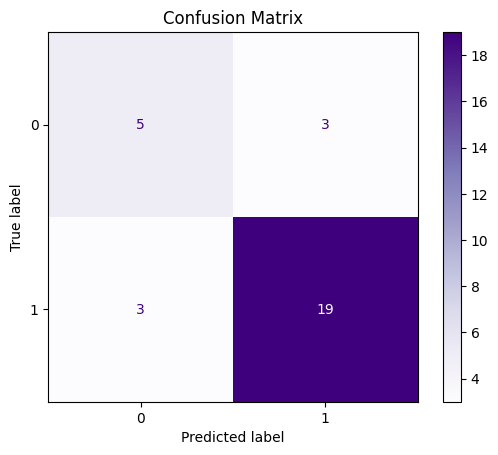

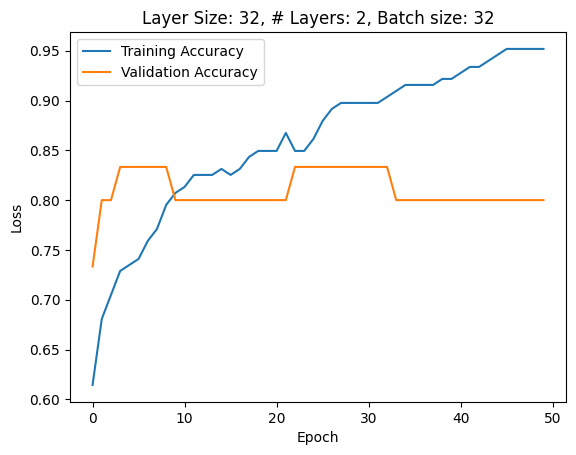

Model: "sequential_147"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_585 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_585 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_586 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_586 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_587 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_587 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_588 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_588 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,657 (10.38 KB)

 Trainable params: 2,657 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.6077 - loss: 0.6816 - val_accuracy: 0.7667 - val_loss: 0.6401
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7438 - loss: 0.6601 - val_accuracy: 0.7667 - val_loss: 0.6270
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7937 - loss: 0.6394 - val_accuracy: 0.7667 - val_loss: 0.6093
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7781 - loss: 0.6238 - val_accuracy: 0.7667 - val_loss: 0.5873
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7768 - loss: 0.6032 - val_accuracy: 0.7667 - val_loss: 0.5615
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7879 - loss: 0.5853 - val_accuracy: 0.8000 - val_loss: 0.5356
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7855 - loss: 0.5731 - val_accuracy: 0.8000 - val_loss: 0.5117
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8304 - loss: 0.5435 - val_accuracy: 0.8000 - val_loss: 0.4890
Epoc

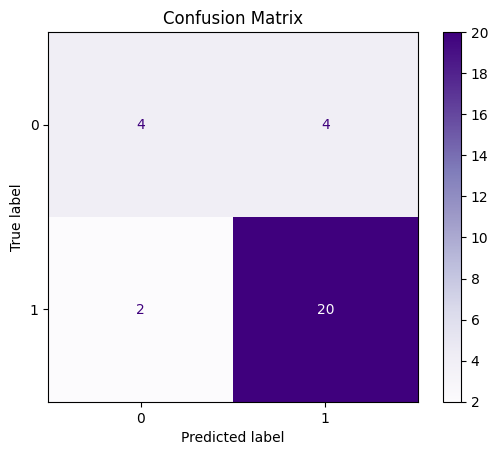

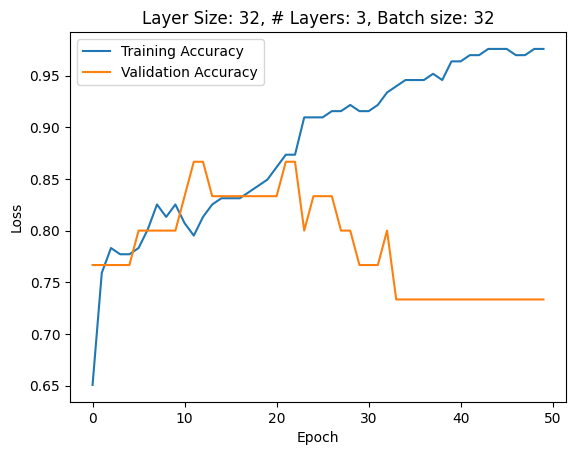

Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_589 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_589 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_590 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_590 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_591 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_591 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_592 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_592 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_593 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_593 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 0.5091 - loss: 0.6943 - val_accuracy: 0.7333 - val_loss: 0.6009
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5615 - loss: 0.6546 - val_accuracy: 0.8000 - val_loss: 0.5710
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6618 - loss: 0.6302 - val_accuracy: 0.8000 - val_loss: 0.5391
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7228 - loss: 0.5977 - val_accuracy: 0.7333 - val_loss: 0.5078
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7333 - loss: 0.5815 - val_accuracy: 0.8000 - val_loss: 0.4764
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7915 - loss: 0.5385 - val_accuracy: 0.8000 - val_loss: 0.4467
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7782 - loss: 0.5159 - val_accuracy: 0.8333 - val_loss: 0.4227
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8102 - loss: 0.4993 - val_accuracy: 0.8000 - val_loss: 0.4013
Epoch

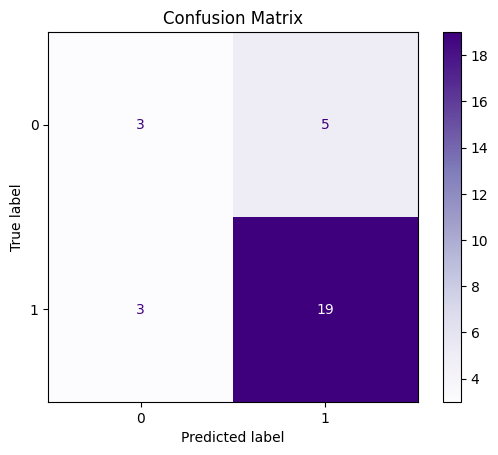

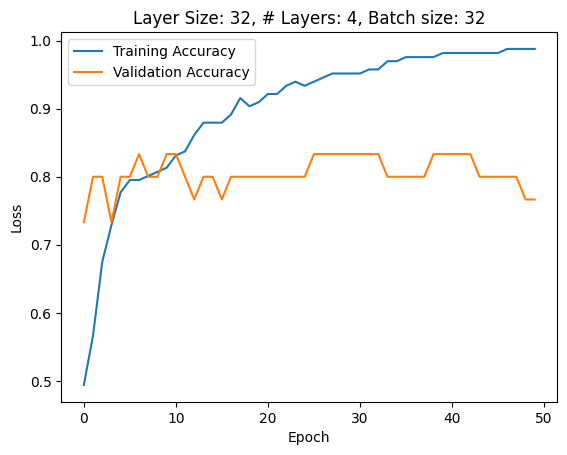

Model: "sequential_149"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_594 (Dense)                    │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_594 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_595 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_595 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_596 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_596 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_597 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_597 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_598 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_598 (Activation)          │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_599 (Dense)                    │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_599 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,769 (18.63 KB)

 Trainable params: 4,769 (18.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.4906 - loss: 0.7009 - val_accuracy: 0.4000 - val_loss: 0.6929
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6196 - loss: 0.6795 - val_accuracy: 0.6333 - val_loss: 0.6745
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7497 - loss: 0.6680 - val_accuracy: 0.8000 - val_loss: 0.6514
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7743 - loss: 0.6566 - val_accuracy: 0.8000 - val_loss: 0.6292
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7674 - loss: 0.6368 - val_accuracy: 0.8000 - val_loss: 0.5954
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7855 - loss: 0.6118 - val_accuracy: 0.8000 - val_loss: 0.5477
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7616 - loss: 0.5852 - val_accuracy: 0.8000 - val_loss: 0.5020
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7898 - loss: 0.5374 - val_accuracy: 0.8000 - val_loss: 0.4542

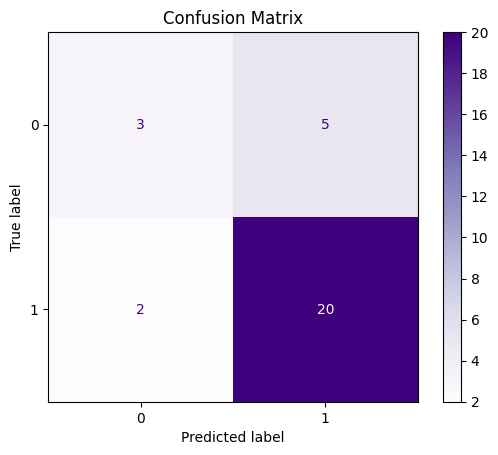

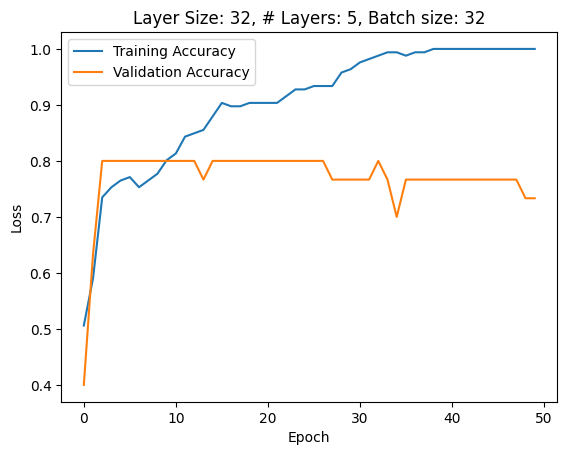

Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_600 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_600 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_601 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_601 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4980 - loss: 0.7534 - val_accuracy: 0.5667 - val_loss: 0.6451
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6032 - loss: 0.6919 - val_accuracy: 0.7000 - val_loss: 0.5664
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.6015 - val_accuracy: 0.8333 - val_loss: 0.5148
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.5484 - val_accuracy: 0.8333 - val_loss: 0.4958
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.5115 - val_accuracy: 0.8333 - val_loss: 0.4654
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8095 - loss: 0.5165 - val_accuracy: 0.8333 - val_loss: 0.4504
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.4873 - val_accuracy: 0.8333 - val_loss: 0.4424
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8565 - loss: 0.4436 - val_accuracy: 0.8333 - val_loss

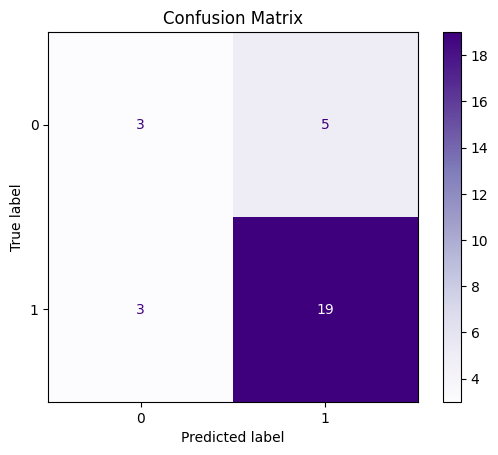

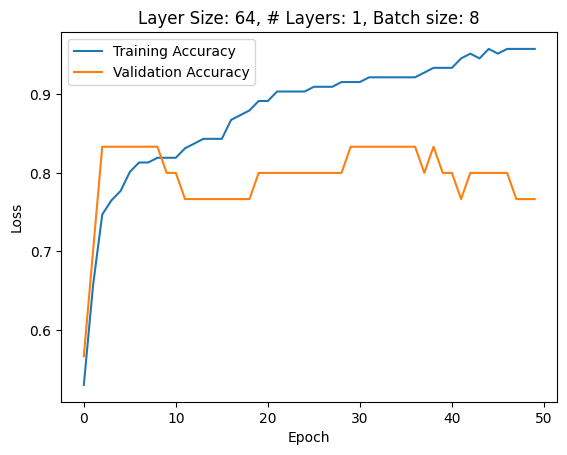

Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_602 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_602 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_603 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_603 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_604 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_604 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5738 - loss: 0.6793 - val_accuracy: 0.6667 - val_loss: 0.6270
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7281 - loss: 0.5904 - val_accuracy: 0.7667 - val_loss: 0.5738
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8035 - loss: 0.5293 - val_accuracy: 0.8333 - val_loss: 0.5326
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8549 - loss: 0.4638 - val_accuracy: 0.8000 - val_loss: 0.4933
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8799 - loss: 0.4226 - val_accuracy: 0.8000 - val_loss: 0.4776
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8516 - loss: 0.3921 - val_accuracy: 0.8000 - val_loss: 0.4622
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9024 - loss: 0.3426 - val_accuracy: 0.8000 - val_loss: 0.4592
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8842 - loss: 0.3304 - val_accuracy: 0.7667 - val_los

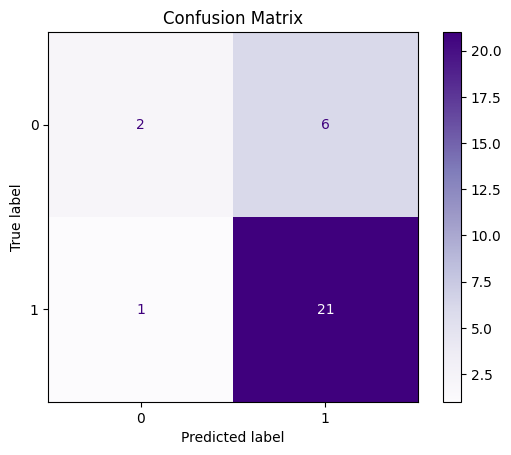

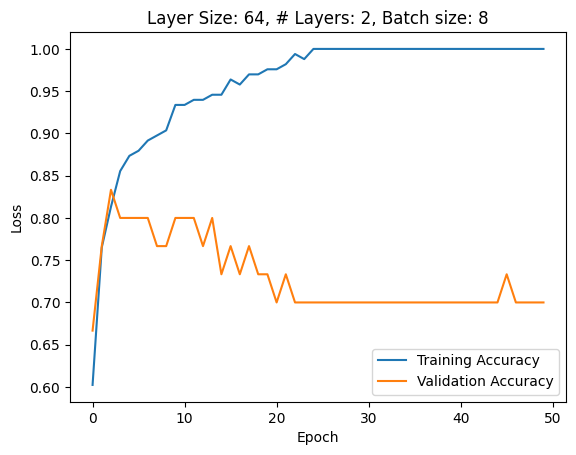

Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_605 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_605 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_606 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_606 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_607 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_607 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_608 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_608 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5986 - loss: 0.6711 - val_accuracy: 0.8667 - val_loss: 0.5043
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8290 - loss: 0.5472 - val_accuracy: 0.8667 - val_loss: 0.4104
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7949 - loss: 0.4690 - val_accuracy: 0.8000 - val_loss: 0.3701
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8816 - loss: 0.3871 - val_accuracy: 0.8000 - val_loss: 0.3511
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8781 - loss: 0.3272 - val_accuracy: 0.8000 - val_loss: 0.3774
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9106 - loss: 0.2872 - val_accuracy: 0.8000 - val_loss: 0.4233
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.2339 - val_accuracy: 0.8000 - val_loss: 0.4586
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9237 - loss: 0.2154 - val_accuracy: 0.8000 - val_loss

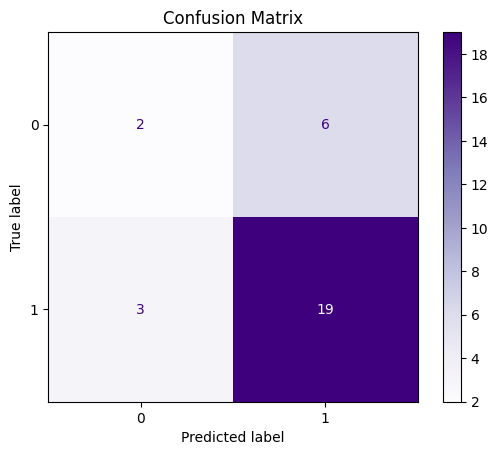

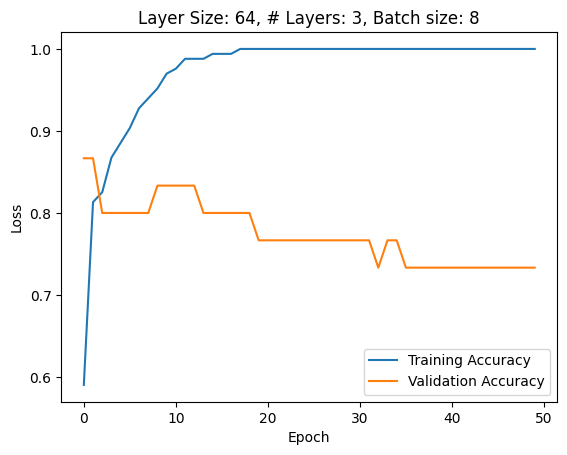

Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_609 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_609 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_610 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_610 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_611 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_611 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_612 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_612 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_613 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_613 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5552 - loss: 0.6878 - val_accuracy: 0.7667 - val_loss: 0.5849
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.5767 - val_accuracy: 0.8000 - val_loss: 0.4791
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.4556 - val_accuracy: 0.8333 - val_loss: 0.4221
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.3319 - val_accuracy: 0.8000 - val_loss: 0.4425
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8943 - loss: 0.2928 - val_accuracy: 0.8000 - val_loss: 0.4858
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9398 - loss: 0.1858 - val_accuracy: 0.8000 - val_loss: 0.5960
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9588 - loss: 0.1381 - val_accuracy: 0.8000 - val_loss: 0.6704
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9597 - loss: 0.1216 - val_accuracy: 0.7667 - val_los

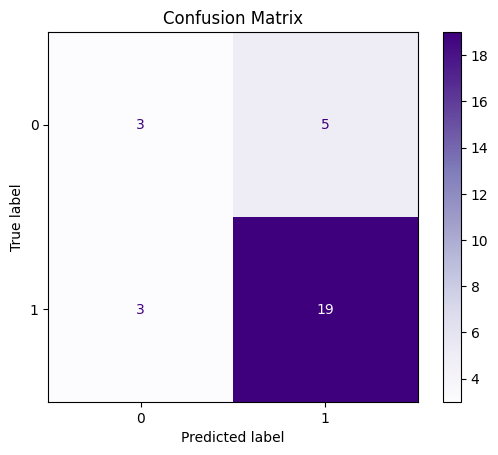

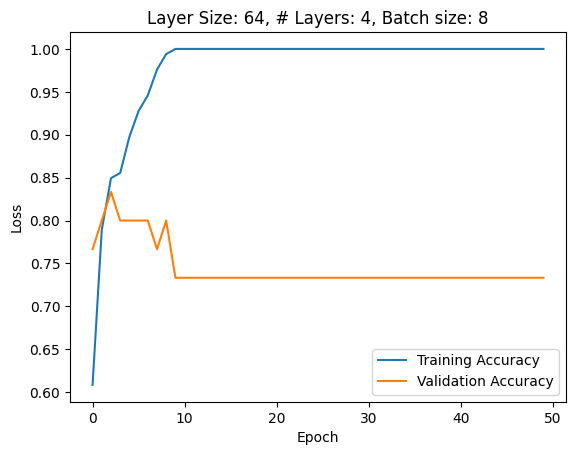

Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_614 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_614 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_615 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_615 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_616 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_616 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_617 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_617 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_618 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_618 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_619 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_619 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5142 - loss: 0.6809 - val_accuracy: 0.7667 - val_loss: 0.5328
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8172 - loss: 0.5424 - val_accuracy: 0.8667 - val_loss: 0.3618
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8295 - loss: 0.4404 - val_accuracy: 0.8000 - val_loss: 0.2851
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8960 - loss: 0.3231 - val_accuracy: 0.8000 - val_loss: 0.3166
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - loss: 0.2237 - val_accuracy: 0.7667 - val_loss: 0.4258
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9719 - loss: 0.1290 - val_accuracy: 0.8000 - val_loss: 0.4027
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.0997 - val_accuracy: 0.7000 - val_loss: 0.8124
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0373 - val_accuracy: 0.7000 - val_loss

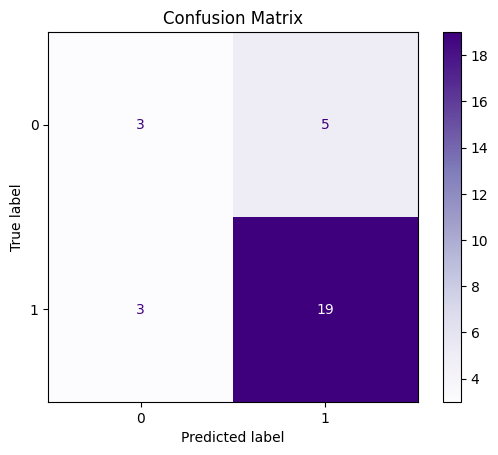

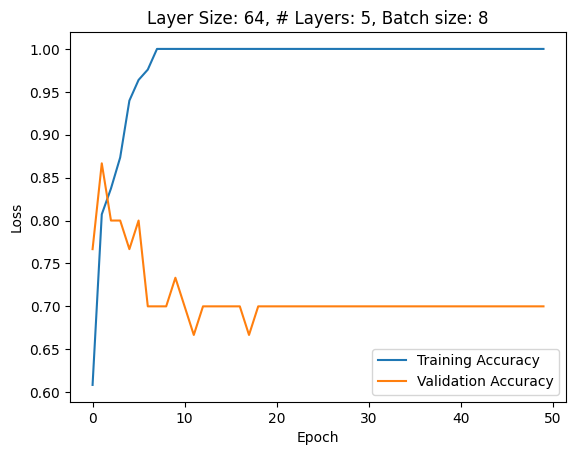

Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_620 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_620 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_621 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_621 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.5257 - loss: 0.7230 - val_accuracy: 0.6333 - val_loss: 0.6593
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5369 - loss: 0.6846 - val_accuracy: 0.6333 - val_loss: 0.6115
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6132 - loss: 0.6336 - val_accuracy: 0.7333 - val_loss: 0.5717
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7450 - loss: 0.5858 - val_accuracy: 0.7333 - val_loss: 0.5469
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7829 - loss: 0.5632 - val_accuracy: 0.7333 - val_loss: 0.5273
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8249 - loss: 0.5468 - val_accuracy: 0.7667 - val_loss: 0.5115
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7700 - loss: 0.5572 - val_accuracy: 0.8000 - val_loss: 0.4924
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7623 - loss: 0.5414 - val_accuracy: 0.8000 - val_los

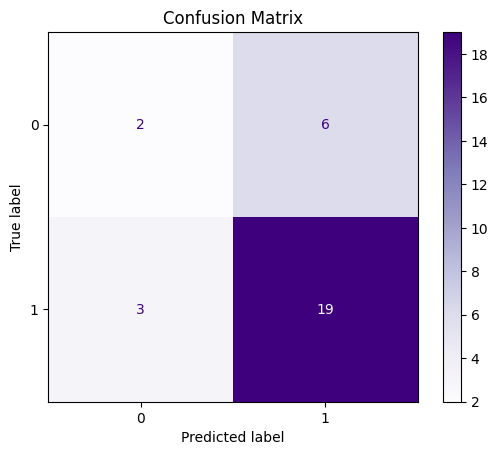

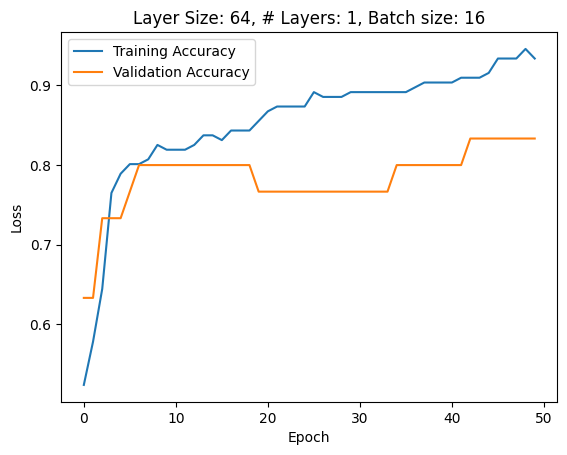

Model: "sequential_156"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_622 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_622 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_623 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_623 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_624 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_624 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.6032 - loss: 0.6775 - val_accuracy: 0.7333 - val_loss: 0.5985
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7168 - loss: 0.6063 - val_accuracy: 0.8000 - val_loss: 0.5273
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7954 - loss: 0.5683 - val_accuracy: 0.7667 - val_loss: 0.4918
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8124 - loss: 0.5246 - val_accuracy: 0.7667 - val_loss: 0.4801
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7817 - loss: 0.5238 - val_accuracy: 0.7333 - val_loss: 0.4724
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8155 - loss: 0.4554 - val_accuracy: 0.7333 - val_loss: 0.4507
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8140 - loss: 0.4335 - val_accuracy: 0.8000 - val_loss: 0.4390
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8365 - loss: 0.4161 - val_accuracy: 0.7667 - va

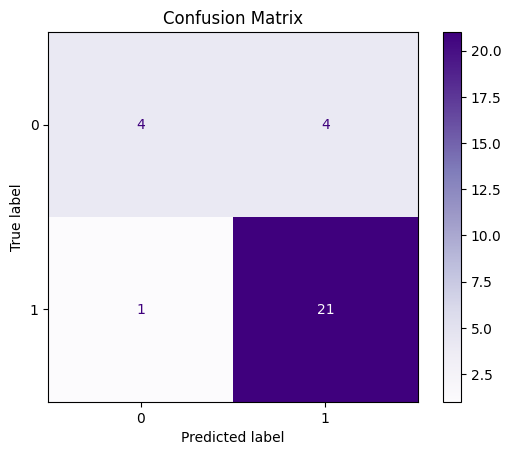

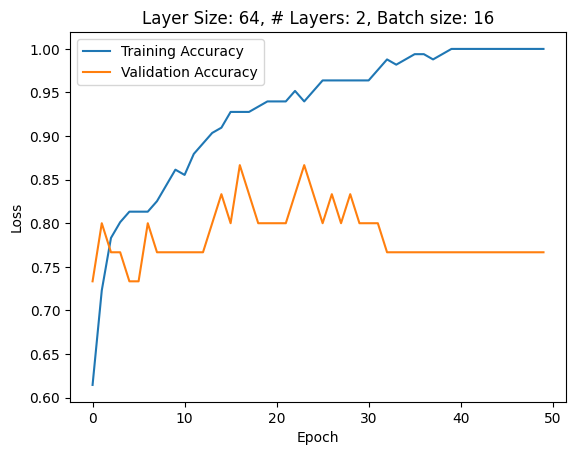

Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_625 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_625 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_626 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_626 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_627 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_627 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_628 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_628 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.5727 - loss: 0.6920 - val_accuracy: 0.5667 - val_loss: 0.6353
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8148 - loss: 0.6000 - val_accuracy: 0.8333 - val_loss: 0.5327
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8261 - loss: 0.5425 - val_accuracy: 0.8000 - val_loss: 0.4574
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8380 - loss: 0.4735 - val_accuracy: 0.7667 - val_loss: 0.4005
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7920 - loss: 0.4464 - val_accuracy: 0.8000 - val_loss: 0.3826
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8603 - loss: 0.3876 - val_accuracy: 0.7667 - val_loss: 0.3760
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8688 - loss: 0.3720 - val_accuracy: 0.7667 - val_loss: 0.3736
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8799 - loss: 0.2928 - val_accuracy: 0.7667 - val_l

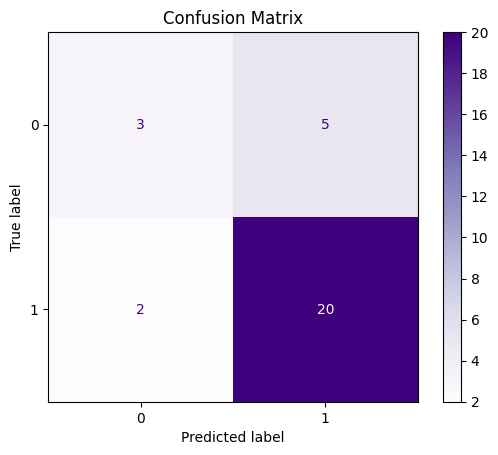

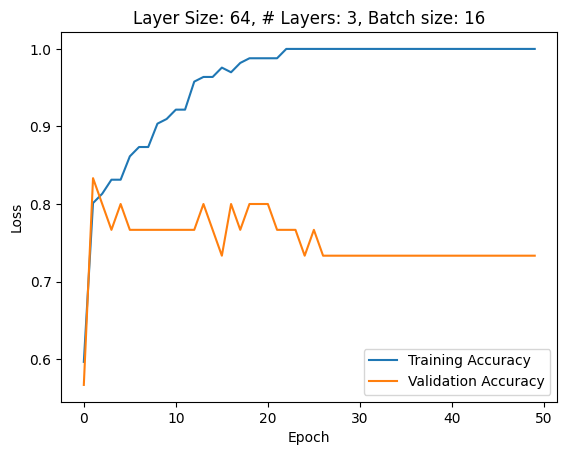

Model: "sequential_158"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_629 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_629 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_630 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_630 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_631 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_631 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_632 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_632 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_633 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_633 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.5368 - loss: 0.6862 - val_accuracy: 0.8000 - val_loss: 0.6243
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7530 - loss: 0.6215 - val_accuracy: 0.7667 - val_loss: 0.5710
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7939 - loss: 0.5586 - val_accuracy: 0.7667 - val_loss: 0.4551
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8440 - loss: 0.4918 - val_accuracy: 0.8000 - val_loss: 0.4043
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8352 - loss: 0.4233 - val_accuracy: 0.8000 - val_loss: 0.3827
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8516 - loss: 0.3641 - val_accuracy: 0.7667 - val_loss: 0.4315
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8822 - loss: 0.3200 - val_accuracy: 0.7667 - val_loss: 0.4662
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9252 - loss: 0.2395 - val_accuracy: 0.7667 - val_los

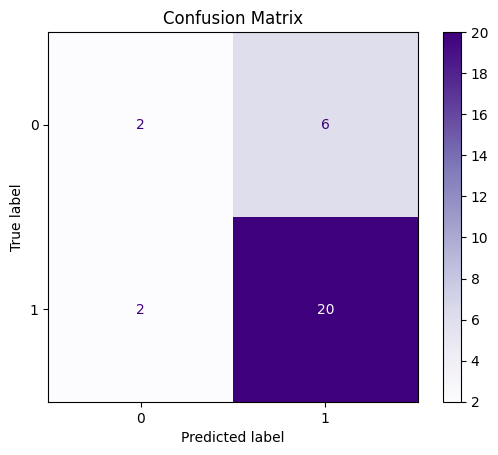

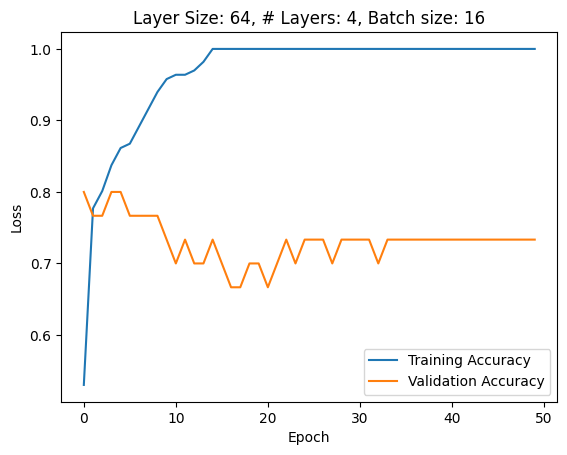

Model: "sequential_159"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_634 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_634 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_635 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_635 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_636 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_636 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_637 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_637 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_638 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_638 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_639 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_639 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.5056 - loss: 0.6882 - val_accuracy: 0.7667 - val_loss: 0.6180
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6564 - loss: 0.6358 - val_accuracy: 0.7667 - val_loss: 0.5335
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8307 - loss: 0.5532 - val_accuracy: 0.7667 - val_loss: 0.4422
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8170 - loss: 0.4759 - val_accuracy: 0.8333 - val_loss: 0.4147
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8269 - loss: 0.4010 - val_accuracy: 0.8333 - val_loss: 0.4073
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8746 - loss: 0.3070 - val_accuracy: 0.8000 - val_loss: 0.4827
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9118 - loss: 0.2666 - val_accuracy: 0.8000 - val_loss: 0.5512
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9435 - loss: 0.2337 - val_accuracy: 0.7667 - val_los

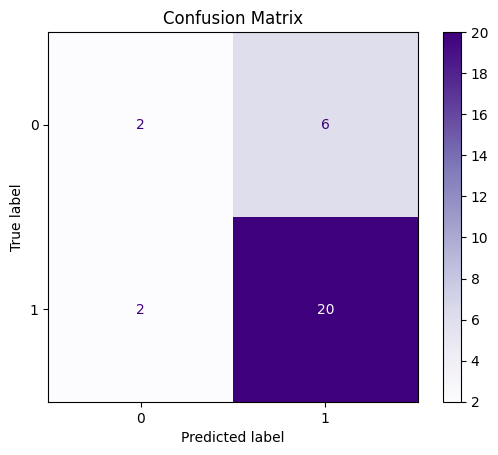

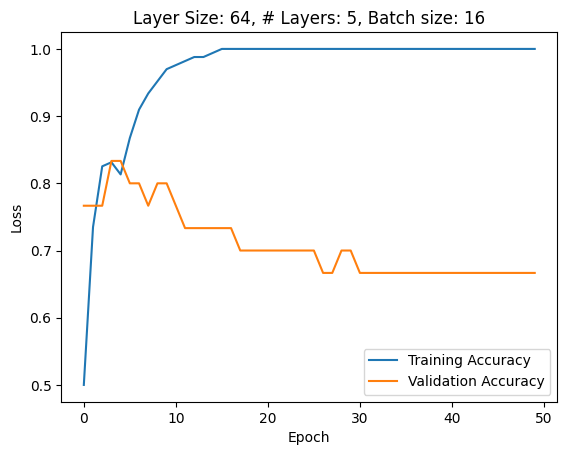

Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_640 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_640 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_641 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_641 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.3985 - loss: 0.7814 - val_accuracy: 0.1667 - val_loss: 0.8813
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4505 - loss: 0.7320 - val_accuracy: 0.1667 - val_loss: 0.8061
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4783 - loss: 0.7038 - val_accuracy: 0.3667 - val_loss: 0.7387
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6303 - loss: 0.6681 - val_accuracy: 0.4667 - val_loss: 0.6836
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7292 - loss: 0.6317 - val_accuracy: 0.5667 - val_loss: 0.6388
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7093 - loss: 0.6158 - val_accuracy: 0.5667 - val_loss: 0.6049
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7081 - loss: 0.6023 - val_accuracy: 0.6333 - val_loss: 0.5785
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7843 - loss: 0.5684 - val_accuracy: 0.7000 - val_loss: 0.5563
Epoc

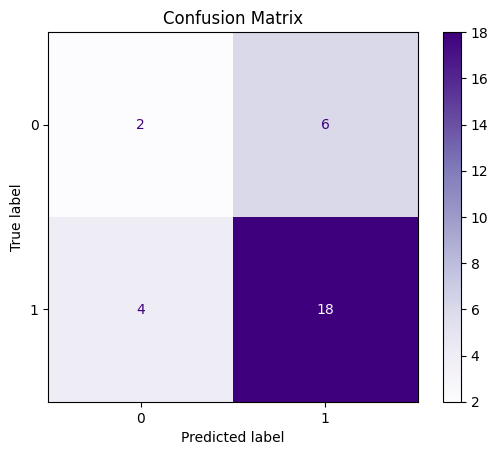

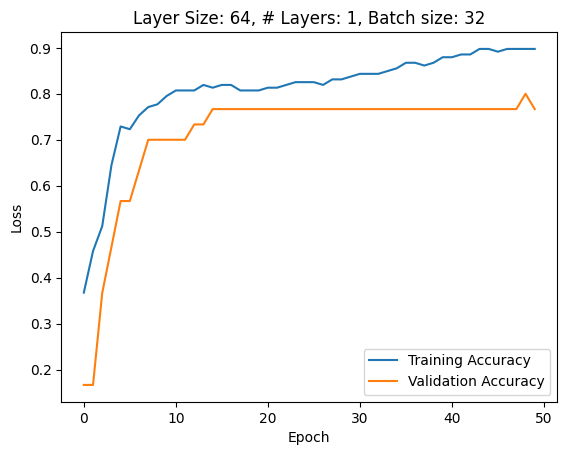

Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_642 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_642 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_643 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_643 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_644 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_644 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.6438 - loss: 0.6651 - val_accuracy: 0.6000 - val_loss: 0.6544
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7121 - loss: 0.6324 - val_accuracy: 0.6333 - val_loss: 0.6035
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7578 - loss: 0.5949 - val_accuracy: 0.6667 - val_loss: 0.5671
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8320 - loss: 0.5485 - val_accuracy: 0.7333 - val_loss: 0.5300
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8062 - loss: 0.5262 - val_accuracy: 0.7667 - val_loss: 0.4999
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8132 - loss: 0.5016 - val_accuracy: 0.7667 - val_loss: 0.4739
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8255 - loss: 0.4960 - val_accuracy: 0.7667 - val_loss: 0.4582
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8231 - loss: 0.4703 - val_accuracy: 0.7667 - val_loss: 0.4442

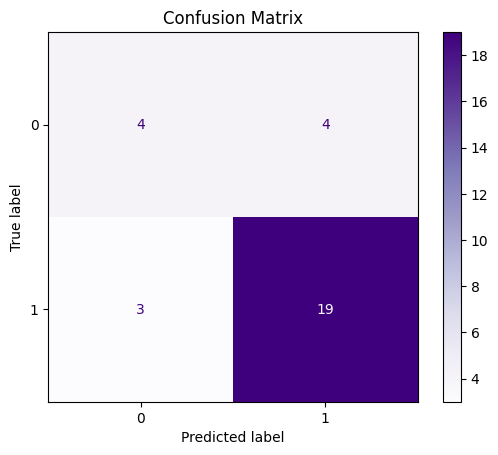

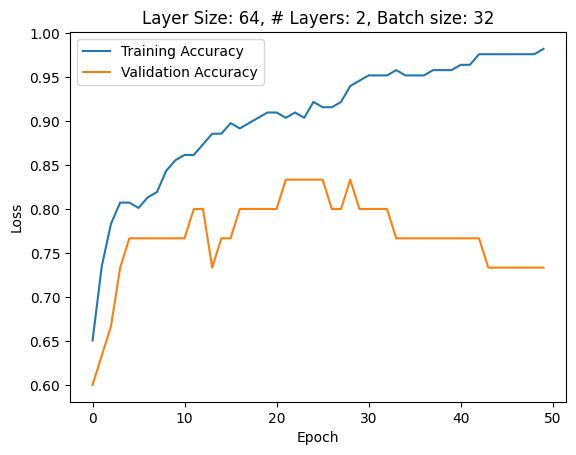

Model: "sequential_162"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_645 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_645 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_646 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_646 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_647 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_647 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_648 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_648 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.5799 - loss: 0.6730 - val_accuracy: 0.6333 - val_loss: 0.6199
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6901 - loss: 0.6257 - val_accuracy: 0.7333 - val_loss: 0.5849
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7933 - loss: 0.5890 - val_accuracy: 0.8000 - val_loss: 0.5520
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8182 - loss: 0.5564 - val_accuracy: 0.8000 - val_loss: 0.5236
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8569 - loss: 0.5221 - val_accuracy: 0.7667 - val_loss: 0.4891
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8623 - loss: 0.4936 - val_accuracy: 0.7667 - val_loss: 0.4613
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8344 - loss: 0.4683 - val_accuracy: 0.8000 - val_loss: 0.4439
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8822 - loss: 0.4238 - val_accuracy: 0.8000 - val_loss: 0.4255
E

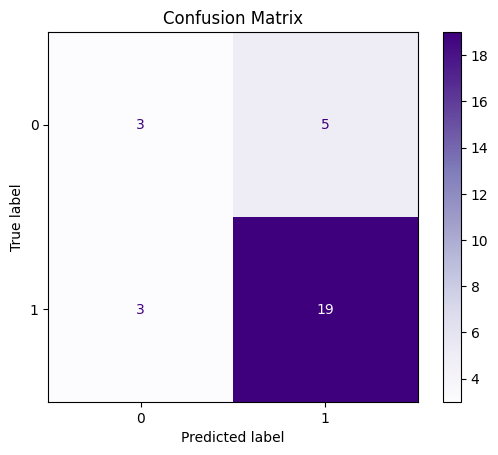

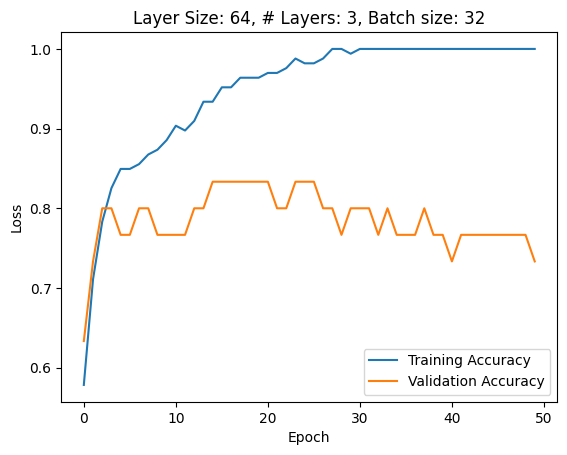

Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_649 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_649 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_650 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_650 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_651 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_651 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_652 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_652 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_653 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_653 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.4672 - loss: 0.6994 - val_accuracy: 0.7333 - val_loss: 0.6557
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7267 - loss: 0.6464 - val_accuracy: 0.7667 - val_loss: 0.6127
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8203 - loss: 0.5993 - val_accuracy: 0.8000 - val_loss: 0.5684
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7846 - loss: 0.5611 - val_accuracy: 0.8000 - val_loss: 0.5302
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8041 - loss: 0.5058 - val_accuracy: 0.8000 - val_loss: 0.4908
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8093 - loss: 0.4355 - val_accuracy: 0.8333 - val_loss: 0.4691
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8433 - loss: 0.4123 - val_accuracy: 0.8000 - val_loss: 0.4473
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8783 - loss: 0.3324 - val_accuracy: 0.8333 - val_loss: 0.4398
Epoc

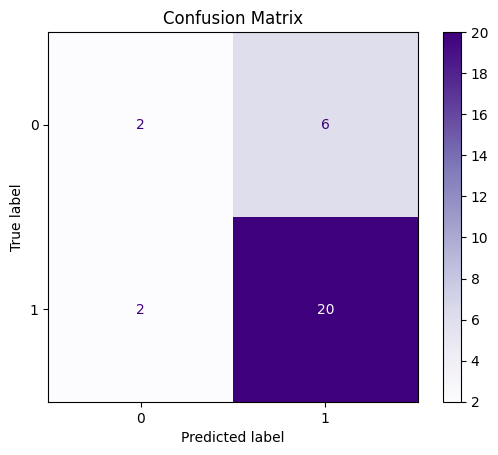

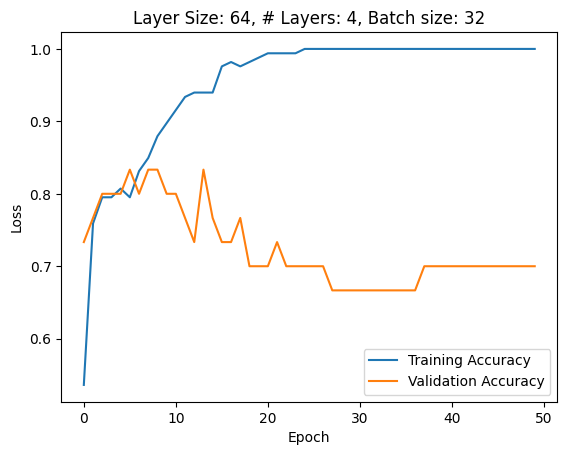

Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_654 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_654 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_655 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_655 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_656 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_656 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_657 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_657 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_658 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_658 (Activation)          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_659 (Dense)                    │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_659 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.4835 - loss: 0.6903 - val_accuracy: 0.7667 - val_loss: 0.6349
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5910 - loss: 0.6482 - val_accuracy: 0.8000 - val_loss: 0.5794
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6657 - loss: 0.6102 - val_accuracy: 0.8333 - val_loss: 0.5365
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8103 - loss: 0.5712 - val_accuracy: 0.8333 - val_loss: 0.4831
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8476 - loss: 0.5222 - val_accuracy: 0.8333 - val_loss: 0.4265
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8461 - loss: 0.4587 - val_accuracy: 0.7667 - val_loss: 0.3816
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8820 - loss: 0.3824 - val_accuracy: 0.7667 - val_loss: 0.3940
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8945 - loss: 0.3278 - val_accuracy: 0.7667 - val_loss: 0.4336
Epo

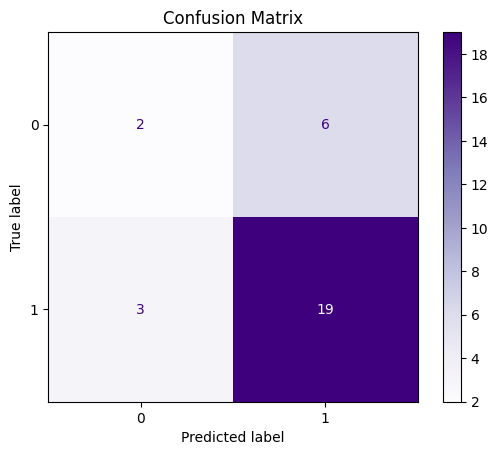

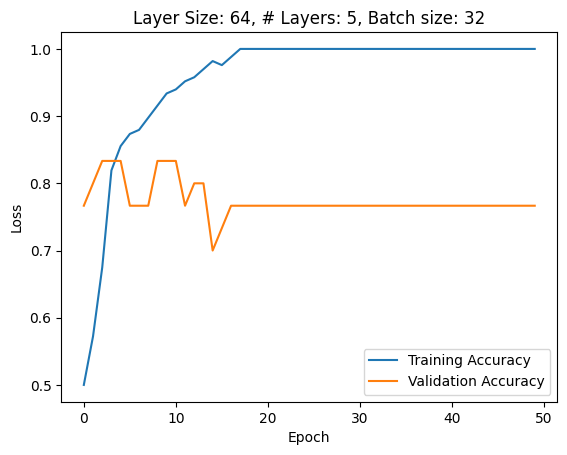

Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_660 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_660 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_661 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_661 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5758 - loss: 0.6667 - val_accuracy: 0.8000 - val_loss: 0.5033
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7790 - loss: 0.5634 - val_accuracy: 0.8667 - val_loss: 0.4534
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7614 - loss: 0.5403 - val_accuracy: 0.8667 - val_loss: 0.4371
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.4886 - val_accuracy: 0.8000 - val_loss: 0.4171
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8180 - loss: 0.4870 - val_accuracy: 0.8000 - val_loss: 0.4073
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.5249 - val_accuracy: 0.8333 - val_loss: 0.3931
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8521 - loss: 0.4145 - val_accuracy: 0.8000 - val_loss: 0.3864
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8614 - loss: 0.3937 - val_accuracy: 0.8000 - val_loss

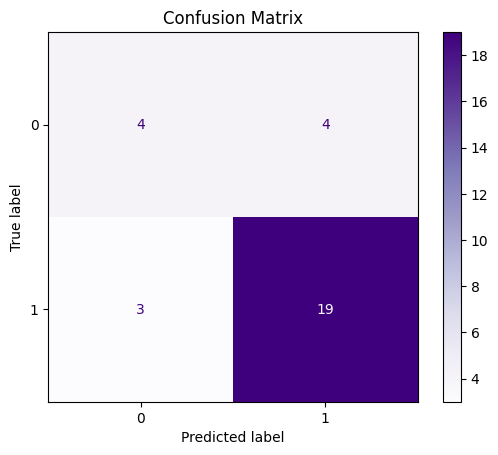

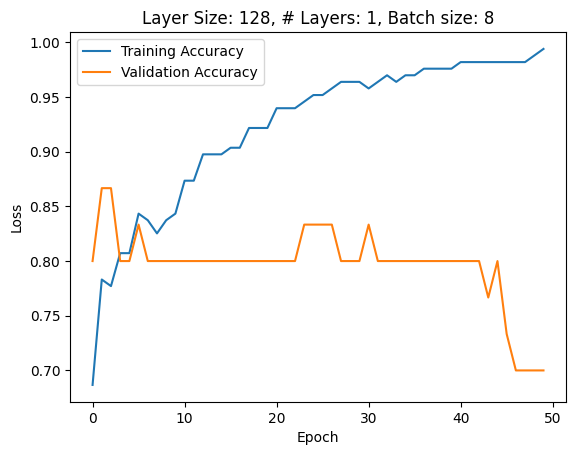

Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_662 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_662 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_663 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_663 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_664 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_664 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6005 - loss: 0.6468 - val_accuracy: 0.8667 - val_loss: 0.4498
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7922 - loss: 0.5344 - val_accuracy: 0.8333 - val_loss: 0.3874
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8535 - loss: 0.4298 - val_accuracy: 0.8000 - val_loss: 0.3573
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.3832 - val_accuracy: 0.7667 - val_loss: 0.3658
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.3454 - val_accuracy: 0.7667 - val_loss: 0.3582
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9061 - loss: 0.2771 - val_accuracy: 0.8000 - val_loss: 0.3616
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8901 - loss: 0.2517 - val_accuracy: 0.8333 - val_loss: 0.3943
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9547 - loss: 0.2033 - val_accuracy: 0.8333 - val_loss

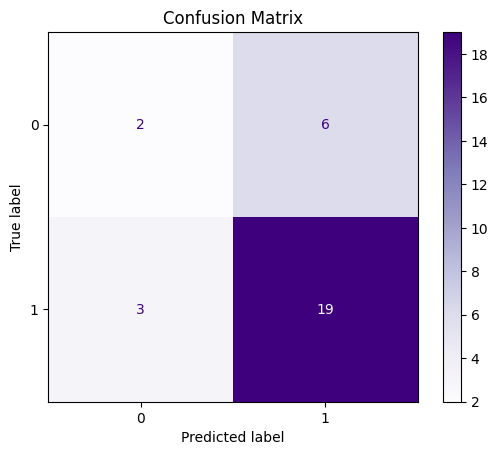

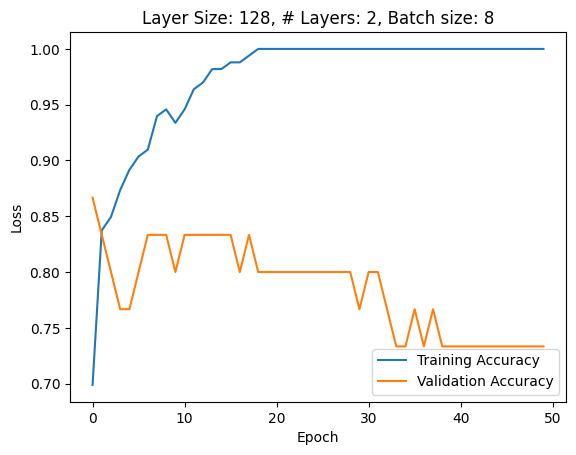

Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_665 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_665 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_666 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_666 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_667 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_667 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_668 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_668 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6440 - loss: 0.6554 - val_accuracy: 0.8333 - val_loss: 0.4547
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8459 - loss: 0.4544 - val_accuracy: 0.8000 - val_loss: 0.3636
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7996 - loss: 0.3944 - val_accuracy: 0.7667 - val_loss: 0.4056
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9304 - loss: 0.2860 - val_accuracy: 0.8000 - val_loss: 0.5146
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9157 - loss: 0.2693 - val_accuracy: 0.7333 - val_loss: 0.5363
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9384 - loss: 0.2248 - val_accuracy: 0.7667 - val_loss: 0.6238
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.1252 - val_accuracy: 0.7667 - val_loss: 0.6877
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9759 - loss: 0.1004 - val_accuracy: 0.6667 - val_loss

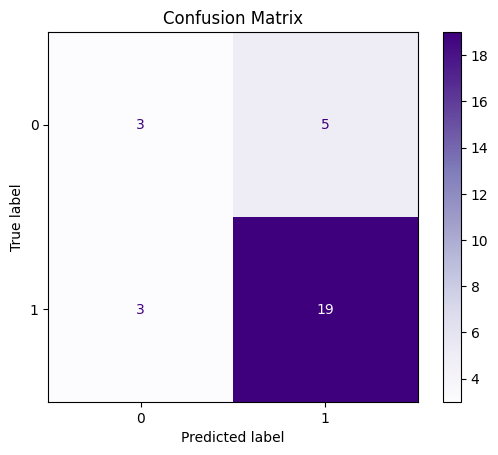

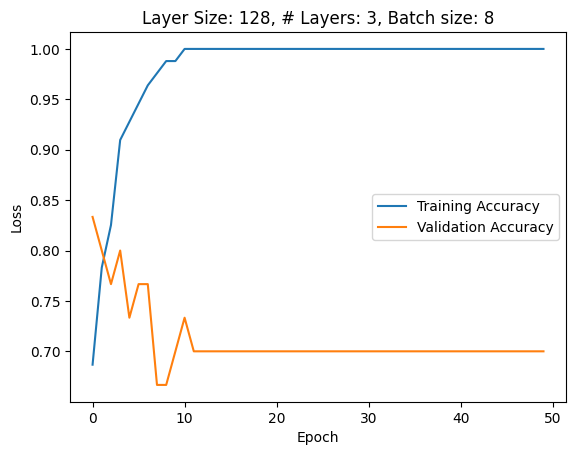

Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_669 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_669 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_670 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_670 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_671 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_671 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_672 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_672 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_673 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_673 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6266 - loss: 0.6595 - val_accuracy: 0.8000 - val_loss: 0.4537
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7963 - loss: 0.5049 - val_accuracy: 0.8333 - val_loss: 0.3869
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8510 - loss: 0.3477 - val_accuracy: 0.8000 - val_loss: 0.4877
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9227 - loss: 0.2796 - val_accuracy: 0.8000 - val_loss: 0.5723
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9014 - loss: 0.2143 - val_accuracy: 0.8000 - val_loss: 0.7215
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9732 - loss: 0.1057 - val_accuracy: 0.7333 - val_loss: 0.8957
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9799 - loss: 0.1112 - val_accuracy: 0.8333 - val_loss: 0.8802
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0538 - val_accuracy: 0.7667 - val_loss

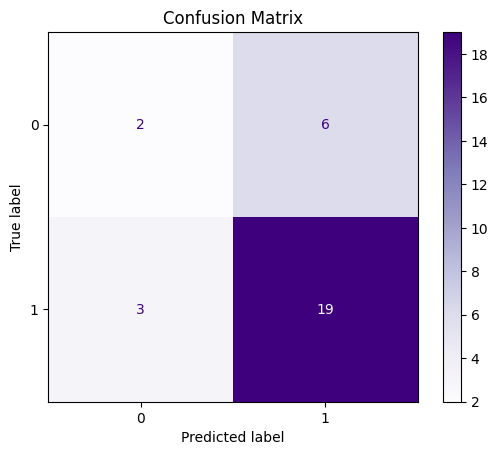

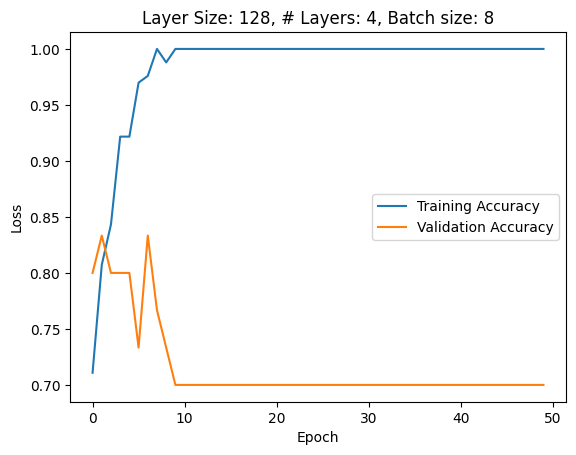

Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_674 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_674 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_675 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_675 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_676 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_676 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_677 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_677 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_678 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_678 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_679 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_679 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,225 (266.50 KB)

 Trainable params: 68,225 (266.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5420 - loss: 0.6868 - val_accuracy: 0.7667 - val_loss: 0.5344
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.5471 - val_accuracy: 0.8000 - val_loss: 0.4235
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8611 - loss: 0.3952 - val_accuracy: 0.7667 - val_loss: 0.3783
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9387 - loss: 0.2090 - val_accuracy: 0.8000 - val_loss: 0.6967
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9393 - loss: 0.1298 - val_accuracy: 0.8333 - val_loss: 1.0164
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9675 - loss: 0.1134 - val_accuracy: 0.7333 - val_loss: 1.2014
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9935 - loss: 0.0643 - val_accuracy: 0.7333 - val_loss: 1.7304
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9790 - loss: 0.0499 - val_accuracy: 0.7333 - val_loss

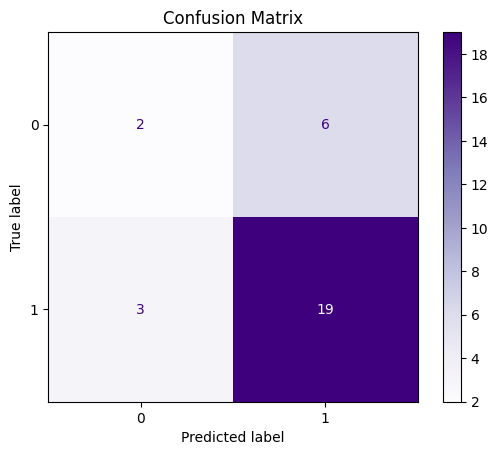

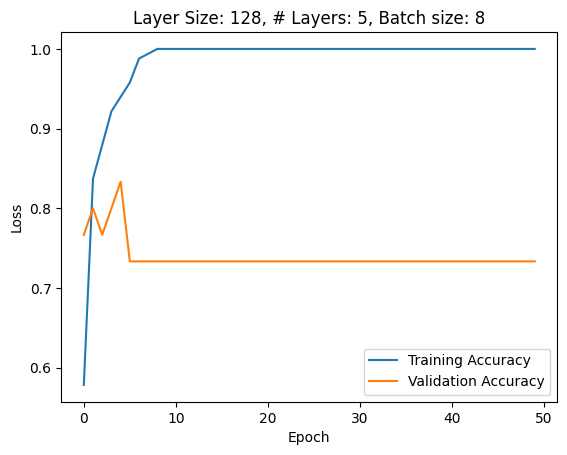

Model: "sequential_170"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_680 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_680 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_681 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_681 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.4696 - loss: 0.7060 - val_accuracy: 0.5667 - val_loss: 0.6508
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5826 - loss: 0.6406 - val_accuracy: 0.8000 - val_loss: 0.5665
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7620 - loss: 0.5626 - val_accuracy: 0.8333 - val_loss: 0.5089
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8399 - loss: 0.5322 - val_accuracy: 0.8000 - val_loss: 0.4788
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8060 - loss: 0.5037 - val_accuracy: 0.8333 - val_loss: 0.4615
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8555 - loss: 0.4935 - val_accuracy: 0.7667 - val_loss: 0.4512
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8265 - loss: 0.4708 - val_accuracy: 0.7667 - val_loss: 0.4395
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8168 - loss: 0.4721 - val_accuracy: 0.7667 - val_los

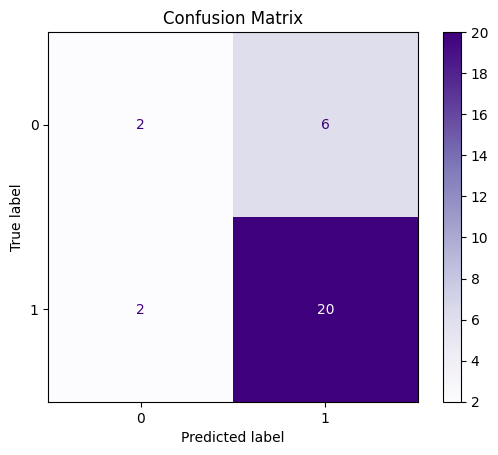

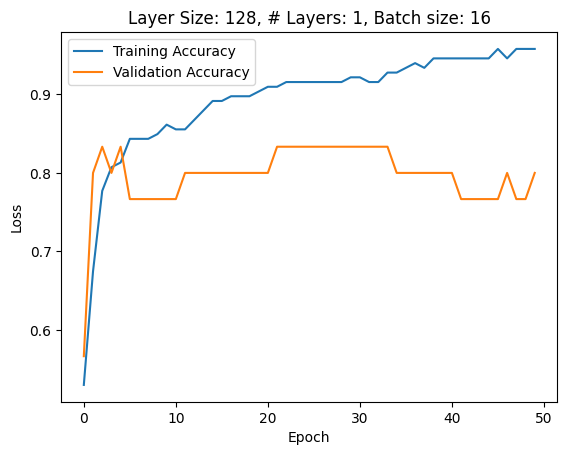

Model: "sequential_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_682 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_682 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_683 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_683 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_684 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_684 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.4763 - loss: 0.6946 - val_accuracy: 0.7667 - val_loss: 0.5184
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8079 - loss: 0.5558 - val_accuracy: 0.7667 - val_loss: 0.4889
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8380 - loss: 0.4990 - val_accuracy: 0.7333 - val_loss: 0.4566
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7822 - loss: 0.4757 - val_accuracy: 0.7333 - val_loss: 0.4456
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8857 - loss: 0.3515 - val_accuracy: 0.7333 - val_loss: 0.4348
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8811 - loss: 0.3444 - val_accuracy: 0.7333 - val_loss: 0.4414
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8525 - loss: 0.3727 - val_accuracy: 0.7333 - val_loss: 0.4396
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8974 - loss: 0.3111 - val_accuracy: 0.7333 - val_los

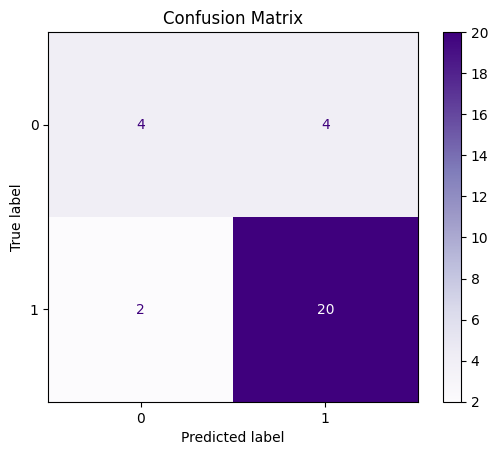

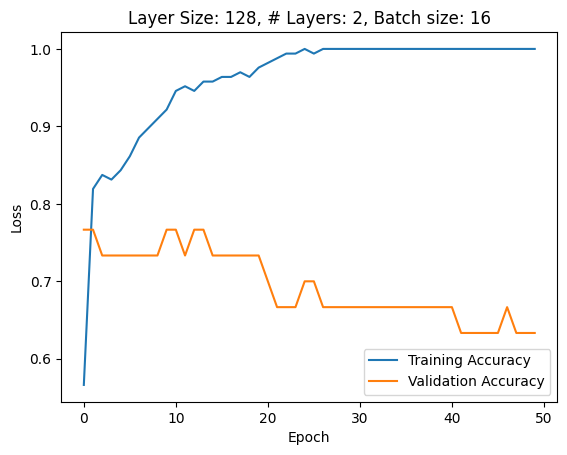

Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_685 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_685 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_686 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_686 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_687 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_687 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_688 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_688 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5945 - loss: 0.6685 - val_accuracy: 0.8333 - val_loss: 0.5327
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8536 - loss: 0.5414 - val_accuracy: 0.8000 - val_loss: 0.4443
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8497 - loss: 0.4797 - val_accuracy: 0.7667 - val_loss: 0.4056
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8971 - loss: 0.3952 - val_accuracy: 0.8000 - val_loss: 0.3833
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9189 - loss: 0.3054 - val_accuracy: 0.8000 - val_loss: 0.3700
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9011 - loss: 0.2936 - val_accuracy: 0.8000 - val_loss: 0.3898
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9185 - loss: 0.2384 - val_accuracy: 0.8333 - val_loss: 0.4646
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9396 - loss: 0.1578 - val_accuracy: 0.8333 - val_los

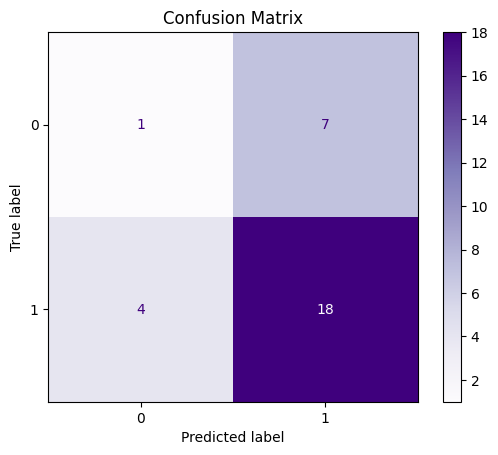

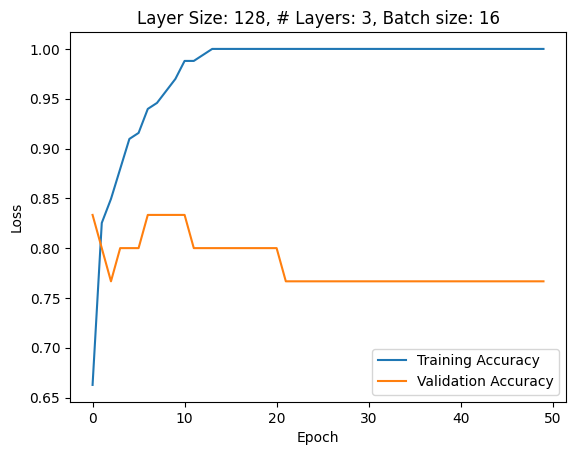

Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_689 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_689 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_690 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_690 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_691 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_691 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_692 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_692 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_693 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_693 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5715 - loss: 0.6782 - val_accuracy: 0.8667 - val_loss: 0.5186
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7896 - loss: 0.5519 - val_accuracy: 0.8667 - val_loss: 0.3961
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8232 - loss: 0.4332 - val_accuracy: 0.8333 - val_loss: 0.3525
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8341 - loss: 0.3773 - val_accuracy: 0.8333 - val_loss: 0.3725
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9371 - loss: 0.2586 - val_accuracy: 0.8667 - val_loss: 0.3719
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8874 - loss: 0.2406 - val_accuracy: 0.8000 - val_loss: 0.5873
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9506 - loss: 0.1653 - val_accuracy: 0.8333 - val_loss: 0.5392
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9251 - loss: 0.1701 - val_accuracy: 0.7667 - val_

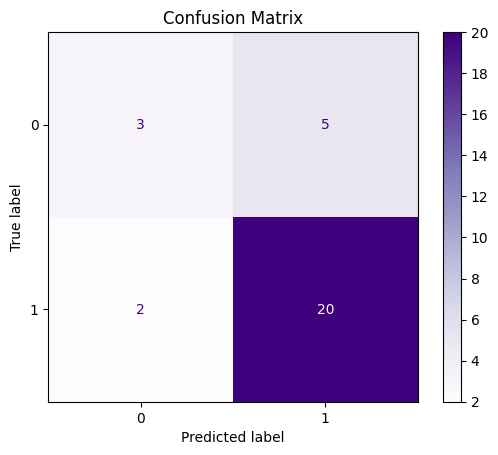

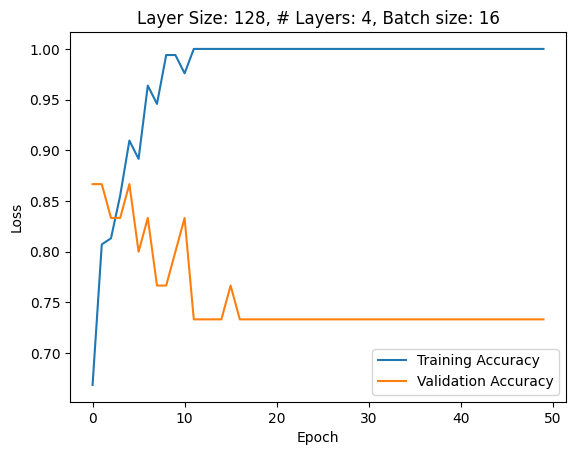

Model: "sequential_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_694 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_694 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_695 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_695 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_696 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_696 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_697 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_697 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_698 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_698 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_699 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_699 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,225 (266.50 KB)

 Trainable params: 68,225 (266.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.5583 - loss: 0.6852 - val_accuracy: 0.8000 - val_loss: 0.6190
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8211 - loss: 0.5941 - val_accuracy: 0.8000 - val_loss: 0.4923
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8428 - loss: 0.4474 - val_accuracy: 0.7667 - val_loss: 0.4441
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8660 - loss: 0.3661 - val_accuracy: 0.8000 - val_loss: 0.4948
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9527 - loss: 0.1950 - val_accuracy: 0.8333 - val_loss: 0.6908
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9523 - loss: 0.1063 - val_accuracy: 0.8000 - val_loss: 0.7720
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9929 - loss: 0.0409 - val_accuracy: 0.8333 - val_loss: 1.0735
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 0.8000 - v

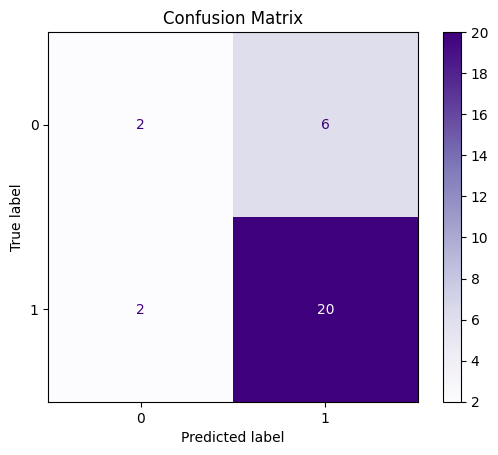

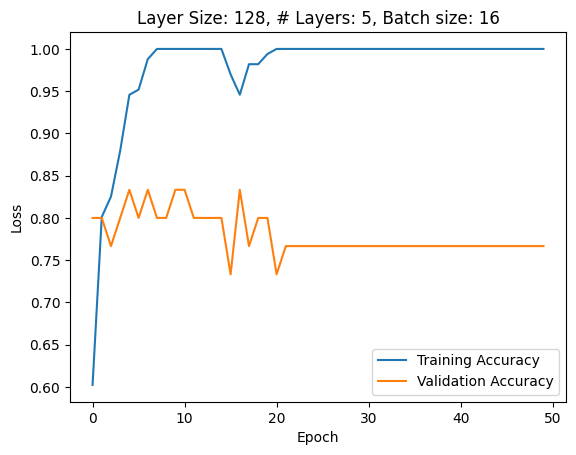

Model: "sequential_175"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_700 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_700 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_701 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_701 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.3928 - loss: 0.7388 - val_accuracy: 0.4333 - val_loss: 0.7211
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5857 - loss: 0.6818 - val_accuracy: 0.5333 - val_loss: 0.6588
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6509 - loss: 0.6495 - val_accuracy: 0.6667 - val_loss: 0.6117
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6991 - loss: 0.6274 - val_accuracy: 0.7333 - val_loss: 0.5762
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7685 - loss: 0.5919 - val_accuracy: 0.8000 - val_loss: 0.5499
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7942 - loss: 0.5677 - val_accuracy: 0.8000 - val_loss: 0.5255
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7941 - loss: 0.5554 - val_accuracy: 0.7667 - val_loss: 0.5076
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8175 - loss: 0.5230 - val_accuracy: 0.7667 - val_loss: 0.4958
Epoch 

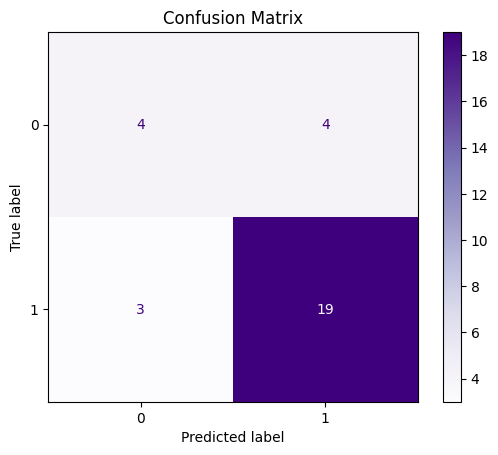

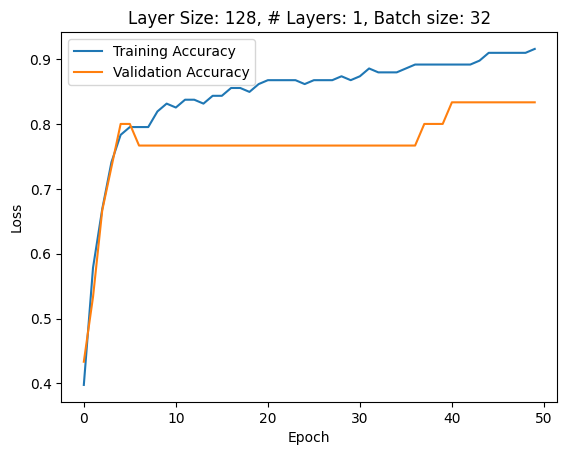

Model: "sequential_176"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_702 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_702 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_703 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_703 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_704 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_704 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.5985 - loss: 0.7074 - val_accuracy: 0.8000 - val_loss: 0.6022
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7361 - loss: 0.5974 - val_accuracy: 0.7333 - val_loss: 0.5115
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7869 - loss: 0.5507 - val_accuracy: 0.7667 - val_loss: 0.4767
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8051 - loss: 0.5103 - val_accuracy: 0.7667 - val_loss: 0.4547
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8145 - loss: 0.4706 - val_accuracy: 0.7667 - val_loss: 0.4395
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7956 - loss: 0.4669 - val_accuracy: 0.7333 - val_loss: 0.4274
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8340 - loss: 0.4269 - val_accuracy: 0.7667 - val_loss: 0.4242
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8294 - loss: 0.4028 - val_accuracy: 0.7667 - val_loss: 0.4271
Ep

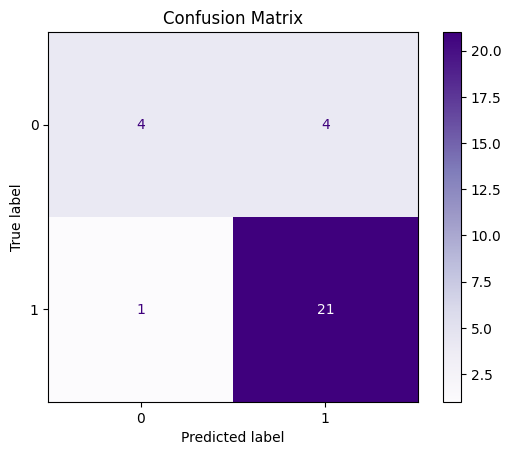

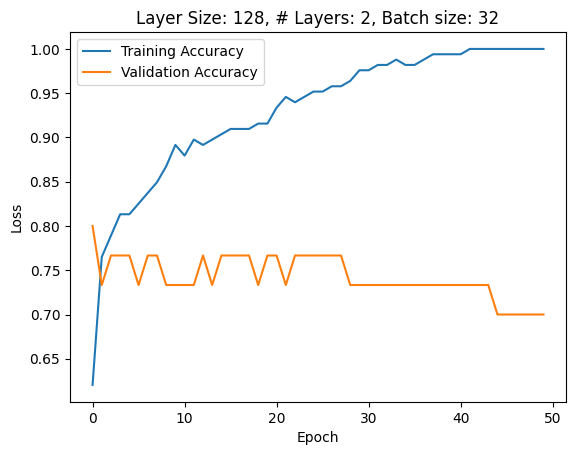

Model: "sequential_177"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_705 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_705 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_706 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_706 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_707 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_707 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_708 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_708 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.4936 - loss: 0.6918 - val_accuracy: 0.8667 - val_loss: 0.5401
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8122 - loss: 0.5834 - val_accuracy: 0.8000 - val_loss: 0.4739
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8252 - loss: 0.5180 - val_accuracy: 0.7667 - val_loss: 0.4219
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8399 - loss: 0.4636 - val_accuracy: 0.8000 - val_loss: 0.3908
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8410 - loss: 0.4243 - val_accuracy: 0.8000 - val_loss: 0.3842
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8223 - loss: 0.4141 - val_accuracy: 0.7667 - val_loss: 0.3832
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8736 - loss: 0.3267 - val_accuracy: 0.7667 - val_loss: 0.3994
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8700 - loss: 0.3212 - val_accuracy: 0.8000 - val_loss: 0.4187

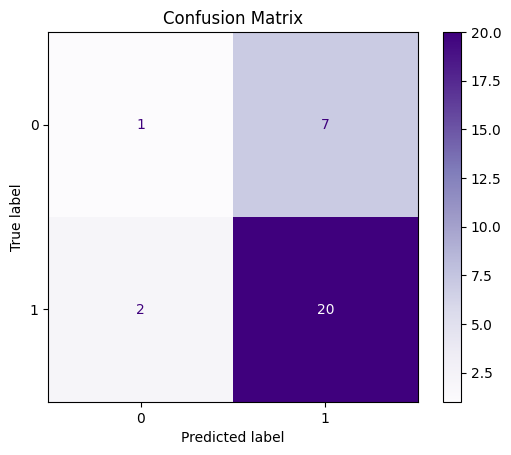

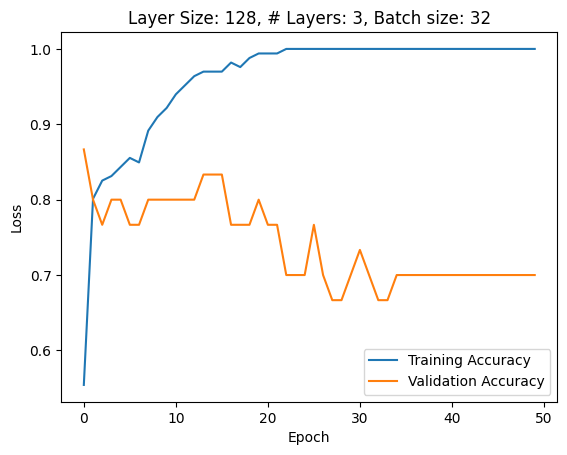

Model: "sequential_178"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_709 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_709 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_710 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_710 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_711 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_711 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_712 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_712 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_713 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_713 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.6322 - loss: 0.6706 - val_accuracy: 0.7667 - val_loss: 0.5617
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8319 - loss: 0.5547 - val_accuracy: 0.7667 - val_loss: 0.4781
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8408 - loss: 0.4777 - val_accuracy: 0.8000 - val_loss: 0.4254
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8580 - loss: 0.4152 - val_accuracy: 0.8000 - val_loss: 0.4073
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8409 - loss: 0.3635 - val_accuracy: 0.8000 - val_loss: 0.4066
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8947 - loss: 0.2900 - val_accuracy: 0.8000 - val_loss: 0.4341
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9025 - loss: 0.2674 - val_accuracy: 0.8000 - val_loss: 0.5226
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9398 - loss: 0.2044 - val_accuracy: 0.8000 - val_loss: 0.4826
Epoch

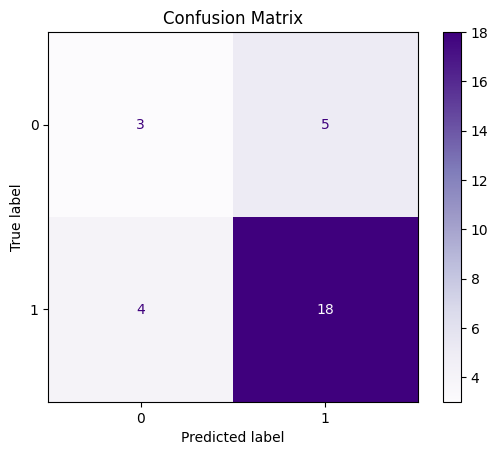

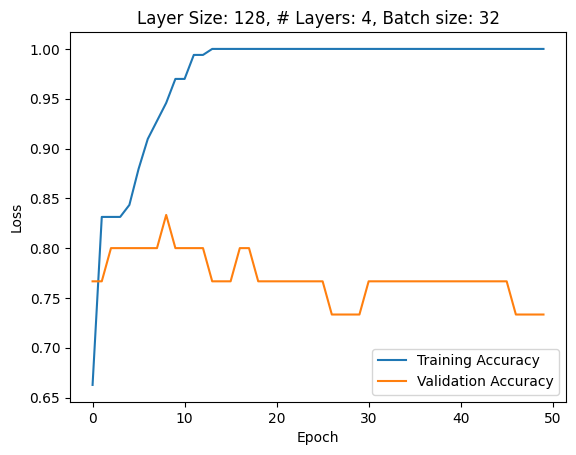

Model: "sequential_179"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_714 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_714 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_715 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_715 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_716 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_716 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_717 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_717 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_718 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_718 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_719 (Dense)                    │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_719 (Activation)          │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,225 (266.50 KB)

 Trainable params: 68,225 (266.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.4995 - loss: 0.6911 - val_accuracy: 0.8000 - val_loss: 0.5828
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7582 - loss: 0.6048 - val_accuracy: 0.8667 - val_loss: 0.4799
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8386 - loss: 0.4864 - val_accuracy: 0.8667 - val_loss: 0.3722
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8129 - loss: 0.4145 - val_accuracy: 0.8000 - val_loss: 0.3726
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9016 - loss: 0.3265 - val_accuracy: 0.8000 - val_loss: 0.4353
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9232 - loss: 0.2296 - val_accuracy: 0.8333 - val_loss: 0.5738
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9519 - loss: 0.1713 - val_accuracy: 0.8000 - val_loss: 0.6527
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.1121 - val_accuracy: 0.7333 - val_loss: 0.9011
Ep

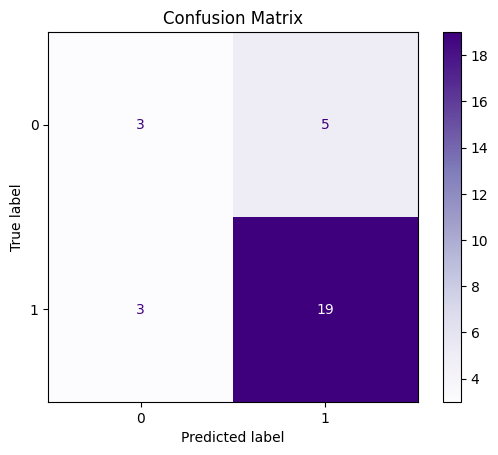

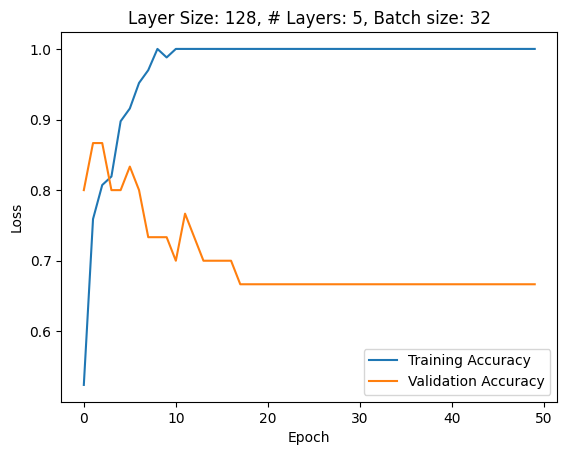

    layer_size  batch_size  hidden_layer  accuracy  val_accuracy
0            4           8             1  0.777108      0.900000
1            4           8             2  0.789157      0.833333
2            4           8             3  0.849398      0.866667
3            4           8             4  0.855422      0.800000
4            4           8             5  0.891566      0.766667
5            4          16             1  0.746988      0.766667
6            4          16             2  0.813253      0.866667
7            4          16             3  0.861446      0.766667
8            4          16             4  0.789157      0.800000
9            4          16             5  0.801205      0.566667
10           4          32             1  0.656627      0.600000
11           4          32             2  0.692771      0.666667
12           4          32             3  0.740964      0.866667
13           4          32             4  0.795181      0.566667
14           4          3

In [ ]:
# neural network

layer_sizes = [4, 8, 16, 32, 64, 128]
r_squared = []

accuracies = {
    'layer_size': [],
    'batch_size': [],
    'hidden_layer': [],
    'accuracy': [],
    'val_accuracy': []
}

performance = {
    'layer_size': [],
    'batch_size': [],
    'hidden_layer': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auroc': []
}

for size in layer_sizes:
  for batch_size in [8, 16, 32]:
    for hidden_layer in range(1,6):
      model = Sequential()
      model.add(Input(shape=((X_train.shape[1]),)))
      for i in range(hidden_layer):
        model.add(Dense(size))
        model.add(Activation('relu'))
      model.add(Dense(1))
      model.add(Activation('sigmoid'))
      model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
      model.summary()
      history = model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_data = (X_test, y_test))

      # Performance Evaluation
      accuracies['layer_size'].append(size)
      accuracies['batch_size'].append(batch_size)
      accuracies['hidden_layer'].append(hidden_layer)
      accuracies['accuracy'].append(history.history['accuracy'][-1])
      accuracies['val_accuracy'].append(history.history['val_accuracy'][-1])

      # y_pred = model.predict(X_test)
      y_pred = (y_test_probs > 0.5).astype(int)
      y_test_probs = model.predict(X_test).flatten()

      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      auroc = roc_auc_score(y_test, y_test_probs)
      confusion = confusion_matrix(y_test, y_pred)
      ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap=plt.cm.Purples)
      plt.title("Confusion Matrix")
      plt.show()

      performance['layer_size'].append(size)
      performance['batch_size'].append(batch_size)
      performance['hidden_layer'].append(hidden_layer)
      performance['accuracy'].append(accuracy)
      performance['precision'].append(precision)
      performance['recall'].append(recall)
      performance['f1'].append(f1)
      performance['auroc'].append(auroc)

      # Plotting Results
      plt.plot(history.history['accuracy'], label='Training Accuracy')
      plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.title(f'Layer Size: {size}, # Layers: {hidden_layer}, Batch size: {batch_size}')
      plt.legend()
      plt.show()

accuracies_df = pd.DataFrame(accuracies)
print(accuracies_df)

In [ ]:
accuracies_df
pd.set_option('display.max_rows', None)
accuracies_df['gap'] = abs(accuracies_df['accuracy'] - accuracies_df['val_accuracy'])
accuracies_df.sort_values(by=['val_accuracy', 'gap'], ascending=[False, True])

layer_size  batch_size  hidden_layer  accuracy  val_accuracy       gap
0            4           8             1  0.777108      0.900000  0.122892
2            4           8             3  0.849398      0.866667  0.017269
23           8          16             4  0.897590      0.866667  0.030924
36          16          16             2  0.897590      0.866667  0.030924
6            4          16             2  0.813253      0.866667  0.053414
14           4          32             5  0.789157      0.866667  0.077510
12           4          32             3  0.740964      0.866667  0.125703
30          16           8             1  0.867470      0.833333  0.034137
1            4           8             2  0.789157      0.833333  0.044177
50          32          16             1  0.903614      0.833333  0.070281
85         128          32             1  0.915663      0.833333  0.082329
45          32           8             1  0.927711      0.833333  0.094378
65          64          16             1  0.933735      0.833333  0.100402
33          16           8             4  0.987952      0.833333  0.154619
32          16           8             3  0.993976      0.833333  0.160643
8            4          16             4  0.789157      0.800000  0.010843
27           8          32             3  0.819277      0.800000  0.019277
28           8          32             4  0.843373      0.800000  0.043373
41          16          32             2  0.843373      0.800000  0.043373
55          32          32             1  0.849398      0.800000  0.049398
3            4           8             4  0.855422      0.800000  0.055422
15           8           8             1  0.873494      0.800000  0.073494
16           8           8             2  0.885542      0.800000  0.085542
21           8          16             2  0.891566      0.800000  0.091566
56          32          32             2  0.951807      0.800000  0.151807
80         128          16             1  0.957831      0.800000  0.157831
46          32           8             2  0.993976      0.800000  0.193976
34          16           8             5  1.000000      0.800000  0.200000
47          32           8             3  1.000000      0.800000  0.200000
5            4          16             1  0.746988      0.766667  0.019679
25           8          32             1  0.789157      0.766667  0.022490
26           8          32             2  0.795181      0.766667  0.028514
20           8          16             1  0.813253      0.766667  0.046586
7            4          16             3  0.861446      0.766667  0.094779
29           8          32             5  0.873494      0.766667  0.106827
4            4           8             5  0.891566      0.766667  0.124900
70          64          32             1  0.897590      0.766667  0.130924
42          16          32             3  0.909639      0.766667  0.142972
22           8          16             3  0.915663      0.766667  0.148996
60          64           8             1  0.957831      0.766667  0.191165
58          32          32             4  0.987952      0.766667  0.221285
52          32          16             3  1.000000      0.766667  0.233333
66          64          16             2  1.000000      0.766667  0.233333
74          64          32             5  1.000000      0.766667  0.233333
82         128          16             3  1.000000      0.766667  0.233333
84         128          16             5  1.000000      0.766667  0.233333
40          16          32             1  0.819277      0.733333  0.085944
24           8          16             5  0.825301      0.733333  0.091968
35          16          16             1  0.903614      0.733333  0.170281
17           8           8             3  0.945783      0.733333  0.212450
43          16          32             4  0.945783      0.733333  0.212450
31          16           8             2  0.963855      0.733333  0.230522
37          16          16   

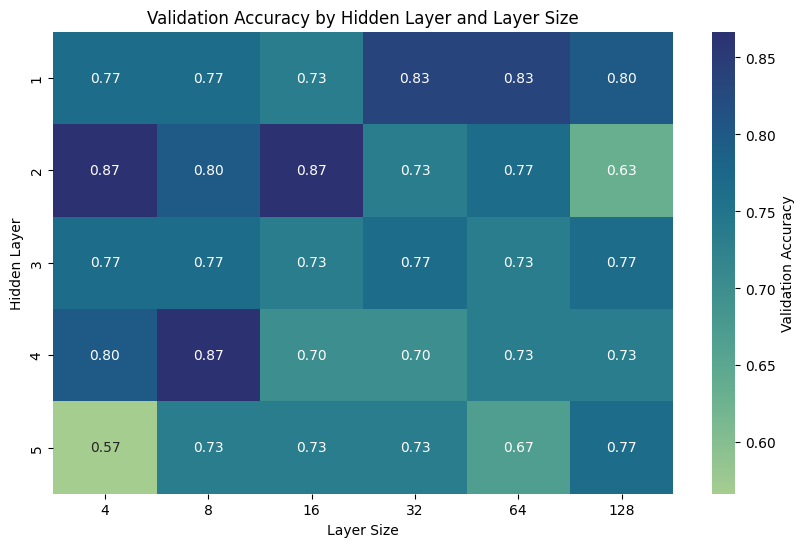

In [ ]:
heatmap_df = accuracies_df[accuracies_df['batch_size'] == 16]
heatmap_data = heatmap_df.pivot(index='hidden_layer', columns='layer_size', values='val_accuracy')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='crest', cbar_kws={'label': 'Validation Accuracy'})
plt.title('Validation Accuracy by Hidden Layer and Layer Size')
plt.xlabel('Layer Size')
plt.ylabel('Hidden Layer')
plt.show()

In [ ]:
performance_df = pd.DataFrame(performance)
performance_df.sort_values(by='accuracy', ascending=False)

layer_size  batch_size  hidden_layer  accuracy  precision    recall  \
1            4           8             2  0.900000   0.952381  0.909091   
37          16          16             3  0.866667   0.875000  0.954545   
3            4           8             4  0.866667   0.909091  0.909091   
7            4          16             3  0.866667   0.950000  0.863636   
24           8          16             5  0.866667   0.950000  0.863636   
13           4          32             4  0.866667   0.909091  0.909091   
15           8           8             1  0.866667   0.950000  0.863636   
2            4           8             3  0.833333   0.869565  0.909091   
31          16           8             2  0.833333   0.840000  0.954545   
51          32          16             2  0.833333   0.840000  0.954545   
33          16           8             4  0.833333   0.840000  0.954545   
34          16           8             5  0.833333   0.840000  0.954545   
46          32           8             2  0.833333   0.869565  0.909091   
86         128          32             2  0.833333   0.840000  0.954545   
66          64          16             2  0.833333   0.840000  0.954545   
35          16          16             1  0.800000   0.807692  0.954545   
29           8          32             5  0.800000   0.863636  0.863636   
42          16          32             3  0.800000   0.863636  0.863636   
47          32           8             3  0.800000   0.807692  0.954545   
48          32           8             4  0.800000   0.807692  0.954545   
56          32          32             2  0.800000   0.863636  0.863636   
28           8          32             4  0.800000   0.833333  0.909091   
57          32          32             3  0.800000   0.833333  0.909091   
4            4           8             5  0.800000   0.900000  0.818182   
16           8           8             2  0.800000   0.863636  0.863636   
17           8           8             3  0.800000   0.833333  0.909091   
81         128          16             2  0.800000   0.833333  0.909091   
22           8          16             3  0.800000   0.807692  0.954545   
9            4          16             5  0.800000   0.863636  0.863636   
23           8          16             4  0.766667   0.826087  0.863636   
85         128          32             1  0.766667   0.826087  0.863636   
83         128          16             4  0.766667   0.800000  0.909091   
43          16          32             4  0.766667   0.800000  0.909091   
8            4          16             4  0.766667   0.826087  0.863636   
6            4          16             2  0.766667   0.894737  0.772727   
5            4          16             1  0.766667   0.826087  0.863636   
61          64           8             2  0.766667   0.777778  0.954545   
53          32          16             4  0.766667   0.800000  0.909091   
59          32          32             5  0.766667   0.800000  0.909091   
67          64          16             3  0.766667   0.800000  0.909091   
0            4           8             1  0.766667   0.857143  0.818182   
75         128           8             1  0.766667   0.826087  0.863636   
26           8          32             2  0.766667   0.800000  0.909091   
27           8          32             3  0.766667   0.826087  0.863636   
21           8          16             2  0.766667   0.857143  0.818182   
30          16           8             1  0.766667   0.826087  0.863636   
71          64          32             2  0.766667   0.826087  0.863636   
69          64          16             5  0.733333   0.769231  0.909091   
58          32          32             4  0.733333   0.791667  0.863636   
60          64           8             1  0.733333   0.791667  0.863636   
64          64           8             5  0.733333   0.791667  0.863636   
63          64           8             4  0.733333   0.791667  0.863636   
77         128           8   

# Comparison

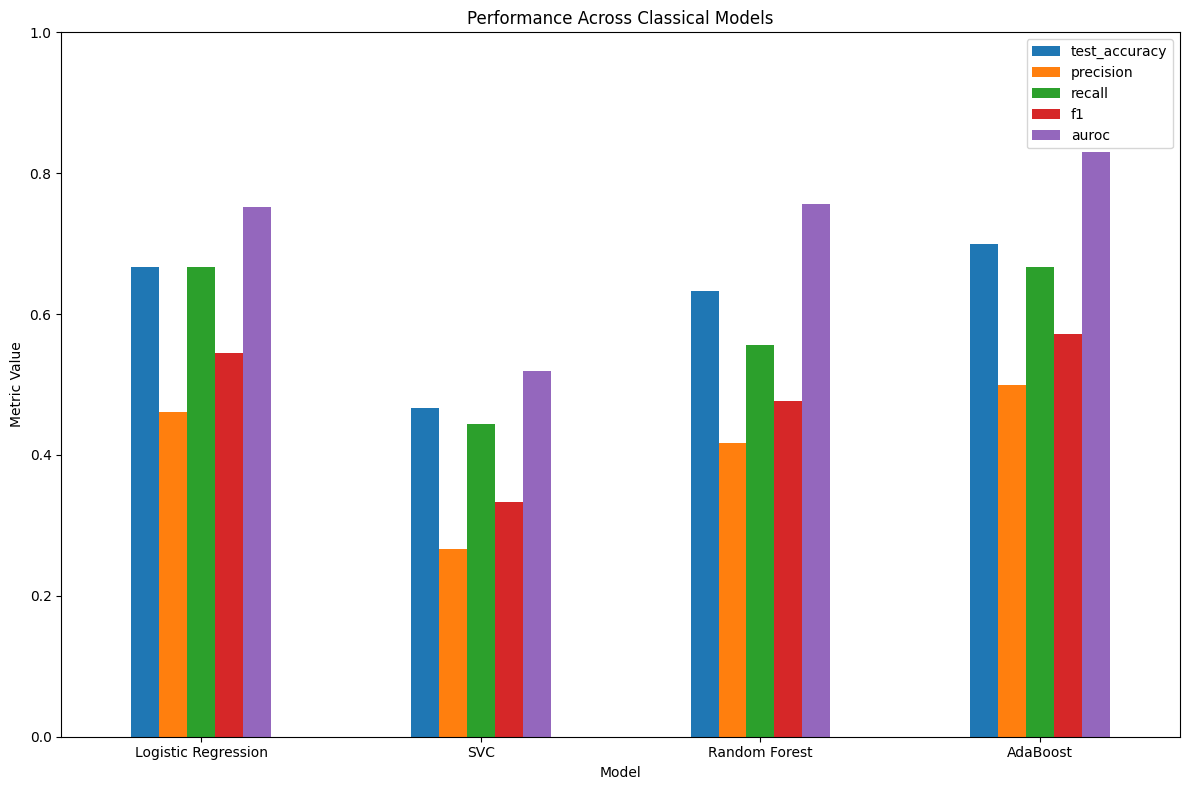

In [ ]:
# comparing all models
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.drop(columns=['train_accuracy'])
metrics_df.set_index('model').plot(kind='bar', figsize=(12, 8))

plt.title("Performance Across Classical Models")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.ylim([0.0, 1.0])
plt.legend()
plt.tight_layout()
plt.show()